In [3]:
import pandas as pd  #pacotes
import numpy as np   #calculo numerico
import glob          #listas
#Codigo para declarar um pyarrow parquet - Willian - 29/05/2018
import pyarrow.parquet as pq
#uproot serve para ler a partir o python um arquivo em tree root
#import uproot
import os, sys
from os import path
import datetime
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [4]:
%run def_functions.ipynb
%run def_functions_hits.ipynb

In [5]:
#find a y value in list patches from x value
def fnc_find_y(patches, value_x):
    value_y = 0
    for tupla in patches:
        #print(tupla[0],tupla[1],tupla)
        if (value_x < tupla[0]):
            value_y = tupla[1]
            break
    #print(value_x, value_y)
    return value_y

## histogram for prompt density

61.45215100965759 1337.7332240825515 36.57503553084469
0 5.0 0.0 0.0
5.0 5.0 209.0 0.0
5.0 27.1 209.0 209.0
27.1 27.1 284.0 209.0
27.1 49.2 284.0 493.0
49.2 49.2 259.0 493.0
49.2 71.30000000000001 259.0 752.0
71.30000000000001 71.30000000000001 184.0 752.0
71.30000000000001 93.4 184.0 936.0
93.4 93.4 103.0 936.0
93.4 115.5 103.0 1039.0
115.5 115.5 59.0 1039.0
115.5 137.60000000000002 59.0 1098.0
137.60000000000002 137.60000000000002 22.0 1098.0
137.60000000000002 159.70000000000002 22.0 1120.0
159.70000000000002 159.70000000000002 11.0 1120.0
159.70000000000002 181.8 11.0 1131.0
181.8 181.8 7.0 1131.0
181.8 203.9 7.0 1138.0
203.9 203.9 1.0 1138.0
203.9 226.0 1.0 1139.0
226.0 226.0 0.0 1139.0


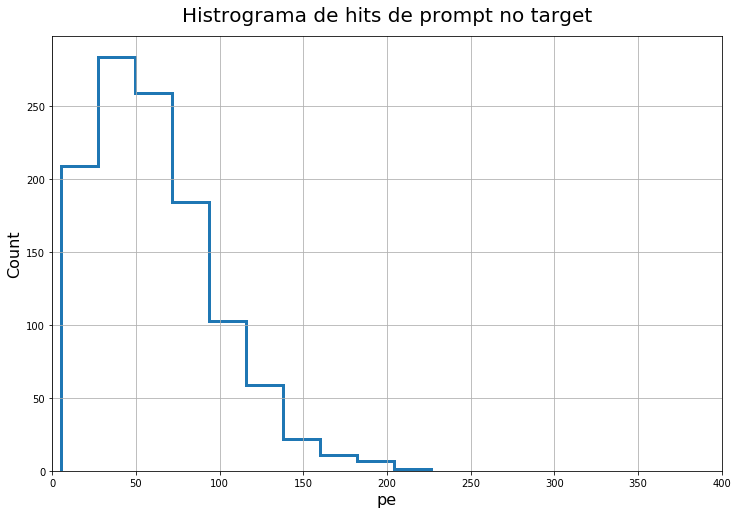

In [6]:
trigger_pmt = 5 #desconsiderar eventos de multiplicidade < 5 PMT; trigger_pmt = considera todos eventos

### Integrar para normalizar
### Para isso, multiplicar altura* Largura e somar tudo (soma de riemman)
### Como normalizar ??
### Estando normalizado, usar a altura para P(A)
### Lembrar posteriormente de propagar erro

list_sum = ['datas/simulation/Positron_MeVHits.txt']
x = fnt_array_vet_hits_pmt(list_sum,trigger_pmt)[0]
xp = fnt_array_vet_hits_pmt(list_sum,trigger_pmt)[0]

prompt_mean=np.mean(x)
prompt_var=np.var(x)
prompt_std=np.std(x)
print(prompt_mean, prompt_var, prompt_std)

fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])
    
plt.rcParams.update({'font.size': 15})

hist_bins = 10
plt.grid()

#weights = np.ones_like(x) / float(len(x))
#weights = np.ones_like(x) / normal
#print(weights)
plt.hist(x, bins=hist_bins, alpha=1, histtype='step', linewidth=3) #, weights=weights) 

plt.ylabel('Count', size=16)
plt.xlabel('pe', size=16)
plt.title('Histrograma de hits de prompt no target', size=20,y=1.02)


p = ax.patches  # There are 10 patches
#print(p[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]
    
#print(fnc_find_y(p[0].get_xy(), 49)) #example of use user function

vx = 0 
normal = 0
for vxy in p[0].get_xy():
    if (vx != vxy[0]):
        normal += vxy[1] #(vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal)
    vx = vxy[0]



In [7]:

'''
plt.rcParams["font.family"] = "Times New Roman";plt.rcParams['font.size'] = '20';plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.weight'] = 'medium';plt.rcParams['axes.grid'] = True;plt.rcParams['grid.linestyle'] = '-';
plt.rcParams['grid.linewidth'] = 0.4;plt.rcParams['grid.color'] = "Black";plt.rcParams['grid.alpha'] = 1;
plt.rcParams['lines.linewidth'] = 5;plt.rcParams['axes.autolimit_mode'] = 'round_numbers';plt.rcParams['axes.axisbelow'] = True
plt.rcParams['xtick.direction'] = 'in';plt.rcParams['ytick.direction'] = 'in';plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1;plt.rcParams['ytick.major.width'] = 2;plt.rcParams['ytick.minor.width'] = 1;
plt.rcParams['xtick.major.size'] = 8;plt.rcParams['xtick.minor.size'] = 5;plt.rcParams['ytick.major.size'] = 8;
plt.rcParams['ytick.minor.size'] = 5; plt.rcParams['svg.fonttype'] = 'none'; #cs = list(mcolors.TABLEAU_COLORS.values())
plt.rcParams['axes.linewidth']=2;plt.rcParams['xtick.top'] = True;plt.rcParams['ytick.right'] = True;
plt.rcParams['axes.spines.top'] = True;plt.rcParams['axes.spines.bottom'] = True;plt.rcParams['axes.spines.left'] = True;
plt.rcParams['axes.spines.right'] = True
'''


'\nplt.rcParams["font.family"] = "Times New Roman";plt.rcParams[\'font.size\'] = \'20\';plt.rcParams[\'font.style\'] = \'normal\'\nplt.rcParams[\'font.weight\'] = \'medium\';plt.rcParams[\'axes.grid\'] = True;plt.rcParams[\'grid.linestyle\'] = \'-\';\nplt.rcParams[\'grid.linewidth\'] = 0.4;plt.rcParams[\'grid.color\'] = "Black";plt.rcParams[\'grid.alpha\'] = 1;\nplt.rcParams[\'lines.linewidth\'] = 5;plt.rcParams[\'axes.autolimit_mode\'] = \'round_numbers\';plt.rcParams[\'axes.axisbelow\'] = True\nplt.rcParams[\'xtick.direction\'] = \'in\';plt.rcParams[\'ytick.direction\'] = \'in\';plt.rcParams[\'xtick.major.width\'] = 2\nplt.rcParams[\'xtick.minor.width\'] = 1;plt.rcParams[\'ytick.major.width\'] = 2;plt.rcParams[\'ytick.minor.width\'] = 1;\nplt.rcParams[\'xtick.major.size\'] = 8;plt.rcParams[\'xtick.minor.size\'] = 5;plt.rcParams[\'ytick.major.size\'] = 8;\nplt.rcParams[\'ytick.minor.size\'] = 5; plt.rcParams[\'svg.fonttype\'] = \'none\'; #cs = list(mcolors.TABLEAU_COLORS.values())\npl

### Normalizacao

[1 1 1 ... 1 1 1] 1139.0
0 5.0 0.0 0.0
5.0 5.0 0.18349429323968391 0.0
5.0 27.1 0.18349429323968391 0.18349429323968391
27.1 27.1 0.2493415276558379 0.18349429323968391
27.1 49.2 0.2493415276558379 0.4328358208955218
49.2 49.2 0.2273924495171199 0.4328358208955218
49.2 71.30000000000001 0.2273924495171199 0.6602282704126416
71.30000000000001 71.30000000000001 0.16154521510096592 0.6602282704126416
71.30000000000001 93.4 0.16154521510096592 0.8217734855136076
93.4 93.4 0.09043020193151907 0.8217734855136076
93.4 115.5 0.09043020193151907 0.9122036874451267
115.5 115.5 0.05179982440737488 0.9122036874451267
115.5 137.60000000000002 0.05179982440737488 0.9640035118525015
137.60000000000002 137.60000000000002 0.01931518876207199 0.9640035118525015
137.60000000000002 159.70000000000002 0.01931518876207199 0.9833187006145735
159.70000000000002 159.70000000000002 0.009657594381035995 0.9833187006145735
159.70000000000002 181.8 0.009657594381035995 0.9929762949956095
181.8 181.8 0.006145741878

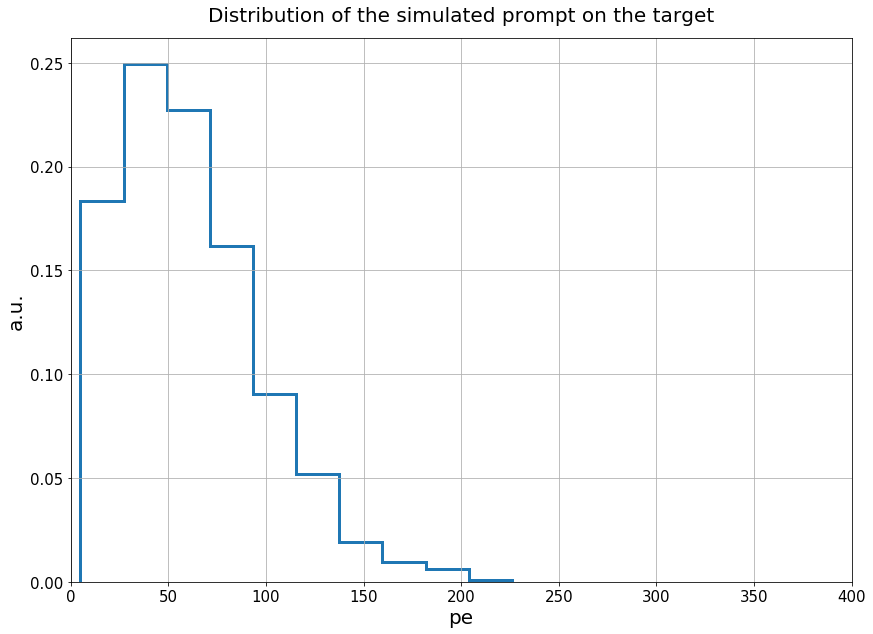

In [8]:

fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])

plt.rcParams.update({'font.size': 15})
#normal=108.4
weights = np.ones_like(x) / normal
weights_p = np.ones_like(xp) / normal
print(np.ones_like(x),normal)

plt.grid()
#print(weights)
plt.hist(x, bins=hist_bins, alpha=1, histtype='step', weights=weights, linewidth=3) 

plt.ylabel('a.u.', size=20)
plt.xlabel('pe', size=20)
#plt.title('Densidade de probabilidade de hits de prompt no target', size=16,y=1.02)
plt.title('Distribution of the simulated prompt on the target', size=20,y=1.02)

p = ax.patches  # There are 10 patches
#print(p[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]

vx = 0 
normal2 = 0
for vxy in p[0].get_xy():
    if (vx != vxy[0]):
        normal2 += vxy[1] #(vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal2)
    vx = vxy[0]
    
#plt.savefig('histogramas/fdp_prompt.pdf', bbox_inches='tight', dpi=300)
plt.savefig('histogramas/fdp_prompt.png', bbox_inches='tight', dpi=300)

plt.show()


## histogram for delay density

87.81511746680286 3577.5317020035664 59.81247112436976
202.0
0 5.0 0.0 0.0
5.0 5.0 228.0 0.0
5.0 35.375 228.0 228.0
35.375 35.375 202.0 228.0
35.375 65.75 202.0 430.0
65.75 65.75 166.0 430.0
65.75 96.125 166.0 596.0
96.125 96.125 122.0 596.0
96.125 126.5 122.0 718.0
126.5 126.5 102.0 718.0
126.5 156.875 102.0 820.0
156.875 156.875 88.0 820.0
156.875 187.25 88.0 908.0
187.25 187.25 49.0 908.0
187.25 217.625 49.0 957.0
217.625 217.625 22.0 957.0
217.625 248.0 22.0 979.0
248.0 248.0 0.0 979.0


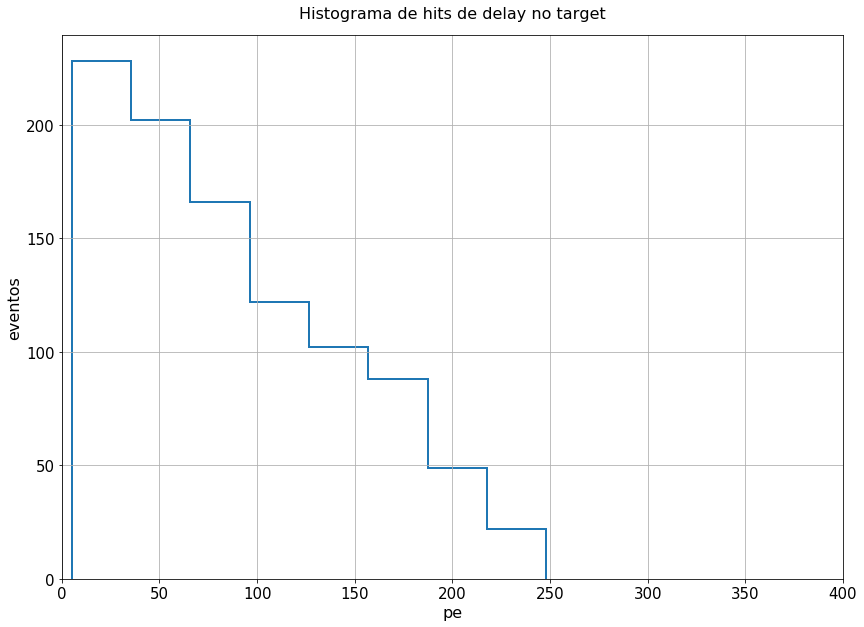

In [9]:
trigger_pmt = 5

### Integrar para normalizar
### Para isso, multiplicar altura* Largura e somar tudo (soma de riemman)
### Como normalizar ??
### Estando normalizado, usar a altura para P(A)
### Lembrar posteriormente de propagar erro

list_sum = ['datas/simulation/NeutronHits.txt']
x = fnt_array_vet_hits_pmt(list_sum,trigger_pmt)[0]  #vetor: 0 = hits, 1 = Multiplicidade PMT, 2 = Energia dos hits   

delay_mean=np.mean(x)
delay_var=np.var(x)
delay_std=np.std(x)
print(delay_mean, delay_var, delay_std)

hist_bins = 8

fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])

plt.rcParams.update({'font.size': 15})

plt.grid()

#weights = np.ones_like(x) / float(len(x))

plt.hist(x, bins=hist_bins, histtype='step', alpha=1, linewidth=2) #, weights=weights); #, rwidth=0.85)

d = ax.patches  # There are 10 patches
#print(d[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]
    
plt.ylabel('eventos', size=16)
plt.xlabel('pe', size=16)
plt.title('Histograma de hits de delay no target', size=16,y=1.02)

print(fnc_find_y(d[0].get_xy(), 49)) #example of use user function

vx = 0 
normal3 = 0
for vxy in d[0].get_xy():
    if (vx != vxy[0]):
        normal3 += vxy[1] #(vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal3)
    vx = vxy[0]



### Normalizacao

0 5.0 0.0 0.0
5.0 5.0 0.23289070480081794 0.0
5.0 35.375 0.23289070480081794 0.23289070480081794
35.375 35.375 0.20633299284984744 0.23289070480081794
35.375 65.75 0.20633299284984744 0.4392236976506654
65.75 65.75 0.1695607763023498 0.4392236976506654
65.75 96.125 0.1695607763023498 0.6087844739530152
96.125 96.125 0.1246169560776305 0.6087844739530152
96.125 126.5 0.1246169560776305 0.7334014300306456
126.5 126.5 0.10418794688457626 0.7334014300306456
126.5 156.875 0.10418794688457626 0.8375893769152218
156.875 156.875 0.0898876404494383 0.8375893769152218
156.875 187.25 0.0898876404494383 0.9274770173646602
187.25 187.25 0.050051072522982624 0.9274770173646602
187.25 217.625 0.050051072522982624 0.9775280898876427
217.625 217.625 0.02247191011235956 0.9775280898876427
217.625 248.0 0.02247191011235956 1.0000000000000022
248.0 248.0 0.0 1.0000000000000022


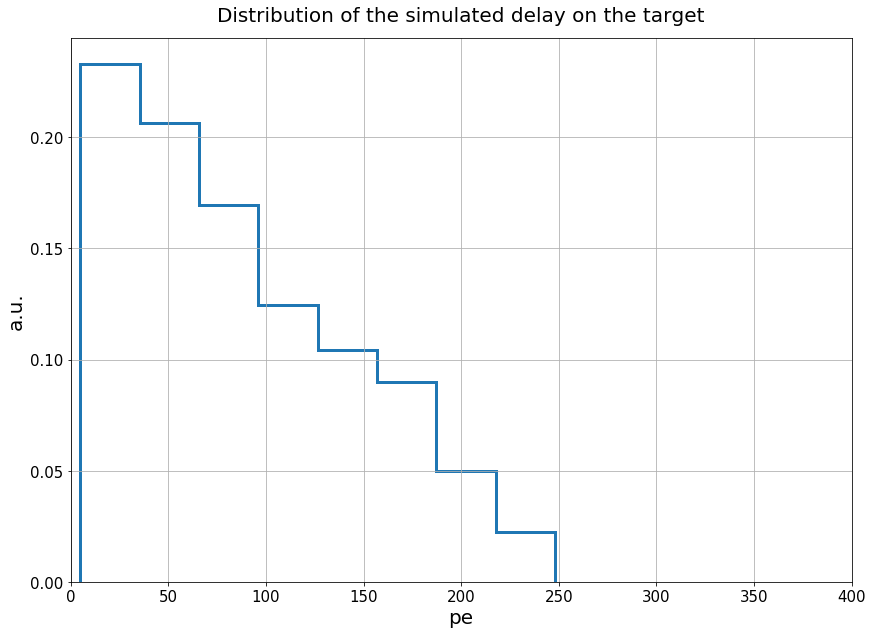

In [10]:
fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])
    
weights = np.ones_like(x) / normal3

plt.grid()

#print(weights)
plt.hist(x, bins=hist_bins, alpha=1, histtype='step', weights=weights, linewidth=3) 

d = ax.patches  # There are 10 patches
#print(d[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]

plt.rcParams.update({'font.size': 15})

vx = 0 
normal4 = 0
for vxy in d[0].get_xy():
    if (vx != vxy[0]):
        normal4 += vxy[1] #(vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal4)
    vx = vxy[0]

plt.ylabel('a.u.', size=20)
plt.xlabel('pe', size=20)
#plt.title('Densidade de probabilidade de hits de delay no target', size=16,y=1.02)

plt.title('Distribution of the simulated delay on the target', size=20,y=1.02)


plt.savefig('histogramas/fdp_delay.png', bbox_inches='tight', dpi=300)

plt.show()

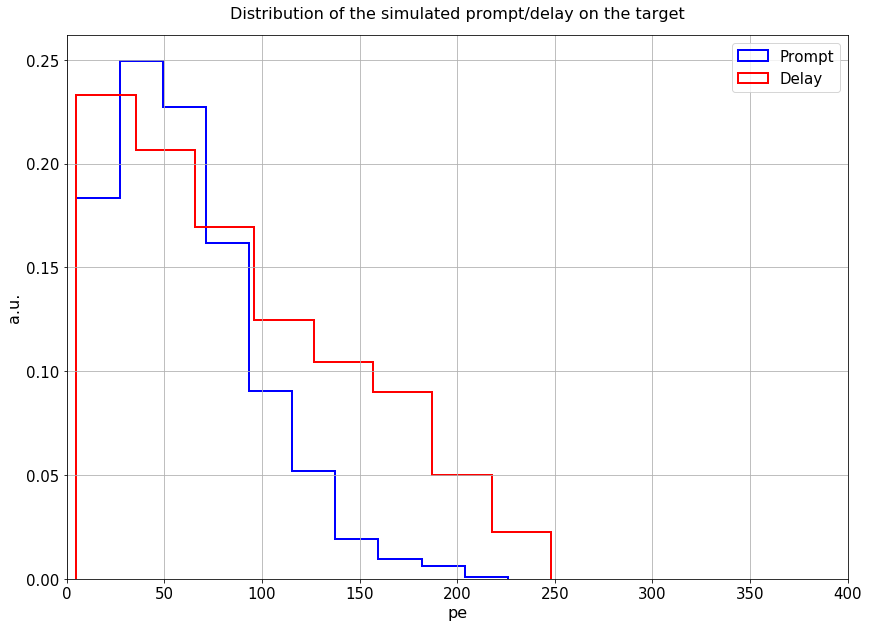

In [11]:
fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])
    
weights = np.ones_like(x) / normal3

plt.grid()

hist_bins_p = 10
hist_bins_d = 8

#print(weights)
plt.hist(xp, bins=hist_bins_p, alpha=1, histtype='step', weights=weights_p, linewidth=2, color='blue', label='Prompt') 
plt.hist(x, bins=hist_bins_d, alpha=1, histtype='step', weights=weights, linewidth=2, color='red', label='Delay') 

plt.legend()

d = ax.patches  # There are 10 patches
#print(d[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]

plt.rcParams.update({'font.size': 15})

plt.ylabel('a.u.', size=16)
plt.xlabel('pe', size=16)
#plt.title('Densidade de probabilidade de hits de delay no target', size=16,y=1.02)

plt.title('Distribution of the simulated prompt/delay on the target', size=16,y=1.02)


plt.savefig('histogramas/fdp_delay_prompt.png', bbox_inches='tight', dpi=300)

plt.show()

## Time delay + background density

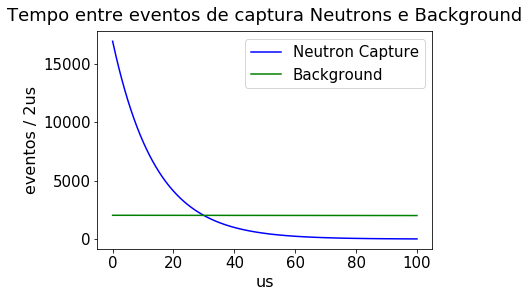

In [12]:

from sklearn import preprocessing

x_data = np.linspace(0, 100, num=100)
#y_dataN = preprocessing.normalize([fnt_fit_signalN(x_data)])
#y_dataB = preprocessing.normalize([fnt_fit_signalB(x_data)])
#y_dataNB = preprocessing.normalize([fnt_fit_signalN(x_data)+fnt_fit_signalB(x_data)])
#y_dataNB = preprocessing.normalize([fnt_fit_signal(x_data)])
#y_dataNB = preprocessing.normalize([y_dataB[0]*y_dataN[0]])
y_dataN = ([fnt_fit_signalN(x_data)])
y_dataB = ([fnt_fit_signalB(x_data)])


time_mean = 13 #(em us)
time_var = 5**2
time_std = 5

#y_dataB2 = []
#for v in y_dataB[0]:
#    y_dataB2.append(1-v)

#print(y_dataB[0],y_dataB2)
#y_dataNB=(y_dataB[0])*y_dataN[0]
#y_dataNB=y_dataB2*y_dataN[0]
#y_dataNB=y_dataB[0]*y_dataN[0]

### Calcular a densidade de tempo por neutron / (neutron+background) e usar como P(B|A)
### Aguardar Luis com histogramas dos tempos para calcular alfas e lambdas


plt.xlabel('us', size=16)
plt.ylabel('eventos / 2us', size=16)
plt.title('Tempo entre eventos de captura Neutrons e Background', y=1.02)
plt.plot(x_data, y_dataN[0], label='Neutron Capture', color='b')
plt.plot(x_data, y_dataB[0], label='Background', color='g')
#plt.plot(x_data, y_dataB2, label='not Background', color='c')
#plt.plot(x_data, y_dataB[0]*y_dataN[0], label='NC*Background', color='r')
#plt.plot(x_data, y_dataNB, label='NC*(not Background)', color='r')

plt.legend()
#print(y_data[0])

#print(fnc_find_y(t[0].get_xy(), 0)) #example of use user function


### merge e normalizacao

1.0000000000000007


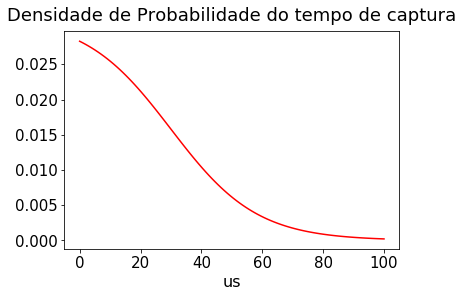

In [13]:
y_dataNB = []
ind = 0
for v in y_dataN[0]:
    #print(ind,v)
    y_dataNB.append(v/(v+y_dataB[0][ind]))
    ind+=1
    
normal5 = 0
for vxy in y_dataNB:
    # print(normal5)
    normal5 += vxy

for iy in range(len(y_dataNB)):
   # print(iy,y_dataNB[iy])
    y_dataNB[iy]=y_dataNB[iy]/normal5
    
print(np.sum(y_dataNB))

plt.xlabel('us', size=16)
plt.title('Densidade de Probabilidade do tempo de captura', y=1.02)

plt.plot(x_data, y_dataNB, color='r')



# Rodar até aqui para funções genéricas de todo código


## Criando um arquivo pós-processed com pares de eventos

In [ ]:

#periodo run OFF: 22-06-2020 - 17-08-2020  (reator OFF)
#periodo run ON : 18-08-2020 - 14-09-2020  (reator ON)

#yyyy=2020; mm=9; dd=2 #Total de registros: 16210102
#yyyy=2020; mm=7; dd=2 #Total de registros: 16289236

#yyyy=2020; mm=8; dd=24 #pair individual
#yyyy=2020; mm=6; dd=29 #pair individual

#yyyy=2020; mm=6; dd=20 #pair individual
#yyyy=2020; mm=8; dd=23 #pair individual
#yyyy=2020; mm=8; dd=1 #pair individual
#yyyy=2020; mm=7; dd=20 #pair individual

#yyyy=2020; mm=8; dd=10 #pair individual
#yyyy=2020; mm=7; dd=10 #pair individual
#yyyy=2020; mm=6; dd=25 #pair individual
#yyyy=2020; mm=8; dd=20 #pair individual
#yyyy=2020; mm=7; dd=15 #pair individual
#yyyy=2020; mm=8; dd=15 #pair individual
#yyyy=2020; mm=7; dd=25 #pair individual
#yyyy=2020; mm=8; dd=5 #pair individual
#yyyy=2020; mm=6; dd=21 #pair individual
#yyyy=2020; mm=6; dd=22 #pair individual
#yyyy=2020; mm=6; dd=23 #pair individual
#yyyy=2020; mm=6; dd=24 #pair individual
#yyyy=2020; mm=6; dd=26 #pair individual
#yyyy=2020; mm=6; dd=27 #pair individual
#yyyy=2020; mm=6; dd=28 #pair individual
#yyyy=2020; mm=7; dd=4 #pair individual
#yyyy=2020; mm=7; dd=5 #pair individual
#yyyy=2020; mm=8; dd=21 #pair individual
#yyyy=2020; mm=8; dd=22 #pair individual
#yyyy=2020; mm=8; dd=16 #pair individual
#yyyy=2020; mm=8; dd=17 #pair individual
#yyyy=2020; mm=8; dd=18 #pair individual
#yyyy=2020; mm=8; dd=19 #pair individual
#yyyy=2020; mm=7; dd=28 #pair individual
#yyyy=2020; mm=7; dd=13 #pair individual
#yyyy=2020; mm=7; dd=18 #pair individual
#yyyy=2020; mm=7; dd=23 #pair individual
#yyyy=2020; mm=7; dd=31 #pair individual
#yyyy=2020; mm=8; dd=3 #pair individual
#yyyy=2021; mm=4; dd=14 #pair individual
#yyyy=2020; mm=7; dd=6 #pair individual
#yyyy=2020; mm=7; dd=7 #pair individual
#yyyy=2020; mm=7; dd=8 #pair individual
#yyyy=2020; mm=7; dd=9 #pair individual
#yyyy=2020; mm=7; dd=11 #pair individual
#yyyy=2020; mm=7; dd=12 #pair individual
#yyyy=2020; mm=7; dd=14 #pair individual
#yyyy=2020; mm=7; dd=16 #pair individual
#yyyy=2020; mm=7; dd=17 #pair individual
#yyyy=2020; mm=7; dd=19 #pair individual
#yyyy=2020; mm=7; dd=21 #pair individual
#yyyy=2020; mm=7; dd=22 #pair individual
#yyyy=2020; mm=7; dd=24 #pair individual
#yyyy=2020; mm=9; dd=1 #pair individual
#yyyy=2020; mm=8; dd=31 #pair individual
#yyyy=2020; mm=8; dd=30 #pair individual
#yyyy=2020; mm=8; dd=29 #pair individual
#yyyy=2020; mm=9; dd=3 #pair individual
#yyyy=2020; mm=9; dd=4 #pair individual
#yyyy=2020; mm=9; dd=5 #pair individual
#yyyy=2020; mm=9; dd=6 #pair individual
#yyyy=2020; mm=9; dd=7 #pair individual
#yyyy=2020; mm=9; dd=8 #pair individual
#yyyy=2020; mm=9; dd=9 #pair individual
#yyyy=2020; mm=9; dd=10 #pair individual
#yyyy=2020; mm=9; dd=11 #pair individual
#yyyy=2020; mm=9; dd=12 #pair individual
#yyyy=2020; mm=9; dd=13 #pair individual
#yyyy=2020; mm=9; dd=14 #pair individual -- dados incompletos
#yyyy=2020; mm=9; dd=15 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=16 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=17 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=18 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=19 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=20 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=21 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=22 #pair individual -- dados vazios
#yyyy=2020; mm=9; dd=23 #pair individual  -- dados incompletos

#yyyy=2020; mm=9; dd=28 #pair individual
#yyyy=2020; mm=9; dd=24 #pair individual
#yyyy=2020; mm=9; dd=25 #pair individual
#yyyy=2020; mm=9; dd=26 #pair individual
#yyyy=2020; mm=9; dd=27 #pair individual
#yyyy=2020; mm=6; dd=14 #pair individual
#yyyy=2020; mm=6; dd=13 #pair individual
#yyyy=2020; mm=6; dd=12 #pair individual
#yyyy=2020; mm=6; dd=11 #pair individual
#yyyy=2020; mm=6; dd=10 #pair individual
yyyy=2020; mm=6; dd=9 #pair individual  -- dados incompletos
yyyy=2020; mm=6; dd=8 #pair individual  -- dados vazios
yyyy=2020; mm=6; dd=7 #pair individual  -- dados vazios
yyyy=2020; mm=6; dd=1 #pair individual  -- dados vazios
yyyy=2020; mm=5; dd=25 #pair individual -- dados vazios
yyyy=2020; mm=5; dd=20 #pair individual -- dados vazios
yyyy=2020; mm=5; dd=10 #pair individual -- dados vazios
yyyy=2020; mm=5; dd=1 #pair individual  -- dados vazios
#yyyy=2020; mm=10; dd=1 #pair individual
#yyyy=2020; mm=10; dd=2 #pair individual
#yyyy=2020; mm=10; dd=3 #pair individual
#yyyy=2020; mm=10; dd=4 #pair individual
#yyyy=2020; mm=10; dd=5 #pair individual
#yyyy=2020; mm=10; dd=6 #pair individual
#yyyy=2020; mm=10; dd=7 #pair individual
#yyyy=2020; mm=10; dd=8 #pair individual
#yyyy=2020; mm=10; dd=9 #pair individual
#yyyy=2020; mm=10; dd=10 #pair individual
#yyyy=2020; mm=10; dd=11 #pair individual
#yyyy=2020; mm=10; dd=12 #pair individual
#yyyy=2020; mm=10; dd=13 #pair individual
#yyyy=2020; mm=10; dd=14 #pair individual
#yyyy=2020; mm=10; dd=15 #pair individual
#yyyy=2020; mm=10; dd=16 #pair individual
#yyyy=2020; mm=10; dd=17 #pair individual


In [ ]:
%run def_functions.ipynb

In [23]:
print(len(find_interval_date('2022-11-01','2022-11-01')))
#print(len(find_interval_date('2020-10-21','2020-10-30')))
#print(find_interval_date('2019-11-01','2020-06-08')) ## Não há dados antes de 08/06/2020


2


In [97]:
#yyyy=2020; mm=10; dd=18 #pair individual
#yyyy=2020; mm=10; dd=19 #pair individual
#yyyy=2020; mm=10; dd=20 #pair individual
#yyyy=2020; mm=10; dd=21 #pair individual
#yyyy=2020; mm=10; dd=22 #pair individual
#yyyy=2020; mm=10; dd=23 #pair individual
#yyyy=2020; mm=10; dd=24 #pair individual
#yyyy=2020; mm=10; dd=25 #pair individual
#yyyy=2020; mm=10; dd=26 #pair individual
#yyyy=2020; mm=10; dd=27 #pair individual
#yyyy=2020; mm=10; dd=28 #pair individual
#yyyy=2020; mm=10; dd=29 #pair individual
#yyyy=2020; mm=10; dd=30 #pair individual
#yyyy=2020; mm=11; dd=1 #pair individual
#yyyy=2020; mm=11; dd=2 #pair individual
yyyy=2020; mm=11; dd=3 #pair individual


sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
os.mkdir(sDir)

lista = find_interval_date(sDate,sDate)
#print(list)

indf=1

pair=[[] for x in range(80)]
event_pair = 0
subtotal_regs = 0
total_regs = 0
pairset = 1

print(datetime.datetime.now())


for file in lista:
    df = pd.read_parquet(file)
    i_epoc = int(extract_epoch(file))/1000
    print(indf,file,datetime.datetime.fromtimestamp(i_epoc).day,
          datetime.datetime.fromtimestamp(i_epoc).month,datetime.datetime.fromtimestamp(i_epoc).year)
    #print(file[28:60]+'_pair.parq')
    #break
    
    vd = str(datetime.datetime.fromtimestamp(i_epoc).day)+'-'+str(datetime.datetime.fromtimestamp(i_epoc).month)
    
    ev2 = [0 for x in range(80)] #[0,0,0,0,0]
    
    dfl = df.values.tolist()
    subtotal_regs += len(dfl)
    total_regs += len(dfl)
    
    for index1 in range(len(dfl)):
        if (index1!=0):
            
            regfix = dfl[index1].copy()
            ev1 = ev2.copy()
            
            #ev2[0] = regfix['Total_p_charge']/77.96 #em  pe
            ev2[0] = regfix[7]/77.96 #em  pe
            #ev2[1] = regfix['Timestamp1']*16/1E3 #em us
            ev2[1] = regfix[1]*16/1E3 #em us

            ev2[2] = fnc_find_y(p[0].get_xy(),ev1[0]) #probabilidade de ocorrência nesta energia (pelo PDF prompt)
            ev2[3] = fnc_find_y(d[0].get_xy(),ev2[0]) #probabilidade de ocorrência nesta energia (pelo PDF delay)
            ev2[4] = 0
            #totalTime_ON += ev2[1]
            if (int(ev2[1])<100):
                ev2[4] = y_dataNB[int(ev2[1])] #probabilidade temporal (pelo densidade de tempo)
            
            #ev2[5] = regfix['PMT01']; ev2[6] = regfix['PMT02']; ev2[7] = regfix['PMT03']; ev2[8] = regfix['PMT04']
            #ev2[9] = regfix['PMT05']; ev2[10] = regfix['PMT06']; ev2[11] = regfix['PMT07']; ev2[12] = regfix['PMT08']
            #ev2[13] = regfix['PMT09']; ev2[14] = regfix['PMT10']; ev2[15] = regfix['PMT11']; ev2[16] = regfix['PMT12']
            #ev2[17] = regfix['PMT13']; ev2[18] = regfix['PMT14']; ev2[19] = regfix['PMT15']; ev2[20] = regfix['PMT16']
            #ev2[21] = regfix['PMT17']; ev2[22] = regfix['PMT18']; ev2[23] = regfix['PMT19']; ev2[24] = regfix['PMT20']
            #ev2[25] = regfix['PMT21']; ev2[26] = regfix['PMT22']; ev2[27] = regfix['PMT23']; ev2[28] = regfix['PMT24']
            #ev2[29] = regfix['PMT25']; ev2[30] = regfix['PMT26']; ev2[31] = regfix['PMT27']; ev2[32] = regfix['PMT28']
            #ev2[33] = regfix['PMT29']; ev2[34] = regfix['PMT30']; ev2[35] = regfix['PMT31']; ev2[36] = regfix['PMT32']
            ev2[5] = regfix[8]; ev2[6] = regfix[9]; ev2[7] = regfix[10]; ev2[8] = regfix[11]
            ev2[9] = regfix[12]; ev2[10] = regfix[13]; ev2[11] = regfix[14]; ev2[12] = regfix[15]
            ev2[13] = regfix[16]; ev2[14] = regfix[17]; ev2[15] = regfix[18]; ev2[16] = regfix[19]
            ev2[17] = regfix[20]; ev2[18] = regfix[21]; ev2[19] = regfix[22]; ev2[20] = regfix[23]
            ev2[21] = regfix[24]; ev2[22] = regfix[25]; ev2[23] = regfix[26]; ev2[24] = regfix[27]
            ev2[25] = regfix[28]; ev2[26] = regfix[29]; ev2[27] = regfix[30]; ev2[28] = regfix[31]
            ev2[29] = regfix[32]; ev2[30] = regfix[33]; ev2[31] = regfix[34]; ev2[32] = regfix[35]
            ev2[33] = regfix[36]; ev2[34] = regfix[37]; ev2[35] = regfix[38]; ev2[36] = regfix[39]

            #ev2[37] = regfix['Saturated']; ev2[38] = regfix['Event_Number']
            ev2[37] = regfix[40]; ev2[38] = regfix[0]
            
            #print('2',datetime.datetime.now())
            qtde_PMTs = 0
            for ill in range(32):
                #campoPMT = 'PMT{0:0>2d}'.format(ill+1)
                #if (regfix[campoPMT]>77):
                if (ev2[5+ill]>77):
                    qtde_PMTs += 1
            ev2[39] = qtde_PMTs
            
            if (ev1[0]==0):
                continue
                    
            #print('3',datetime.datetime.now())
            i=int(ev1[0]) #prompt int energy
            j=int(ev2[0]) #delay int energy
            t=int(ev2[1]) #time interval - 13/09/2021
   
            ### chi sqr
            chi_sq_calc = ((i - prompt_mean)**2)/prompt_mean + ((j - delay_mean)**2)/delay_mean + ((t - time_mean)**2)/time_mean
                       
            event_pair+=1

            pair[0].append(event_pair)

            pair[1].append(ev1[5]); pair[2].append(ev1[6]);  pair[3].append(ev1[7]);  pair[4].append(ev1[8])
            pair[5].append(ev1[9]); pair[6].append(ev1[10]); pair[7].append(ev1[11]); pair[8].append(ev1[12])
            pair[9].append(ev1[13]);pair[10].append(ev1[14]);pair[11].append(ev1[15]);pair[12].append(ev1[16])
            pair[13].append(ev1[17]);pair[14].append(ev1[18]);pair[15].append(ev1[19]);pair[16].append(ev1[20])
            pair[17].append(ev1[21]);pair[18].append(ev1[22]);pair[19].append(ev1[23]);pair[20].append(ev1[24])
            pair[21].append(ev1[25]);pair[22].append(ev1[26]);pair[23].append(ev1[27]);pair[24].append(ev1[28])
            pair[25].append(ev1[29]);pair[26].append(ev1[30]);pair[27].append(ev1[31]);pair[28].append(ev1[32])
            pair[29].append(ev1[33]);pair[30].append(ev1[34]);pair[31].append(ev1[35]);pair[32].append(ev1[36])
            
            pair[33].append(ev1[0] * 77.96)  # em DUQ
            pair[34].append(ev1[0])  #em pe
            pair[35].append(ev1[2])  #PDF do prompt
            pair[36].append(ev1[39])  #multiplicidade > 77DUQ
            pair[37].append(ev1[37])  #satured
            
            pair[38].append(ev2[5]); pair[39].append(ev2[6]);  pair[40].append(ev2[7]);  pair[41].append(ev2[8])
            pair[42].append(ev2[9]); pair[43].append(ev2[10]); pair[44].append(ev2[11]); pair[45].append(ev2[12])
            pair[46].append(ev2[13]);pair[47].append(ev2[14]);pair[48].append(ev2[15]);pair[49].append(ev2[16])
            pair[50].append(ev2[17]);pair[51].append(ev2[18]);pair[52].append(ev2[19]);pair[53].append(ev2[20])
            pair[54].append(ev2[21]);pair[55].append(ev2[22]);pair[56].append(ev2[23]);pair[57].append(ev2[24])
            pair[58].append(ev2[25]);pair[59].append(ev2[26]);pair[60].append(ev2[27]);pair[61].append(ev2[28])
            pair[62].append(ev2[29]);pair[63].append(ev2[30]);pair[64].append(ev2[31]);pair[65].append(ev2[32])
            pair[66].append(ev2[33]);pair[67].append(ev2[34]);pair[68].append(ev2[35]);pair[69].append(ev2[36])
            
            pair[70].append(ev2[0] * 77.96)  # em DUQ
            pair[71].append(ev2[0])  #em pe
            pair[72].append(ev2[3])  #PDF do delay
            pair[73].append(ev2[39])  #multiplicidade > 77DUQ
            pair[74].append(ev2[37])  #satured
            
            pair[75].append(ev2[1])  #tempo
            pair[76].append(chi_sq_calc)  #chi^2
            pair[77].append(ev2[4])  #PDF do tempo

            pair[78].append(file)  #arquivo AngraRun
            #pair[78].append('')  #arquivo AngraRun
            pair[79].append(ev1[38])  #EventRun
            
            #print('4',datetime.datetime.now())
            #if (event_pair>10):
                #break

    if ((indf % 1)==0)or(indf>=len(lista)):  # mod 1 (antes era mod 6), pois quero gerar individuais agora - 06/10/2021
        # dictionary of lists
        dict = {'Pair': pair[0],
                'p_PMT01': pair[1],  'p_PMT02': pair[2],  'p_PMT03': pair[3],  'p_PMT04': pair[4], 
                'p_PMT05': pair[5],  'p_PMT06': pair[6],  'p_PMT07': pair[7],  'p_PMT08': pair[8], 
                'p_PMT09': pair[9],  'p_PMT10': pair[10], 'p_PMT11': pair[11], 'p_PMT12': pair[12], 
                'p_PMT13': pair[13], 'p_PMT14': pair[14], 'p_PMT15': pair[15], 'p_PMT16': pair[16], 
                'p_PMT17': pair[17], 'p_PMT18': pair[18], 'p_PMT19': pair[19], 'p_PMT20': pair[20], 
                'p_PMT21': pair[21], 'p_PMT22': pair[22], 'p_PMT23': pair[23], 'p_PMT24': pair[24], 
                'p_PMT25': pair[25], 'p_PMT26': pair[26], 'p_PMT27': pair[27], 'p_PMT28': pair[28], 
                'p_PMT29': pair[29], 'p_PMT30': pair[30], 'p_PMT31': pair[31], 'p_PMT32': pair[32], 
                'p_Total_charge': pair[33],'p_Total_pe': pair[34],'p_PDF': pair[35], 'p_mPMTs': pair[36], 'p_satured': pair[37],
                'd_PMT01': pair[38], 'd_PMT02': pair[39], 'd_PMT03': pair[40], 'd_PMT04': pair[41], 
                'd_PMT05': pair[42], 'd_PMT06': pair[43], 'd_PMT07': pair[44], 'd_PMT08': pair[45], 
                'd_PMT09': pair[46], 'd_PMT10': pair[47], 'd_PMT11': pair[48], 'd_PMT12': pair[49], 
                'd_PMT13': pair[50], 'd_PMT14': pair[51], 'd_PMT15': pair[52], 'd_PMT16': pair[53], 
                'd_PMT17': pair[54], 'd_PMT18': pair[55], 'd_PMT19': pair[56], 'd_PMT20': pair[57], 
                'd_PMT21': pair[58], 'd_PMT22': pair[59], 'd_PMT23': pair[60], 'd_PMT24': pair[61], 
                'd_PMT25': pair[62], 'd_PMT26': pair[63], 'd_PMT27': pair[64], 'd_PMT28': pair[65], 
                'd_PMT29': pair[66], 'd_PMT30': pair[67], 'd_PMT31': pair[68], 'd_PMT32': pair[69], 
                'd_Total_charge': pair[70],'d_Total_pe': pair[71],'d_PDF': pair[72], 'd_mPMTs': pair[73], 'd_satured': pair[74],
                'd_timeInverval': pair[75],'chi_square': pair[76],'t_PDF': pair[77],
                'file_Run': pair[78], 'Event_Number': pair[79]
               }
 
        # creating a dataframe from dictionary
        dfw = pd.DataFrame(dict)
        #dfw.to_parquet('data/AngraRun_Pair_{0:d}-{1:0>2d}-{2:0>2d}_{3:d}.parq'.format(yyyy,mm,dd,pairset))
        dfw.to_parquet(sDir+'/'+file[28:60]+'_pair.parq', compression='gzip')

        print('Subotal de registros: '+str(subtotal_regs))
        pair=[[] for x in range(80)]
        event_pair = 0
        subtotal_regs = 0
        pairset += 1
        del dict
        
    
    indf+=1
    
            
    
print('Total de registros: '+str(total_regs))

print(datetime.datetime.now())
print('Fim')

2024-02-16 15:37:06.327520
1 /data/processed/2020_phase2/AngraRun_1604439796170_processed_v4.parq 3 11 2020
Subotal de registros: 337288
2 /data/processed/2020_phase2/AngraRun_1604443430449_processed_v4.parq 3 11 2020
Subotal de registros: 335881
3 /data/processed/2020_phase2/AngraRun_1604378076367_processed_v4.parq 3 11 2020
Subotal de registros: 333997
4 /data/processed/2020_phase2/AngraRun_1604436163383_processed_v4.parq 3 11 2020
Subotal de registros: 338400
5 /data/processed/2020_phase2/AngraRun_1604399851368_processed_v4.parq 3 11 2020
Subotal de registros: 333249
6 /data/processed/2020_phase2/AngraRun_1604396220240_processed_v4.parq 3 11 2020
Subotal de registros: 333473
7 /data/processed/2020_phase2/AngraRun_1604437979021_processed_v4.parq 3 11 2020
Subotal de registros: 339332
8 /data/processed/2020_phase2/AngraRun_1604383522205_processed_v4.parq 3 11 2020
Subotal de registros: 333123
9 /data/processed/2020_phase2/AngraRun_1604379892177_processed_v4.parq 3 11 2020
Subotal de r

In [315]:
fileparq = 'data/AngraRun_Pair_2020-09-02.parq'

lista = glob.glob(fileparq)

for file in lista[:10]:
    a = file
    df = pd.read_parquet(a)
    #print(df.columns)
    print(df.head(100)[])
    print(df.head(2)['d_PDF'],df.head(2)['d_Total_charge'],df.head(2)['d_mPMTs'],df.head(2)['d_timeInverval']/16*1E3,
         df.head(2)['t_PDF'],df.head(2)['p_PDF'],df.head(2)['p_Total_charge'],df.head(2)['p_mPMTs'],
         df.head(2)['file_Run'],df.head(2)['Event_Number'])
    s=df['file_Run'][1]
    print(s)
    df2 = pd.read_parquet(s)
    df3=df2.head(10)[df2['Event_Number']==df['Event_Number'][1]]
    print(df2.head(10)[df2['Event_Number']==df['Event_Number'][1]])
    print(df3['PMT01'],df3['PMT02'],df3['PMT03'],df3['PMT04'],
          df3['PMT05'],df3['PMT06'],df3['PMT07'],df3['PMT08'],
          df3['PMT09'],df3['PMT10'],df3['PMT11'],df3['PMT12'],
          df3['PMT13'],df3['PMT14'],df3['PMT15'],df3['PMT16'],
          df3['PMT17'],df3['PMT18'],df3['PMT19'],df3['PMT20'],
          df3['PMT21'],df3['PMT22'],df3['PMT23'],df3['PMT24'],
          df3['PMT25'],df3['PMT26'],df3['PMT27'],df3['PMT28'],
          df3['PMT29'],df3['PMT30'],df3['PMT31'],df3['PMT32'],
          df3['Total_p_charge'],df3['Timestamp1']
         )


    Event_Number  Pair    chi_square     d_PDF  d_PMT01  d_PMT02  d_PMT03  \
0              3     1  1.845470e+06  0.007327       -2      138      305   
1              4     2  2.520867e+05  0.007327       -6      113       50   
2              5     3  1.030361e+04  0.005990      143      395      352   
3              6     4  3.299782e+05  0.007327       69      155      195   
4              7     5  1.165283e+06  0.007327      -23        0        3   
5              8     6  2.742807e+05  0.007327       90       60       85   
6              9     7  1.001982e+06  0.007327       -5       71      230   
7             10     8  3.047962e+03  0.005990      112       54      121   
8             11     9  1.792474e+04  0.007327      -36      -22       90   
9             12    10  1.571510e+05  0.007327       -3        2        0   
10            13    11  2.842666e+05  0.002005      640      698      263   
11             3    12  8.490015e+05  0.007327       15      285      320   

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2020-01-01 ,  0
2020-01-01 ,  0
2020-01-01 ,  0
2020-01-01 ,  0
2020-01-01 ,  0
2020-06-30 ,  48
2020-07-31 ,  48
2020-08-31 ,  48
2020-09-30 ,  47
2020-10-31 ,  47
2020-11-30 ,  47
2020-12-31 ,  48
2021-01-31 ,  26
2021-02-28 ,  13
2021-03-31 ,  22
2021-04-30 ,  0
2021-05-31 ,  13
2021-06-30 ,  10
2021-07-31 ,  13
2021-08-31 ,  0
2021-09-30 ,  14
2021-10-31 ,  13
2021-11-30 ,  11
2021-12-31 ,  10
2022-01-31 ,  10
2022-02-28 ,  7
2022-03-31 ,  13
2022-04-30 ,  12
2022-05-31 ,  2
2022-06-30 ,  1
2022-07-31 ,  2
2022-08-31 ,  1
2022-09-30 ,  0
2022-10-31 ,  3
2022-11-30 ,  0
2022-12-31 ,  2


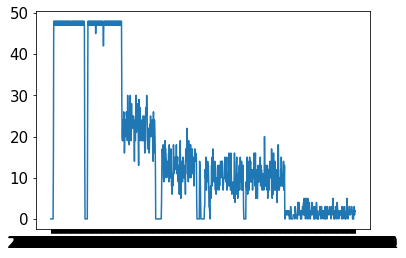

In [15]:
days_meses = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

list_date = []
list_lab_date = []
list_count = []
sDate = '2020-01-01'

for yyyy in range(2020, 2023):
    for mm in range(1,13):
        for dd in range(1, days_meses[mm-1]+1):
            if (yyyy==2020)and(mm<6):
                continue
            sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
            #print(sDate, ', ', len(find_interval_date(sDate,sDate)))
            list_date.append(sDate)
            if (sDate in ['2020-06-24','2020-07-22','2020-08-24','2020-09-14',
                          '2020-09-23','2020-10-01','2020-10-31','2020-11-10',
                          '2021-05-01','2021-05-10','2021-05-31','2021-07-01',
                          '2021-07-31','2021-09-01','2021-10-01','2021-10-31',
                          '2021-12-31','2022-05-31','2022-06-30','2022-07-31',
                          '2022-08-31','2022-12-31']):
                list_lab_date.append(sDate)
            else:
                list_lab_date.append('')
            list_count.append(len(find_interval_date(sDate,sDate)))
        print(sDate, ', ', len(find_interval_date(sDate,sDate)))
            
plt.plot(list_date, list_count)
plt.show()

In [18]:
list_lab_date[0]='2020-06-01'
list_lab_date[len(list_lab_date)-1]='2022-12-31'
print(list_lab_date)

['2020-06-01', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '2020-06-24', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '2020-07-22', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '2020-08-24', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '2020-09-14', '', '', '', '', '', '', '', '', '2020-09-23', '', '', '', '', '', '', '', '2020-10-01', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '2020-10-31', '', '', '', '', '', '', '', '', '', '2020-11-10', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '

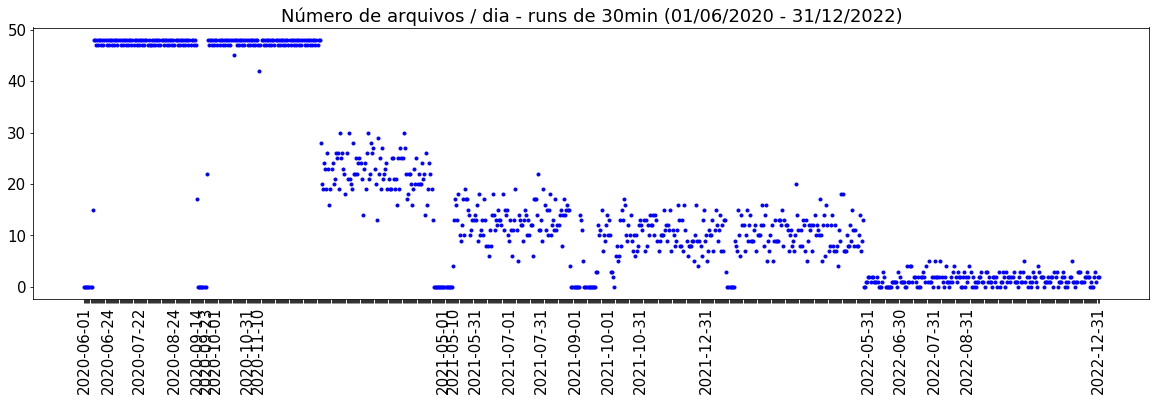

In [17]:

fig=plt.figure(figsize=(20,5))


plt.plot(list_date, list_count, 'b.')
plt.xticks(list_date, list_lab_date, rotation=90)
plt.title('Número de arquivos / dia - runs de 30min (01/06/2020 - 31/12/2022)')
#plt.savefig('histogramas/Files_Run_Number.png')
plt.show()

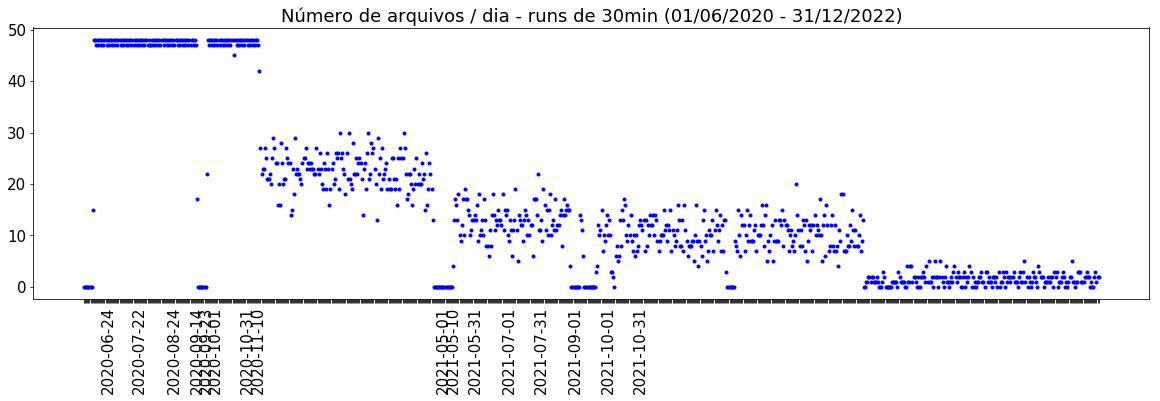

In [60]:

fig=plt.figure(figsize=(20,5))


plt.plot(list_date, list_count, 'b.')
plt.xticks(list_date, list_lab_date, rotation=90)
plt.title('Número de arquivos / dia - runs de 30min (01/06/2020 - 31/12/2022)')
#plt.savefig('histogramas/Files_Run_Number.png')
plt.show()

## Função para geração dos pares

In [19]:
def fnc_create_pairs(yyyy, mm, dd):
    
    #yyyy=2020; mm=10; dd=30 #pair individual


    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)
    os.mkdir(sDir)

    lista = find_interval_date(sDate,sDate)
    #print(list)

    indf=1

    pair=[[] for x in range(80)]
    event_pair = 0
    subtotal_regs = 0
    total_regs = 0
    pairset = 1

    print(datetime.datetime.now())


    for file in lista:
        df = pd.read_parquet(file)
        i_epoc = int(extract_epoch(file))/1000
        print(indf,file,datetime.datetime.fromtimestamp(i_epoc).day,
              datetime.datetime.fromtimestamp(i_epoc).month,datetime.datetime.fromtimestamp(i_epoc).year)
        #print(file[28:60]+'_pair.parq')
        #break
    
        vd = str(datetime.datetime.fromtimestamp(i_epoc).day)+'-'+str(datetime.datetime.fromtimestamp(i_epoc).month)
    
        ev2 = [0 for x in range(80)] #[0,0,0,0,0]
    
        dfl = df.values.tolist()
        subtotal_regs += len(dfl)
        total_regs += len(dfl)
    
        for index1 in range(len(dfl)):
            if (index1!=0):
            
                regfix = dfl[index1].copy()
                ev1 = ev2.copy()
            
                #ev2[0] = regfix['Total_p_charge']/77.96 #em  pe
                ev2[0] = regfix[7]/77.96 #em  pe
                #ev2[1] = regfix['Timestamp1']*16/1E3 #em us
                ev2[1] = regfix[1]*16/1E3 #em us

                ev2[2] = fnc_find_y(p[0].get_xy(),ev1[0]) #probabilidade de ocorrência nesta energia (pelo PDF prompt)
                ev2[3] = fnc_find_y(d[0].get_xy(),ev2[0]) #probabilidade de ocorrência nesta energia (pelo PDF delay)
                ev2[4] = 0
                #totalTime_ON += ev2[1]
                if (int(ev2[1])<100):
                    ev2[4] = y_dataNB[int(ev2[1])] #probabilidade temporal (pelo densidade de tempo)
            
                #ev2[5] = regfix['PMT01']; ev2[6] = regfix['PMT02']; ev2[7] = regfix['PMT03']; ev2[8] = regfix['PMT04']
                #ev2[9] = regfix['PMT05']; ev2[10] = regfix['PMT06']; ev2[11] = regfix['PMT07']; ev2[12] = regfix['PMT08']
                #ev2[13] = regfix['PMT09']; ev2[14] = regfix['PMT10']; ev2[15] = regfix['PMT11']; ev2[16] = regfix['PMT12']
                #ev2[17] = regfix['PMT13']; ev2[18] = regfix['PMT14']; ev2[19] = regfix['PMT15']; ev2[20] = regfix['PMT16']
                #ev2[21] = regfix['PMT17']; ev2[22] = regfix['PMT18']; ev2[23] = regfix['PMT19']; ev2[24] = regfix['PMT20']
                #ev2[25] = regfix['PMT21']; ev2[26] = regfix['PMT22']; ev2[27] = regfix['PMT23']; ev2[28] = regfix['PMT24']
                #ev2[29] = regfix['PMT25']; ev2[30] = regfix['PMT26']; ev2[31] = regfix['PMT27']; ev2[32] = regfix['PMT28']
                #ev2[33] = regfix['PMT29']; ev2[34] = regfix['PMT30']; ev2[35] = regfix['PMT31']; ev2[36] = regfix['PMT32']
                ev2[5] = regfix[8]; ev2[6] = regfix[9]; ev2[7] = regfix[10]; ev2[8] = regfix[11]
                ev2[9] = regfix[12]; ev2[10] = regfix[13]; ev2[11] = regfix[14]; ev2[12] = regfix[15]
                ev2[13] = regfix[16]; ev2[14] = regfix[17]; ev2[15] = regfix[18]; ev2[16] = regfix[19]
                ev2[17] = regfix[20]; ev2[18] = regfix[21]; ev2[19] = regfix[22]; ev2[20] = regfix[23]
                ev2[21] = regfix[24]; ev2[22] = regfix[25]; ev2[23] = regfix[26]; ev2[24] = regfix[27]
                ev2[25] = regfix[28]; ev2[26] = regfix[29]; ev2[27] = regfix[30]; ev2[28] = regfix[31]
                ev2[29] = regfix[32]; ev2[30] = regfix[33]; ev2[31] = regfix[34]; ev2[32] = regfix[35]
                ev2[33] = regfix[36]; ev2[34] = regfix[37]; ev2[35] = regfix[38]; ev2[36] = regfix[39]

                #ev2[37] = regfix['Saturated']; ev2[38] = regfix['Event_Number']
                ev2[37] = regfix[40]; ev2[38] = regfix[0]
            
                #print('2',datetime.datetime.now())
                qtde_PMTs = 0
                for ill in range(32):
                    #campoPMT = 'PMT{0:0>2d}'.format(ill+1)
                    #if (regfix[campoPMT]>77):
                    if (ev2[5+ill]>77):
                        qtde_PMTs += 1
                ev2[39] = qtde_PMTs
            
                if (ev1[0]==0):
                    continue
                    
                #print('3',datetime.datetime.now())
                i=int(ev1[0]) #prompt int energy
                j=int(ev2[0]) #delay int energy
                t=int(ev2[1]) #time interval - 13/09/2021
   
                ### chi sqr
                chi_sq_calc = ((i - prompt_mean)**2)/prompt_mean + ((j - delay_mean)**2)/delay_mean + ((t - time_mean)**2)/time_mean
                       
                event_pair+=1

                pair[0].append(event_pair)

                pair[1].append(ev1[5]); pair[2].append(ev1[6]);  pair[3].append(ev1[7]);  pair[4].append(ev1[8])
                pair[5].append(ev1[9]); pair[6].append(ev1[10]); pair[7].append(ev1[11]); pair[8].append(ev1[12])
                pair[9].append(ev1[13]);pair[10].append(ev1[14]);pair[11].append(ev1[15]);pair[12].append(ev1[16])
                pair[13].append(ev1[17]);pair[14].append(ev1[18]);pair[15].append(ev1[19]);pair[16].append(ev1[20])
                pair[17].append(ev1[21]);pair[18].append(ev1[22]);pair[19].append(ev1[23]);pair[20].append(ev1[24])
                pair[21].append(ev1[25]);pair[22].append(ev1[26]);pair[23].append(ev1[27]);pair[24].append(ev1[28])
                pair[25].append(ev1[29]);pair[26].append(ev1[30]);pair[27].append(ev1[31]);pair[28].append(ev1[32])
                pair[29].append(ev1[33]);pair[30].append(ev1[34]);pair[31].append(ev1[35]);pair[32].append(ev1[36])
            
                pair[33].append(ev1[0] * 77.96)  # em DUQ
                pair[34].append(ev1[0])  #em pe
                pair[35].append(ev1[2])  #PDF do prompt
                pair[36].append(ev1[39])  #multiplicidade > 77DUQ
                pair[37].append(ev1[37])  #satured
            
                pair[38].append(ev2[5]); pair[39].append(ev2[6]);  pair[40].append(ev2[7]);  pair[41].append(ev2[8])
                pair[42].append(ev2[9]); pair[43].append(ev2[10]); pair[44].append(ev2[11]); pair[45].append(ev2[12])
                pair[46].append(ev2[13]);pair[47].append(ev2[14]);pair[48].append(ev2[15]);pair[49].append(ev2[16])
                pair[50].append(ev2[17]);pair[51].append(ev2[18]);pair[52].append(ev2[19]);pair[53].append(ev2[20])
                pair[54].append(ev2[21]);pair[55].append(ev2[22]);pair[56].append(ev2[23]);pair[57].append(ev2[24])
                pair[58].append(ev2[25]);pair[59].append(ev2[26]);pair[60].append(ev2[27]);pair[61].append(ev2[28])
                pair[62].append(ev2[29]);pair[63].append(ev2[30]);pair[64].append(ev2[31]);pair[65].append(ev2[32])
                pair[66].append(ev2[33]);pair[67].append(ev2[34]);pair[68].append(ev2[35]);pair[69].append(ev2[36])
            
                pair[70].append(ev2[0] * 77.96)  # em DUQ
                pair[71].append(ev2[0])  #em pe
                pair[72].append(ev2[3])  #PDF do delay
                pair[73].append(ev2[39])  #multiplicidade > 77DUQ
                pair[74].append(ev2[37])  #satured
            
                pair[75].append(ev2[1])  #tempo
                pair[76].append(chi_sq_calc)  #chi^2
                pair[77].append(ev2[4])  #PDF do tempo

                pair[78].append(file)  #arquivo AngraRun
                #pair[78].append('')  #arquivo AngraRun
                pair[79].append(ev1[38])  #EventRun
            
                #print('4',datetime.datetime.now())
                #if (event_pair>10):
                    #break

        if ((indf % 1)==0)or(indf>=len(lista)):  # mod 1 (antes era mod 6), pois quero gerar individuais agora - 06/10/2021
            # dictionary of lists
            dict = {'Pair': pair[0],
                    'p_PMT01': pair[1],  'p_PMT02': pair[2],  'p_PMT03': pair[3],  'p_PMT04': pair[4], 
                    'p_PMT05': pair[5],  'p_PMT06': pair[6],  'p_PMT07': pair[7],  'p_PMT08': pair[8], 
                    'p_PMT09': pair[9],  'p_PMT10': pair[10], 'p_PMT11': pair[11], 'p_PMT12': pair[12], 
                    'p_PMT13': pair[13], 'p_PMT14': pair[14], 'p_PMT15': pair[15], 'p_PMT16': pair[16], 
                    'p_PMT17': pair[17], 'p_PMT18': pair[18], 'p_PMT19': pair[19], 'p_PMT20': pair[20], 
                    'p_PMT21': pair[21], 'p_PMT22': pair[22], 'p_PMT23': pair[23], 'p_PMT24': pair[24], 
                    'p_PMT25': pair[25], 'p_PMT26': pair[26], 'p_PMT27': pair[27], 'p_PMT28': pair[28], 
                    'p_PMT29': pair[29], 'p_PMT30': pair[30], 'p_PMT31': pair[31], 'p_PMT32': pair[32], 
                    'p_Total_charge': pair[33],'p_Total_pe': pair[34],'p_PDF': pair[35], 'p_mPMTs': pair[36], 'p_satured': pair[37],
                    'd_PMT01': pair[38], 'd_PMT02': pair[39], 'd_PMT03': pair[40], 'd_PMT04': pair[41], 
                    'd_PMT05': pair[42], 'd_PMT06': pair[43], 'd_PMT07': pair[44], 'd_PMT08': pair[45], 
                    'd_PMT09': pair[46], 'd_PMT10': pair[47], 'd_PMT11': pair[48], 'd_PMT12': pair[49], 
                    'd_PMT13': pair[50], 'd_PMT14': pair[51], 'd_PMT15': pair[52], 'd_PMT16': pair[53], 
                    'd_PMT17': pair[54], 'd_PMT18': pair[55], 'd_PMT19': pair[56], 'd_PMT20': pair[57], 
                    'd_PMT21': pair[58], 'd_PMT22': pair[59], 'd_PMT23': pair[60], 'd_PMT24': pair[61], 
                    'd_PMT25': pair[62], 'd_PMT26': pair[63], 'd_PMT27': pair[64], 'd_PMT28': pair[65], 
                    'd_PMT29': pair[66], 'd_PMT30': pair[67], 'd_PMT31': pair[68], 'd_PMT32': pair[69], 
                    'd_Total_charge': pair[70],'d_Total_pe': pair[71],'d_PDF': pair[72], 'd_mPMTs': pair[73], 'd_satured': pair[74],
                    'd_timeInverval': pair[75],'chi_square': pair[76],'t_PDF': pair[77],
                    'file_Run': pair[78], 'Event_Number': pair[79]
                   }
 
            # creating a dataframe from dictionary
            dfw = pd.DataFrame(dict)
            #dfw.to_parquet('data/AngraRun_Pair_{0:d}-{1:0>2d}-{2:0>2d}_{3:d}.parq'.format(yyyy,mm,dd,pairset))
            dfw.to_parquet(sDir+'/'+file[28:60]+'_pair.parq', compression='gzip')

            print('Subotal de registros: '+str(subtotal_regs))
            pair=[[] for x in range(80)]
            event_pair = 0
            subtotal_regs = 0
            pairset += 1
            del dict
        
    
        indf+=1
    
            
    
    print('Total de registros: '+str(total_regs))

    print(datetime.datetime.now())
    print('Fim')
    

In [20]:
#fnc_create_pairs(2020,11,4) # ok
#fnc_create_pairs(2020,11,5) # ok
#fnc_create_pairs(2020,11,6) # ok
#fnc_create_pairs(2020,11,7) # ok
#fnc_create_pairs(2020,11,8) #
#fnc_create_pairs(2020,11,9) #
#fnc_create_pairs(2020,11,10) #

fnc_create_pairs(2020,11,11) #
fnc_create_pairs(2020,11,12) #
fnc_create_pairs(2020,11,13) #
fnc_create_pairs(2020,11,14) #
fnc_create_pairs(2020,11,15) #



2024-05-20 08:18:03.888612
1 /data/processed/2020_phase2/AngraRun_1605064134590_processed_v4.parq 11 11 2020
Subotal de registros: 339045
2 /data/processed/2020_phase2/AngraRun_1605107686290_processed_v4.parq 11 11 2020
Subotal de registros: 338194
3 /data/processed/2020_phase2/AngraRun_1605085914587_processed_v4.parq 11 11 2020
Subotal de registros: 338230
4 /data/processed/2020_phase2/AngraRun_1605060513413_processed_v4.parq 11 11 2020
Subotal de registros: 339569
5 /data/processed/2020_phase2/AngraRun_1605104059741_processed_v4.parq 11 11 2020
Subotal de registros: 338677
6 /data/processed/2020_phase2/AngraRun_1605111313675_processed_v4.parq 11 11 2020
Subotal de registros: 337588
7 /data/processed/2020_phase2/AngraRun_1605071406534_processed_v4.parq 11 11 2020
Subotal de registros: 336577
8 /data/processed/2020_phase2/AngraRun_1605118578394_processed_v4.parq 11 11 2020
Subotal de registros: 338918
9 /data/processed/2020_phase2/AngraRun_1605102238653_processed_v4.parq 11 11 2020
Sub

Subotal de registros: 338797
32 /data/processed/2020_phase2/AngraRun_1605222024790_processed_v4.parq 12 11 2020
Subotal de registros: 338435
33 /data/processed/2020_phase2/AngraRun_1605160339019_processed_v4.parq 12 11 2020
Subotal de registros: 339051
34 /data/processed/2020_phase2/AngraRun_1605156708973_processed_v5.parq 12 11 2020
Subotal de registros: 339648
35 /data/processed/2020_phase2/AngraRun_1605218396243_processed_v4.parq 12 11 2020
Subotal de registros: 339512
36 /data/processed/2020_phase2/AngraRun_1605194806318_processed_v4.parq 12 11 2020
Subotal de registros: 338310
37 /data/processed/2020_phase2/AngraRun_1605216585123_processed_v4.parq 12 11 2020
Subotal de registros: 341117
38 /data/processed/2020_phase2/AngraRun_1605180293065_processed_v5.parq 12 11 2020
Subotal de registros: 339463
39 /data/processed/2020_phase2/AngraRun_1605231114007_processed_v5.parq 12 11 2020
Subotal de registros: 337986
40 /data/processed/2020_phase2/AngraRun_1605162157369_processed_v4.parq 12 

Subotal de registros: 341549
9 /data/processed/2020_phase2/AngraRun_1605365413186_processed_v5.parq 14 11 2020
Subotal de registros: 340205
10 /data/processed/2020_phase2/AngraRun_1605367223355_processed_v4.parq 14 11 2020
Subotal de registros: 339405
11 /data/processed/2020_phase2/AngraRun_1605349078557_processed_v4.parq 14 11 2020
Subotal de registros: 340641
12 /data/processed/2020_phase2/AngraRun_1605376317047_processed_v4.parq 14 11 2020
Subotal de registros: 341135
13 /data/processed/2020_phase2/AngraRun_1605396267489_processed_v5.parq 14 11 2020
Subotal de registros: 342395
14 /data/processed/2020_phase2/AngraRun_1605392655995_processed_v5.parq 14 11 2020
Subotal de registros: 341136
15 /data/processed/2020_phase2/AngraRun_1605363600851_processed_v5.parq 14 11 2020
Subotal de registros: 340579
16 /data/processed/2020_phase2/AngraRun_1605383567810_processed_v5.parq 14 11 2020
Subotal de registros: 342111
17 /data/processed/2020_phase2/AngraRun_1605403536510_processed_v5.parq 14 1

Subotal de registros: 341666
34 /data/processed/2020_phase2/AngraRun_1605454345902_processed_v5.parq 15 11 2020
Subotal de registros: 342476
35 /data/processed/2020_phase2/AngraRun_1605419871989_processed_v4.parq 15 11 2020
Subotal de registros: 338723
36 /data/processed/2020_phase2/AngraRun_1605470705532_processed_v4.parq 15 11 2020
Subotal de registros: 341254
37 /data/processed/2020_phase2/AngraRun_1605465233899_processed_v5.parq 15 11 2020
Subotal de registros: 342426
38 /data/processed/2020_phase2/AngraRun_1605414429893_processed_v4.parq 15 11 2020
Subotal de registros: 339754
39 /data/processed/2020_phase2/AngraRun_1605428935086_processed_v4.parq 15 11 2020
Subotal de registros: 340617
40 /data/processed/2020_phase2/AngraRun_1605479751297_processed_v5.parq 15 11 2020
Subotal de registros: 342407
41 /data/processed/2020_phase2/AngraRun_1605439832218_processed_v5.parq 15 11 2020
Subotal de registros: 341968
42 /data/processed/2020_phase2/AngraRun_1605477960806_processed_v5.parq 15 

In [21]:
fnc_create_pairs(2020,11,16) #
fnc_create_pairs(2020,11,17) #
fnc_create_pairs(2020,11,18) #
fnc_create_pairs(2020,11,19) #
fnc_create_pairs(2020,11,20) #
fnc_create_pairs(2020,11,21) #
fnc_create_pairs(2020,11,22) #
fnc_create_pairs(2020,11,23) #
fnc_create_pairs(2020,11,24) #
fnc_create_pairs(2020,11,25) #
fnc_create_pairs(2020,11,26) #
fnc_create_pairs(2020,11,27) #
fnc_create_pairs(2020,11,28) #
fnc_create_pairs(2020,11,29) #
fnc_create_pairs(2020,11,30) #

2024-05-21 01:45:30.496346
1 /data/processed/2020_phase2/AngraRun_1605530582017_processed_v5.parq 16 11 2020
Subotal de registros: 343713
2 /data/processed/2020_phase2/AngraRun_1605519723054_processed_v4.parq 16 11 2020
Subotal de registros: 342372
3 /data/processed/2020_phase2/AngraRun_1605561440595_processed_v5.parq 16 11 2020
Subotal de registros: 345995
4 /data/processed/2020_phase2/AngraRun_1605517869713_processed_v4.parq 16 11 2020
Subotal de registros: 342299
5 /data/processed/2020_phase2/AngraRun_1605556009213_processed_v4.parq 16 11 2020
Subotal de registros: 344865
6 /data/processed/2020_phase2/AngraRun_1605552373873_processed_v5.parq 16 11 2020
Subotal de registros: 346725
7 /data/processed/2020_phase2/AngraRun_1605559621864_processed_v4.parq 16 11 2020
Subotal de registros: 344692
8 /data/processed/2020_phase2/AngraRun_1605496093863_processed_v5.parq 16 11 2020
Subotal de registros: 342200
9 /data/processed/2020_phase2/AngraRun_1605575950639_processed_v5.parq 16 11 2020
Sub

Subotal de registros: 343775
26 /data/processed/2020_phase2/AngraRun_1605632222178_processed_v5.parq 17 11 2020
Subotal de registros: 344106
27 /data/processed/2020_phase2/AngraRun_1605661248672_processed_v4.parq 17 11 2020
Subotal de registros: 336765
28 /data/processed/2020_phase2/AngraRun_1605614085258_processed_v4.parq 17 11 2020
Subotal de registros: 345914
29 /data/processed/2020_phase2/AngraRun_1605586864467_processed_v5.parq 17 11 2020
Subotal de registros: 346197
30 /data/processed/2020_phase2/AngraRun_1605579601992_processed_v5.parq 17 11 2020
Subotal de registros: 344751
31 /data/processed/2020_phase2/AngraRun_1605635850401_processed_v4.parq 17 11 2020
Subotal de registros: 341925
32 /data/processed/2020_phase2/AngraRun_1605653982054_processed_v4.parq 17 11 2020
Subotal de registros: 337111
33 /data/processed/2020_phase2/AngraRun_1605612266165_processed_v5.parq 17 11 2020
Subotal de registros: 345629
34 /data/processed/2020_phase2/AngraRun_1605619518612_processed_v5.parq 17 

Subotal de registros: 337461
3 /data/processed/2020_phase2/AngraRun_1605801001139_processed_v4.parq 19 11 2020
Subotal de registros: 339924
4 /data/processed/2020_phase2/AngraRun_1605759265016_processed_v5.parq 19 11 2020
Subotal de registros: 338569
5 /data/processed/2020_phase2/AngraRun_1605799188474_processed_v5.parq 19 11 2020
Subotal de registros: 341153
6 /data/processed/2020_phase2/AngraRun_1605797362463_processed_v4.parq 19 11 2020
Subotal de registros: 338789
7 /data/processed/2020_phase2/AngraRun_1605828208001_processed_v4.parq 19 11 2020
Subotal de registros: 334426
8 /data/processed/2020_phase2/AngraRun_1605788296747_processed_v5.parq 19 11 2020
Subotal de registros: 339535
9 /data/processed/2020_phase2/AngraRun_1605831855615_processed_v4.parq 19 11 2020
Subotal de registros: 335447
10 /data/processed/2020_phase2/AngraRun_1605795553289_processed_v5.parq 19 11 2020
Subotal de registros: 340369
11 /data/processed/2020_phase2/AngraRun_1605793755252_processed_v4.parq 19 11 2020

Subotal de registros: 334814
28 /data/processed/2020_phase2/AngraRun_1605891736952_processed_v5.parq 20 11 2020
Subotal de registros: 336976
29 /data/processed/2020_phase2/AngraRun_1605875417710_processed_v5.parq 20 11 2020
Subotal de registros: 335083
30 /data/processed/2020_phase2/AngraRun_1605917146537_processed_v4.parq 20 11 2020
Subotal de registros: 330689
31 /data/processed/2020_phase2/AngraRun_1605853647121_processed_v4.parq 20 11 2020
Subotal de registros: 335143
32 /data/processed/2020_phase2/AngraRun_1605859082026_processed_v5.parq 20 11 2020
Subotal de registros: 337293
33 /data/processed/2020_phase2/AngraRun_1605888120250_processed_v4.parq 20 11 2020
Subotal de registros: 335278
34 /data/processed/2020_phase2/AngraRun_1605906260271_processed_v5.parq 20 11 2020
Subotal de registros: 334331
35 /data/processed/2020_phase2/AngraRun_1605915321183_processed_v4.parq 20 11 2020
Subotal de registros: 331051
36 /data/processed/2020_phase2/AngraRun_1605864511063_processed_v5.parq 20 

Subotal de registros: 339487
5 /data/processed/2020_phase2/AngraRun_1606020610526_processed_v5.parq 22 11 2020
Subotal de registros: 337599
6 /data/processed/2020_phase2/AngraRun_1606036930563_processed_v5.parq 22 11 2020
Subotal de registros: 337571
7 /data/processed/2020_phase2/AngraRun_1606031494796_processed_v5.parq 22 11 2020
Subotal de registros: 337260
8 /data/processed/2020_phase2/AngraRun_1606087767185_processed_v4.parq 22 11 2020
Subotal de registros: 335467
9 /data/processed/2020_phase2/AngraRun_1606049648713_processed_v4.parq 22 11 2020
Subotal de registros: 338476
10 /data/processed/2020_phase2/AngraRun_1606033310161_processed_v5.parq 22 11 2020
Subotal de registros: 337786
11 /data/processed/2020_phase2/AngraRun_1606091376209_processed_v5.parq 22 11 2020
Subotal de registros: 335856
12 /data/processed/2020_phase2/AngraRun_1606024240571_processed_v5.parq 22 11 2020
Subotal de registros: 335976
13 /data/processed/2020_phase2/AngraRun_1606038749141_processed_v4.parq 22 11 20

Subotal de registros: 333962
31 /data/processed/2020_phase2/AngraRun_1606105909115_processed_v5.parq 23 11 2020
Subotal de registros: 334524
32 /data/processed/2020_phase2/AngraRun_1606107728391_processed_v4.parq 23 11 2020
Subotal de registros: 334021
33 /data/processed/2020_phase2/AngraRun_1606163993972_processed_v5.parq 23 11 2020
Subotal de registros: 337020
34 /data/processed/2020_phase2/AngraRun_1606134935816_processed_v5.parq 23 11 2020
Subotal de registros: 335092
35 /data/processed/2020_phase2/AngraRun_1606149454891_processed_v4.parq 23 11 2020
Subotal de registros: 335609
36 /data/processed/2020_phase2/AngraRun_1606129486113_processed_v4.parq 23 11 2020
Subotal de registros: 332903
37 /data/processed/2020_phase2/AngraRun_1606144022367_processed_v4.parq 23 11 2020
Subotal de registros: 334347
38 /data/processed/2020_phase2/AngraRun_1606173071238_processed_v4.parq 23 11 2020
Subotal de registros: 335154
39 /data/processed/2020_phase2/AngraRun_1606116783974_processed_v4.parq 23 

Subotal de registros: 336197
7 /data/processed/2020_phase2/AngraRun_1606316444328_processed_v4.parq 25 11 2020
Subotal de registros: 338261
8 /data/processed/2020_phase2/AngraRun_1606309183334_processed_v5.parq 25 11 2020
Subotal de registros: 338264
9 /data/processed/2020_phase2/AngraRun_1606332779381_processed_v5.parq 25 11 2020
Subotal de registros: 340892
10 /data/processed/2020_phase2/AngraRun_1606350930883_processed_v4.parq 25 11 2020
Subotal de registros: 337390
11 /data/processed/2020_phase2/AngraRun_1606285588381_processed_v5.parq 25 11 2020
Subotal de registros: 336064
12 /data/processed/2020_phase2/AngraRun_1606321877655_processed_v4.parq 25 11 2020
Subotal de registros: 338828
13 /data/processed/2020_phase2/AngraRun_1606294667947_processed_v5.parq 25 11 2020
Subotal de registros: 338708
14 /data/processed/2020_phase2/AngraRun_1606271074134_processed_v4.parq 25 11 2020
Subotal de registros: 334079
15 /data/processed/2020_phase2/AngraRun_1606327342340_processed_v5.parq 25 11 

Subotal de registros: 337872
33 /data/processed/2020_phase2/AngraRun_1606432614423_processed_v5.parq 26 11 2020
Subotal de registros: 341644
34 /data/processed/2020_phase2/AngraRun_1606416269810_processed_v5.parq 26 11 2020
Subotal de registros: 342742
35 /data/processed/2020_phase2/AngraRun_1606372717272_processed_v4.parq 26 11 2020
Subotal de registros: 338268
36 /data/processed/2020_phase2/AngraRun_1606390866417_processed_v5.parq 26 11 2020
Subotal de registros: 341617
37 /data/processed/2020_phase2/AngraRun_1606407191065_processed_v4.parq 26 11 2020
Subotal de registros: 340529
38 /data/processed/2020_phase2/AngraRun_1606428968028_processed_v4.parq 26 11 2020
Subotal de registros: 339954
39 /data/processed/2020_phase2/AngraRun_1606414452709_processed_v4.parq 26 11 2020
Subotal de registros: 340723
40 /data/processed/2020_phase2/AngraRun_1606381778576_processed_v4.parq 26 11 2020
Subotal de registros: 338491
41 /data/processed/2020_phase2/AngraRun_1606392672349_processed_v4.parq 26 

Subotal de registros: 340025
9 /data/processed/2020_phase2/AngraRun_1606572354071_processed_v5.parq 28 11 2020
Subotal de registros: 339811
10 /data/processed/2020_phase2/AngraRun_1606532415846_processed_v4.parq 28 11 2020
Subotal de registros: 336605
11 /data/processed/2020_phase2/AngraRun_1606563274823_processed_v5.parq 28 11 2020
Subotal de registros: 339002
12 /data/processed/2020_phase2/AngraRun_1606561452651_processed_v5.parq 28 11 2020
Subotal de registros: 338381
13 /data/processed/2020_phase2/AngraRun_1606543310164_processed_v5.parq 28 11 2020
Subotal de registros: 338610
14 /data/processed/2020_phase2/AngraRun_1606570533643_processed_v5.parq 28 11 2020
Subotal de registros: 339064
15 /data/processed/2020_phase2/AngraRun_1606539678945_processed_v5.parq 28 11 2020
Subotal de registros: 338809
16 /data/processed/2020_phase2/AngraRun_1606579603988_processed_v4.parq 28 11 2020
Subotal de registros: 338342
17 /data/processed/2020_phase2/AngraRun_1606581428484_processed_v5.parq 28 1

Subotal de registros: 338863
35 /data/processed/2020_phase2/AngraRun_1606650389400_processed_v4.parq 29 11 2020
Subotal de registros: 339864
36 /data/processed/2020_phase2/AngraRun_1606630435980_processed_v4.parq 29 11 2020
Subotal de registros: 338426
37 /data/processed/2020_phase2/AngraRun_1606615902809_processed_v5.parq 29 11 2020
Subotal de registros: 337419
38 /data/processed/2020_phase2/AngraRun_1606664910767_processed_v5.parq 29 11 2020
Subotal de registros: 339327
39 /data/processed/2020_phase2/AngraRun_1606695761341_processed_v4.parq 29 11 2020
Subotal de registros: 339568
40 /data/processed/2020_phase2/AngraRun_1606670363068_processed_v5.parq 29 11 2020
Subotal de registros: 341487
41 /data/processed/2020_phase2/AngraRun_1606617723265_processed_v5.parq 29 11 2020
Subotal de registros: 339339
42 /data/processed/2020_phase2/AngraRun_1606701209436_processed_v5.parq 29 11 2020
Subotal de registros: 339881
43 /data/processed/2020_phase2/AngraRun_1606621354112_processed_v4.parq 29 

In [112]:
fnc_create_pairs(2020,12,1) # ok
fnc_create_pairs(2020,12,2) # ok
fnc_create_pairs(2020,12,3) # ok
fnc_create_pairs(2020,12,4) # ok
fnc_create_pairs(2020,12,5) # ok
fnc_create_pairs(2020,12,6) # ok
fnc_create_pairs(2020,12,7) # ok
fnc_create_pairs(2020,12,8) #
fnc_create_pairs(2020,12,9) #
fnc_create_pairs(2020,12,10) #

2024-02-23 03:33:18.444223
1 /data/processed/2020_phase2/AngraRun_1606869988027_processed_v4.parq 1 12 2020
Subotal de registros: 334587
2 /data/processed/2020_phase2/AngraRun_1606811933924_processed_v4.parq 1 12 2020
Subotal de registros: 339680
3 /data/processed/2020_phase2/AngraRun_1606833695923_processed_v4.parq 1 12 2020
Subotal de registros: 338299
4 /data/processed/2020_phase2/AngraRun_1606862741393_processed_v4.parq 1 12 2020
Subotal de registros: 339108
5 /data/processed/2020_phase2/AngraRun_1606806479426_processed_v4.parq 1 12 2020
Subotal de registros: 341282
6 /data/processed/2020_phase2/AngraRun_1606822811920_processed_v4.parq 1 12 2020
Subotal de registros: 337301
7 /data/processed/2020_phase2/AngraRun_1606857314427_processed_v4.parq 1 12 2020
Subotal de registros: 341841
8 /data/processed/2020_phase2/AngraRun_1606824623499_processed_v4.parq 1 12 2020
Subotal de registros: 339313
9 /data/processed/2020_phase2/AngraRun_1606855483812_processed_v4.parq 1 12 2020
Subotal de r

1 /data/processed/2020_phase2/AngraRun_1607055123892_processed_v4.parq 4 12 2020
Subotal de registros: 336993
2 /data/processed/2020_phase2/AngraRun_1607078713682_processed_v4.parq 4 12 2020
Subotal de registros: 335685
3 /data/processed/2020_phase2/AngraRun_1607071442389_processed_v4.parq 4 12 2020
Subotal de registros: 335642
4 /data/processed/2020_phase2/AngraRun_1607100497949_processed_v4.parq 4 12 2020
Subotal de registros: 335393
5 /data/processed/2020_phase2/AngraRun_1607067822669_processed_v4.parq 4 12 2020
Subotal de registros: 335116
6 /data/processed/2020_phase2/AngraRun_1607047858602_processed_v4.parq 4 12 2020
Subotal de registros: 335576
7 /data/processed/2020_phase2/AngraRun_1607073257607_processed_v4.parq 4 12 2020
Subotal de registros: 335760
8 /data/processed/2020_phase2/AngraRun_1607091414010_processed_v4.parq 4 12 2020
Subotal de registros: 333712
9 /data/processed/2020_phase2/AngraRun_1607133152868_processed_v4.parq 4 12 2020
Subotal de registros: 332703
10 /data/p

4 /data/processed/2020_phase2/AngraRun_1607392702371_processed_v4.parq 7 12 2020
Subotal de registros: 337589
5 /data/processed/2020_phase2/AngraRun_1607311022789_processed_v4.parq 7 12 2020
Subotal de registros: 334835
6 /data/processed/2020_phase2/AngraRun_1607336427034_processed_v4.parq 7 12 2020
Subotal de registros: 334787
7 /data/processed/2020_phase2/AngraRun_1607321922032_processed_v4.parq 7 12 2020
Subotal de registros: 334944
8 /data/processed/2020_phase2/AngraRun_1607318281734_processed_v4.parq 7 12 2020
Subotal de registros: 335579
9 /data/processed/2020_phase2/AngraRun_1607325560930_processed_v4.parq 7 12 2020
Subotal de registros: 334952
10 /data/processed/2020_phase2/AngraRun_1607354585119_processed_v4.parq 7 12 2020
Subotal de registros: 335823
11 /data/processed/2020_phase2/AngraRun_1607341872582_processed_v4.parq 7 12 2020
Subotal de registros: 335175
12 /data/processed/2020_phase2/AngraRun_1607385461061_processed_v4.parq 7 12 2020
Subotal de registros: 340297
13 /dat

Subotal de registros: 335505
3 /data/processed/2020_phase2/AngraRun_1607576022694_processed_v4.parq 10 12 2020
Subotal de registros: 335651
4 /data/processed/2020_phase2/AngraRun_1607579640120_processed_v4.parq 10 12 2020
Subotal de registros: 335201
5 /data/processed/2020_phase2/AngraRun_1607601433051_processed_v4.parq 10 12 2020
Subotal de registros: 336692
6 /data/processed/2020_phase2/AngraRun_1607583272056_processed_v4.parq 10 12 2020
Subotal de registros: 335784
7 /data/processed/2020_phase2/AngraRun_1607605068616_processed_v4.parq 10 12 2020
Subotal de registros: 338105
8 /data/processed/2020_phase2/AngraRun_1607637714559_processed_v4.parq 10 12 2020
Subotal de registros: 336901
9 /data/processed/2020_phase2/AngraRun_1607574195537_processed_v4.parq 10 12 2020
Subotal de registros: 336230
10 /data/processed/2020_phase2/AngraRun_1607623205663_processed_v4.parq 10 12 2020
Subotal de registros: 335906
11 /data/processed/2020_phase2/AngraRun_1607614124309_processed_v4.parq 10 12 2020

In [113]:
fnc_create_pairs(2020,12,11) # ok
fnc_create_pairs(2020,12,12) # ok
fnc_create_pairs(2020,12,13) # ok
fnc_create_pairs(2020,12,14) # ok
fnc_create_pairs(2020,12,15) # ok
fnc_create_pairs(2020,12,16) # ok
fnc_create_pairs(2020,12,17) # ok
fnc_create_pairs(2020,12,18) #
fnc_create_pairs(2020,12,19) #
fnc_create_pairs(2020,12,20) #

2024-02-24 10:27:39.962746
1 /data/processed/2020_phase2/AngraRun_1607655874382_processed_v4.parq 11 12 2020
Subotal de registros: 336466
2 /data/processed/2020_phase2/AngraRun_1607661318410_processed_v4.parq 11 12 2020
Subotal de registros: 336065
3 /data/processed/2020_phase2/AngraRun_1607704882525_processed_v4.parq 11 12 2020
Subotal de registros: 339675
4 /data/processed/2020_phase2/AngraRun_1607681273954_processed_v4.parq 11 12 2020
Subotal de registros: 337339
5 /data/processed/2020_phase2/AngraRun_1607693994781_processed_v4.parq 11 12 2020
Subotal de registros: 339464
6 /data/processed/2020_phase2/AngraRun_1607652233307_processed_v4.parq 11 12 2020
Subotal de registros: 336224
7 /data/processed/2020_phase2/AngraRun_1607654039997_processed_v4.parq 11 12 2020
Subotal de registros: 335642
8 /data/processed/2020_phase2/AngraRun_1607713954703_processed_v4.parq 11 12 2020
Subotal de registros: 339322
9 /data/processed/2020_phase2/AngraRun_1607721198961_processed_v4.parq 11 12 2020
Sub

16 /data/processed/2020_phase2/AngraRun_1607917235620_processed_v4.parq 14 12 2020
Subotal de registros: 339268
17 /data/processed/2020_phase2/AngraRun_1607997069807_processed_v4.parq 14 12 2020
Subotal de registros: 338034
18 /data/processed/2020_phase2/AngraRun_1607937186007_processed_v4.parq 14 12 2020
Subotal de registros: 340756
19 /data/processed/2020_phase2/AngraRun_1607960783071_processed_v4.parq 14 12 2020
Subotal de registros: 340915
20 /data/processed/2020_phase2/AngraRun_1607944444958_processed_v4.parq 14 12 2020
Subotal de registros: 340930
21 /data/processed/2020_phase2/AngraRun_1607940822762_processed_v4.parq 14 12 2020
Subotal de registros: 339799
22 /data/processed/2020_phase2/AngraRun_1607935394950_processed_v4.parq 14 12 2020
Subotal de registros: 340728
23 /data/processed/2020_phase2/AngraRun_1607922689965_processed_v4.parq 14 12 2020
Subotal de registros: 341152
24 /data/processed/2020_phase2/AngraRun_1607977113031_processed_v4.parq 14 12 2020
Subotal de registros:

Subotal de registros: 337380
14 /data/processed/2020_phase2/AngraRun_1608225768609_processed_v4.parq 17 12 2020
Subotal de registros: 339894
15 /data/processed/2020_phase2/AngraRun_1608254798701_processed_v4.parq 17 12 2020
Subotal de registros: 339616
16 /data/processed/2020_phase2/AngraRun_1608191270187_processed_v4.parq 17 12 2020
Subotal de registros: 338408
17 /data/processed/2020_phase2/AngraRun_1608242091287_processed_v4.parq 17 12 2020
Subotal de registros: 340016
18 /data/processed/2020_phase2/AngraRun_1608229406593_processed_v4.parq 17 12 2020
Subotal de registros: 339590
19 /data/processed/2020_phase2/AngraRun_1608214885532_processed_v4.parq 17 12 2020
Subotal de registros: 337929
20 /data/processed/2020_phase2/AngraRun_1608238472806_processed_v4.parq 17 12 2020
Subotal de registros: 339179
21 /data/processed/2020_phase2/AngraRun_1608185848065_processed_v4.parq 17 12 2020
Subotal de registros: 337849
22 /data/processed/2020_phase2/AngraRun_1608211240830_processed_v4.parq 17 

20 /data/processed/2020_phase2/AngraRun_1608432663546_processed_v4.parq 20 12 2020
Subotal de registros: 341182
Total de registros: 6824449
2024-02-24 12:43:22.933169
Fim


In [114]:
fnc_create_pairs(2020,12,21) #
fnc_create_pairs(2020,12,22) #

2024-02-28 07:35:15.601755
1 /data/processed/2020_phase2/AngraRun_1608572408139_processed_v4.parq 21 12 2020
Subotal de registros: 336722
2 /data/processed/2020_phase2/AngraRun_1608545189331_processed_v4.parq 21 12 2020
Subotal de registros: 340620
3 /data/processed/2020_phase2/AngraRun_1608527067787_processed_v4.parq 21 12 2020
Subotal de registros: 342368
4 /data/processed/2020_phase2/AngraRun_1608576049644_processed_v4.parq 21 12 2020
Subotal de registros: 335237
5 /data/processed/2020_phase2/AngraRun_1608565142476_processed_v4.parq 21 12 2020
Subotal de registros: 330821
6 /data/processed/2020_phase2/AngraRun_1608556088214_processed_v4.parq 21 12 2020
Subotal de registros: 340719
7 /data/processed/2020_phase2/AngraRun_1608585118537_processed_v4.parq 21 12 2020
Subotal de registros: 337454
8 /data/processed/2020_phase2/AngraRun_1608597815117_processed_v4.parq 21 12 2020
Subotal de registros: 336815
9 /data/processed/2020_phase2/AngraRun_1608577854082_processed_v4.parq 21 12 2020
Sub

In [49]:
fnc_create_pairs(2021,5,10)

2023-12-04 14:50:16.335339
1 /data/processed/2020_phase2/AngraRun_1620682447755_processed_v4.parq 10 5 2021
Subotal de registros: 326348
2 /data/processed/2020_phase2/AngraRun_1620680630741_processed_v4.parq 10 5 2021
Subotal de registros: 324432
3 /data/processed/2020_phase2/AngraRun_1620687893189_processed_v4.parq 10 5 2021
Subotal de registros: 325967
4 /data/processed/2020_phase2/AngraRun_1620698797434_processed_v4.parq 10 5 2021
Subotal de registros: 323309
Total de registros: 1300056
2023-12-04 14:52:43.203364
Fim


In [50]:
fnc_create_pairs(2021,5,11)
fnc_create_pairs(2021,5,12)
fnc_create_pairs(2021,5,13)
fnc_create_pairs(2021,5,14)
fnc_create_pairs(2021,5,15)
fnc_create_pairs(2021,5,16)

2023-12-04 14:52:43.865188
1 /data/processed/2020_phase2/AngraRun_1620780468177_processed_v4.parq 11 5 2021
Subotal de registros: 328133
2 /data/processed/2020_phase2/AngraRun_1620747743680_processed_v4.parq 11 5 2021
Subotal de registros: 303479
3 /data/processed/2020_phase2/AngraRun_1620785928361_processed_v4.parq 11 5 2021
Subotal de registros: 330456
4 /data/processed/2020_phase2/AngraRun_1620711484037_processed_v4.parq 11 5 2021
Subotal de registros: 322807
5 /data/processed/2020_phase2/AngraRun_1620787735471_processed_v4.parq 11 5 2021
Subotal de registros: 328764
6 /data/processed/2020_phase2/AngraRun_1620784098409_processed_v4.parq 11 5 2021
Subotal de registros: 328162
7 /data/processed/2020_phase2/AngraRun_1620722381499_processed_v4.parq 11 5 2021
Subotal de registros: 324357
8 /data/processed/2020_phase2/AngraRun_1620731464851_processed_v4.parq 11 5 2021
Subotal de registros: 327651
9 /data/processed/2020_phase2/AngraRun_1620736900615_processed_v4.parq 11 5 2021
Subotal de r

13 /data/processed/2020_phase2/AngraRun_1621085341185_processed_v4.parq 15 5 2021
Subotal de registros: 308166
14 /data/processed/2020_phase2/AngraRun_1621079940833_processed_v4.parq 15 5 2021
Subotal de registros: 322726
15 /data/processed/2020_phase2/AngraRun_1621061771862_processed_v4.parq 15 5 2021
Subotal de registros: 320096
16 /data/processed/2020_phase2/AngraRun_1621123484544_processed_v4.parq 15 5 2021
Subotal de registros: 321455
17 /data/processed/2020_phase2/AngraRun_1621072669815_processed_v4.parq 15 5 2021
Subotal de registros: 320044
18 /data/processed/2020_phase2/AngraRun_1621054511713_processed_v4.parq 15 5 2021
Subotal de registros: 319342
Total de registros: 5714762
2023-12-04 15:39:07.122244
Fim
2023-12-04 15:39:07.795706
1 /data/processed/2020_phase2/AngraRun_1621152522999_processed_v4.parq 16 5 2021
Subotal de registros: 322274
2 /data/processed/2020_phase2/AngraRun_1621174325445_processed_v4.parq 16 5 2021
Subotal de registros: 327667
3 /data/processed/2020_phase

In [51]:
fnc_create_pairs(2021,5,17)
fnc_create_pairs(2021,5,18)
fnc_create_pairs(2021,5,19)
fnc_create_pairs(2021,5,20)
fnc_create_pairs(2021,5,21)
fnc_create_pairs(2021,5,22)
fnc_create_pairs(2021,5,23)
fnc_create_pairs(2021,5,24)
fnc_create_pairs(2021,5,25)


2023-12-04 15:45:14.330852
1 /data/processed/2020_phase2/AngraRun_1621281411885_processed_v4.parq 17 5 2021
Subotal de registros: 328701
2 /data/processed/2020_phase2/AngraRun_1621261441554_processed_v4.parq 17 5 2021
Subotal de registros: 327557
3 /data/processed/2020_phase2/AngraRun_1621245102184_processed_v4.parq 17 5 2021
Subotal de registros: 325929
4 /data/processed/2020_phase2/AngraRun_1621270512297_processed_v4.parq 17 5 2021
Subotal de registros: 329677
5 /data/processed/2020_phase2/AngraRun_1621272339041_processed_v4.parq 17 5 2021
Subotal de registros: 329228
6 /data/processed/2020_phase2/AngraRun_1621294107048_processed_v4.parq 17 5 2021
Subotal de registros: 326887
7 /data/processed/2020_phase2/AngraRun_1621279589438_processed_v4.parq 17 5 2021
Subotal de registros: 326533
8 /data/processed/2020_phase2/AngraRun_1621257797977_processed_v4.parq 17 5 2021
Subotal de registros: 327735
9 /data/processed/2020_phase2/AngraRun_1621246909874_processed_v4.parq 17 5 2021
Subotal de r

Subotal de registros: 333440
5 /data/processed/2020_phase2/AngraRun_1621657098900_processed_v4.parq 22 5 2021
Subotal de registros: 331787
6 /data/processed/2020_phase2/AngraRun_1621675260586_processed_v4.parq 22 5 2021
Subotal de registros: 333860
7 /data/processed/2020_phase2/AngraRun_1621653461036_processed_v4.parq 22 5 2021
Subotal de registros: 332810
8 /data/processed/2020_phase2/AngraRun_1621660740003_processed_v4.parq 22 5 2021
Subotal de registros: 333714
9 /data/processed/2020_phase2/AngraRun_1621716997744_processed_v4.parq 22 5 2021
Subotal de registros: 336438
10 /data/processed/2020_phase2/AngraRun_1621707916884_processed_v4.parq 22 5 2021
Subotal de registros: 332341
11 /data/processed/2020_phase2/AngraRun_1621678888739_processed_v4.parq 22 5 2021
Subotal de registros: 336506
12 /data/processed/2020_phase2/AngraRun_1621666180844_processed_v4.parq 22 5 2021
Subotal de registros: 333524
13 /data/processed/2020_phase2/AngraRun_1621736945106_processed_v4.parq 22 5 2021
Subota

OSError: [Errno 28] Error writing bytes to file. Detail: [errno 28] No space left on device

In [52]:
fnc_create_pairs(2021,5,26)
fnc_create_pairs(2021,5,27)
fnc_create_pairs(2021,5,28)
fnc_create_pairs(2021,5,29)
fnc_create_pairs(2021,5,30)
fnc_create_pairs(2021,5,31)

2023-12-06 00:56:45.034146
1 /data/processed/2020_phase2/AngraRun_1622078150637_processed_v4.parq 26 5 2021
Subotal de registros: 322104
2 /data/processed/2020_phase2/AngraRun_1622029139030_processed_v4.parq 26 5 2021
Subotal de registros: 326426
3 /data/processed/2020_phase2/AngraRun_1622014630696_processed_v4.parq 26 5 2021
Subotal de registros: 326239
4 /data/processed/2020_phase2/AngraRun_1622023716123_processed_v4.parq 26 5 2021
Subotal de registros: 326876
5 /data/processed/2020_phase2/AngraRun_1622007383889_processed_v4.parq 26 5 2021
Subotal de registros: 328001
6 /data/processed/2020_phase2/AngraRun_1622011000790_processed_v4.parq 26 5 2021
Subotal de registros: 327414
7 /data/processed/2020_phase2/AngraRun_1622043668120_processed_v4.parq 26 5 2021
Subotal de registros: 325410
8 /data/processed/2020_phase2/AngraRun_1622032776968_processed_v4.parq 26 5 2021
Subotal de registros: 323666
9 /data/processed/2020_phase2/AngraRun_1622065429959_processed_v4.parq 26 5 2021
Subotal de r

Subotal de registros: 321502
11 /data/processed/2020_phase2/AngraRun_1622450200348_processed_v4.parq 31 5 2021
Subotal de registros: 322407
12 /data/processed/2020_phase2/AngraRun_1622437511449_processed_v4.parq 31 5 2021
Subotal de registros: 322927
13 /data/processed/2020_phase2/AngraRun_1622457475571_processed_v4.parq 31 5 2021
Subotal de registros: 323309
Total de registros: 4184195
2023-12-06 01:42:32.065203
Fim


In [53]:
fnc_create_pairs(2021,7,1)
fnc_create_pairs(2021,7,2)
fnc_create_pairs(2021,7,3)
fnc_create_pairs(2021,7,4)
fnc_create_pairs(2021,7,5)
fnc_create_pairs(2021,7,6)
fnc_create_pairs(2021,7,7)
fnc_create_pairs(2021,7,8)
fnc_create_pairs(2021,7,9)

2023-12-06 01:50:04.844711
1 /data/processed/2020_phase2/AngraRun_1625152644518_processed_v4.parq 1 7 2021
Subotal de registros: 328339
2 /data/processed/2020_phase2/AngraRun_1625156285029_processed_v4.parq 1 7 2021
Subotal de registros: 324805
3 /data/processed/2020_phase2/AngraRun_1625141749582_processed_v4.parq 1 7 2021
Subotal de registros: 329423
4 /data/processed/2020_phase2/AngraRun_1625130858620_processed_v4.parq 1 7 2021
Subotal de registros: 327150
5 /data/processed/2020_phase2/AngraRun_1625165350780_processed_v4.parq 1 7 2021
Subotal de registros: 328250
6 /data/processed/2020_phase2/AngraRun_1625183496039_processed_v4.parq 1 7 2021
Subotal de registros: 327385
7 /data/processed/2020_phase2/AngraRun_1625147200141_processed_v4.parq 1 7 2021
Subotal de registros: 327492
8 /data/processed/2020_phase2/AngraRun_1625121792780_processed_v4.parq 1 7 2021
Subotal de registros: 327615
9 /data/processed/2020_phase2/AngraRun_1625112723665_processed_v4.parq 1 7 2021
Subotal de registros:

Subotal de registros: 327741
9 /data/processed/2020_phase2/AngraRun_1625673545026_processed_v4.parq 7 7 2021
Subotal de registros: 333601
10 /data/processed/2020_phase2/AngraRun_1625693491949_processed_v4.parq 7 7 2021
Subotal de registros: 329040
11 /data/processed/2020_phase2/AngraRun_1625648121067_processed_v4.parq 7 7 2021
Subotal de registros: 329151
12 /data/processed/2020_phase2/AngraRun_1625678988028_processed_v4.parq 7 7 2021
Subotal de registros: 331978
13 /data/processed/2020_phase2/AngraRun_1625711646550_processed_v4.parq 7 7 2021
Subotal de registros: 330159
14 /data/processed/2020_phase2/AngraRun_1625698944474_processed_v4.parq 7 7 2021
Subotal de registros: 327992
15 /data/processed/2020_phase2/AngraRun_1625671725876_processed_v4.parq 7 7 2021
Subotal de registros: 333074
16 /data/processed/2020_phase2/AngraRun_1625695318628_processed_v4.parq 7 7 2021
Subotal de registros: 330301
17 /data/processed/2020_phase2/AngraRun_1625706206638_processed_v4.parq 7 7 2021
Subotal de 

In [54]:
fnc_create_pairs(2021,7,10)
fnc_create_pairs(2021,7,11)
fnc_create_pairs(2021,7,12)
fnc_create_pairs(2021,7,13)
fnc_create_pairs(2021,7,14)

2023-12-06 02:52:01.176653
1 /data/processed/2020_phase2/AngraRun_1625893156370_processed_v4.parq 10 7 2021
Subotal de registros: 332481
2 /data/processed/2020_phase2/AngraRun_1625894972694_processed_v4.parq 10 7 2021
Subotal de registros: 332481
3 /data/processed/2020_phase2/AngraRun_1625947604260_processed_v4.parq 10 7 2021
Subotal de registros: 334531
4 /data/processed/2020_phase2/AngraRun_1625971187938_processed_v4.parq 10 7 2021
Subotal de registros: 332530
5 /data/processed/2020_phase2/AngraRun_1625923996652_processed_v4.parq 10 7 2021
Subotal de registros: 333186
6 /data/processed/2020_phase2/AngraRun_1625960310295_processed_v4.parq 10 7 2021
Subotal de registros: 334201
7 /data/processed/2020_phase2/AngraRun_1625967570371_processed_v4.parq 10 7 2021
Subotal de registros: 331846
8 /data/processed/2020_phase2/AngraRun_1625969369734_processed_v4.parq 10 7 2021
Subotal de registros: 332421
9 /data/processed/2020_phase2/AngraRun_1625914933762_processed_v4.parq 10 7 2021
Subotal de r

In [61]:
fnc_create_pairs(2021,10,1) 
fnc_create_pairs(2021,10,2) 
fnc_create_pairs(2021,10,3) 
fnc_create_pairs(2021,10,4) 
fnc_create_pairs(2021,10,5)
fnc_create_pairs(2021,10,6)
fnc_create_pairs(2021,10,7)
fnc_create_pairs(2021,10,8)
fnc_create_pairs(2021,10,9)
fnc_create_pairs(2021,10,10) 
fnc_create_pairs(2021,10,11) 
fnc_create_pairs(2021,10,12) 
fnc_create_pairs(2021,10,13) 
fnc_create_pairs(2021,10,14) 

2023-12-06 09:44:23.912666
1 /data/processed/2020_phase2/AngraRun_1633090369586_processed_v4.parq 1 10 2021
Subotal de registros: 315553
2 /data/processed/2020_phase2/AngraRun_1633132108620_processed_v4.parq 1 10 2021
Subotal de registros: 314911
3 /data/processed/2020_phase2/AngraRun_1633057690572_processed_v4.parq 1 10 2021
Subotal de registros: 311640
4 /data/processed/2020_phase2/AngraRun_1633106707500_processed_v4.parq 1 10 2021
Subotal de registros: 316679
5 /data/processed/2020_phase2/AngraRun_1633094002082_processed_v4.parq 1 10 2021
Subotal de registros: 316062
6 /data/processed/2020_phase2/AngraRun_1633103081136_processed_v4.parq 1 10 2021
Subotal de registros: 317455
7 /data/processed/2020_phase2/AngraRun_1633137558717_processed_v4.parq 1 10 2021
Subotal de registros: 315736
8 /data/processed/2020_phase2/AngraRun_1633092181881_processed_v4.parq 1 10 2021
Subotal de registros: 316559
9 /data/processed/2020_phase2/AngraRun_1633086735564_processed_v4.parq 1 10 2021
Subotal de r

2023-12-06 10:23:59.806852
1 /data/processed/2020_phase2/AngraRun_1634061078411_processed_v4.parq 12 10 2021
Subotal de registros: 314013
2 /data/processed/2020_phase2/AngraRun_1634091935058_processed_v4.parq 12 10 2021
Subotal de registros: 313597
3 /data/processed/2020_phase2/AngraRun_1634032044012_processed_v4.parq 12 10 2021
Subotal de registros: 315649
4 /data/processed/2020_phase2/AngraRun_1634035658302_processed_v4.parq 12 10 2021
Subotal de registros: 309781
5 /data/processed/2020_phase2/AngraRun_1634017552297_processed_v4.parq 12 10 2021
Subotal de registros: 315606
6 /data/processed/2020_phase2/AngraRun_1634028416081_processed_v4.parq 12 10 2021
Subotal de registros: 315193
7 /data/processed/2020_phase2/AngraRun_1634021172070_processed_v4.parq 12 10 2021
Subotal de registros: 314803
8 /data/processed/2020_phase2/AngraRun_1634048366522_processed_v4.parq 12 10 2021
Subotal de registros: 311495
9 /data/processed/2020_phase2/AngraRun_1634059266065_processed_v4.parq 12 10 2021
Sub

In [62]:
fnc_create_pairs(2021,10,15) 
fnc_create_pairs(2021,10,16) 
fnc_create_pairs(2021,10,17) 
fnc_create_pairs(2021,10,18) 
fnc_create_pairs(2021,10,19)
fnc_create_pairs(2021,10,20) 
fnc_create_pairs(2021,10,21) 
fnc_create_pairs(2021,10,22) 
fnc_create_pairs(2021,10,23) 
fnc_create_pairs(2021,10,24)
fnc_create_pairs(2021,10,25) 



2023-12-06 15:34:21.077101
1 /data/processed/2020_phase2/AngraRun_1634282504427_processed_v4.parq 15 10 2021
Subotal de registros: 315762
2 /data/processed/2020_phase2/AngraRun_1634280716025_processed_v4.parq 15 10 2021
Subotal de registros: 314367
3 /data/processed/2020_phase2/AngraRun_1634271639950_processed_v4.parq 15 10 2021
Subotal de registros: 315895
4 /data/processed/2020_phase2/AngraRun_1634291582489_processed_v4.parq 15 10 2021
Subotal de registros: 315564
5 /data/processed/2020_phase2/AngraRun_1634344221213_processed_v4.parq 15 10 2021
Subotal de registros: 316810
6 /data/processed/2020_phase2/AngraRun_1634333324222_processed_v4.parq 15 10 2021
Subotal de registros: 317117
7 /data/processed/2020_phase2/AngraRun_1634284331540_processed_v4.parq 15 10 2021
Subotal de registros: 316397
8 /data/processed/2020_phase2/AngraRun_1634298847299_processed_v4.parq 15 10 2021
Subotal de registros: 315886
9 /data/processed/2020_phase2/AngraRun_1634307911750_processed_v4.parq 15 10 2021
Sub

Subotal de registros: 301052
6 /data/processed/2020_phase2/AngraRun_1634730780698_processed_v4.parq 20 10 2021
Subotal de registros: 307936
7 /data/processed/2020_phase2/AngraRun_1634761641159_processed_v4.parq 20 10 2021
Subotal de registros: 311181
8 /data/processed/2020_phase2/AngraRun_1634707191511_processed_v4.parq 20 10 2021
Subotal de registros: 309146
9 /data/processed/2020_phase2/AngraRun_1634772523625_processed_v4.parq 20 10 2021
Subotal de registros: 311035
10 /data/processed/2020_phase2/AngraRun_1634770708860_processed_v4.parq 20 10 2021
Subotal de registros: 310191
11 /data/processed/2020_phase2/AngraRun_1634748930557_processed_v4.parq 20 10 2021
Subotal de registros: 309048
12 /data/processed/2020_phase2/AngraRun_1634763454357_processed_v4.parq 20 10 2021
Subotal de registros: 312067
Total de registros: 3693792
2023-12-06 16:19:39.935337
Fim
2023-12-06 16:19:40.597907
1 /data/processed/2020_phase2/AngraRun_1634812460374_processed_v4.parq 21 10 2021
Subotal de registros: 3

OSError: [Errno 28] Error writing bytes to file. Detail: [errno 28] No space left on device

In [63]:
fnc_create_pairs(2021,10,26) 
fnc_create_pairs(2021,10,27) 
fnc_create_pairs(2021,10,28) 
fnc_create_pairs(2021,10,29) 
fnc_create_pairs(2021,10,30) 
fnc_create_pairs(2021,10,31) 

2023-12-07 01:48:20.733255
1 /data/processed/2020_phase2/AngraRun_1635228068033_processed_v4.parq 26 10 2021
Subotal de registros: 304404
2 /data/processed/2020_phase2/AngraRun_1635262558549_processed_v4.parq 26 10 2021
Subotal de registros: 310005
3 /data/processed/2020_phase2/AngraRun_1635237139384_processed_v4.parq 26 10 2021
Subotal de registros: 307345
4 /data/processed/2020_phase2/AngraRun_1635222623675_processed_v4.parq 26 10 2021
Subotal de registros: 306748
5 /data/processed/2020_phase2/AngraRun_1635278887621_processed_v4.parq 26 10 2021
Subotal de registros: 310009
6 /data/processed/2020_phase2/AngraRun_1635244398214_processed_v4.parq 26 10 2021
Subotal de registros: 306479
Total de registros: 1844990
2023-12-07 01:51:53.372191
Fim
2023-12-07 01:51:53.996136
1 /data/processed/2020_phase2/AngraRun_1635366005830_processed_v4.parq 27 10 2021
Subotal de registros: 309890
2 /data/processed/2020_phase2/AngraRun_1635329703671_processed_v4.parq 27 10 2021
Subotal de registros: 309451

In [65]:
fnc_create_pairs(2021,7,15)
fnc_create_pairs(2021,7,16)
fnc_create_pairs(2021,7,17)
fnc_create_pairs(2021,7,18)
fnc_create_pairs(2021,7,19)
fnc_create_pairs(2021,7,20)
fnc_create_pairs(2021,7,21)
fnc_create_pairs(2021,7,22)
fnc_create_pairs(2021,7,23)
fnc_create_pairs(2021,7,24)

2023-12-07 02:29:54.864161
1 /data/processed/2020_phase2/AngraRun_1626383202915_processed_v4.parq 15 7 2021
Subotal de registros: 339705
2 /data/processed/2020_phase2/AngraRun_1626386824609_processed_v4.parq 15 7 2021
Subotal de registros: 340381
3 /data/processed/2020_phase2/AngraRun_1626354166980_processed_v4.parq 15 7 2021
Subotal de registros: 338838
4 /data/processed/2020_phase2/AngraRun_1626357785448_processed_v4.parq 15 7 2021
Subotal de registros: 338965
5 /data/processed/2020_phase2/AngraRun_1626350523121_processed_v4.parq 15 7 2021
Subotal de registros: 337842
6 /data/processed/2020_phase2/AngraRun_1626394086717_processed_v4.parq 15 7 2021
Subotal de registros: 338888
7 /data/processed/2020_phase2/AngraRun_1626363228319_processed_v4.parq 15 7 2021
Subotal de registros: 339359
8 /data/processed/2020_phase2/AngraRun_1626355990617_processed_v4.parq 15 7 2021
Subotal de registros: 338324
9 /data/processed/2020_phase2/AngraRun_1626392260052_processed_v4.parq 15 7 2021
Subotal de r

Subotal de registros: 331991
7 /data/processed/2020_phase2/AngraRun_1626818761509_processed_v4.parq 20 7 2021
Subotal de registros: 325860
8 /data/processed/2020_phase2/AngraRun_1626813327184_processed_v4.parq 20 7 2021
Subotal de registros: 326151
9 /data/processed/2020_phase2/AngraRun_1626807893325_processed_v4.parq 20 7 2021
Subotal de registros: 332796
10 /data/processed/2020_phase2/AngraRun_1626791544466_processed_v4.parq 20 7 2021
Subotal de registros: 333482
Total de registros: 3287141
2023-12-07 03:18:02.760379
Fim
2023-12-07 03:18:03.422932
1 /data/processed/2020_phase2/AngraRun_1626842346864_processed_v4.parq 21 7 2021
Subotal de registros: 322187
2 /data/processed/2020_phase2/AngraRun_1626838730311_processed_v4.parq 21 7 2021
Subotal de registros: 325061
3 /data/processed/2020_phase2/AngraRun_1626885919589_processed_v4.parq 21 7 2021
Subotal de registros: 332028
4 /data/processed/2020_phase2/AngraRun_1626844172336_processed_v4.parq 21 7 2021
Subotal de registros: 324977
5 /d

In [ ]:
fnc_create_pairs(2021,4,1) 
fnc_create_pairs(2021,4,2) 
fnc_create_pairs(2021,4,3) 
fnc_create_pairs(2021,4,4) 
fnc_create_pairs(2021,4,5)
fnc_create_pairs(2021,4,6)
fnc_create_pairs(2021,4,7)
fnc_create_pairs(2021,4,8)


In [66]:
fnc_create_pairs(2021,4,9)
fnc_create_pairs(2021,4,10) 
fnc_create_pairs(2021,4,11) 
fnc_create_pairs(2021,4,12) 
fnc_create_pairs(2021,4,13) 
fnc_create_pairs(2021,4,14) 
fnc_create_pairs(2021,4,15) 
fnc_create_pairs(2021,4,16) 
fnc_create_pairs(2021,4,17) 
fnc_create_pairs(2021,4,18) 

2023-12-08 00:53:11.510680
1 /data/processed/2020_phase2/AngraRun_1618017664981_processed_v4.parq 9 4 2021
Subotal de registros: 285242
2 /data/processed/2020_phase2/AngraRun_1618003253281_processed_v4.parq 9 4 2021
Subotal de registros: 332400
3 /data/processed/2020_phase2/AngraRun_1617968744934_processed_v4.parq 9 4 2021
Subotal de registros: 326860
4 /data/processed/2020_phase2/AngraRun_1617990543642_processed_v4.parq 9 4 2021
Subotal de registros: 329815
5 /data/processed/2020_phase2/AngraRun_1617986912519_processed_v4.parq 9 4 2021
Subotal de registros: 330561
6 /data/processed/2020_phase2/AngraRun_1617943341717_processed_v4.parq 9 4 2021
Subotal de registros: 325330
7 /data/processed/2020_phase2/AngraRun_1617999617487_processed_v4.parq 9 4 2021
Subotal de registros: 332873
8 /data/processed/2020_phase2/AngraRun_1617961488876_processed_v4.parq 9 4 2021
Subotal de registros: 310684
9 /data/processed/2020_phase2/AngraRun_1618001441776_processed_v4.parq 9 4 2021
Subotal de registros:

Subotal de registros: 335377
9 /data/processed/2020_phase2/AngraRun_1618235566187_processed_v4.parq 12 4 2021
Subotal de registros: 337401
10 /data/processed/2020_phase2/AngraRun_1618244648449_processed_v4.parq 12 4 2021
Subotal de registros: 338311
11 /data/processed/2020_phase2/AngraRun_1618208344328_processed_v4.parq 12 4 2021
Subotal de registros: 333555
12 /data/processed/2020_phase2/AngraRun_1618250085911_processed_v4.parq 12 4 2021
Subotal de registros: 336966
13 /data/processed/2020_phase2/AngraRun_1618228304969_processed_v4.parq 12 4 2021
Subotal de registros: 335928
14 /data/processed/2020_phase2/AngraRun_1618201090534_processed_v4.parq 12 4 2021
Subotal de registros: 335127
15 /data/processed/2020_phase2/AngraRun_1618257349185_processed_v4.parq 12 4 2021
Subotal de registros: 335466
16 /data/processed/2020_phase2/AngraRun_1618197446311_processed_v4.parq 12 4 2021
Subotal de registros: 334400
17 /data/processed/2020_phase2/AngraRun_1618266415942_processed_v4.parq 12 4 2021
Su

Subotal de registros: 377228
23 /data/processed/2020_phase2/AngraRun_1618506580947_processed_v4.parq 15 4 2021
Subotal de registros: 329591
24 /data/processed/2020_phase2/AngraRun_1618510222103_processed_v4.parq 15 4 2021
Subotal de registros: 330336
25 /data/processed/2020_phase2/AngraRun_1618461299925_processed_v4.parq 15 4 2021
Subotal de registros: 366215
26 /data/processed/2020_phase2/AngraRun_1618528367331_processed_v4.parq 15 4 2021
Subotal de registros: 327771
Total de registros: 8815241
2023-12-08 02:26:03.802422
Fim
2023-12-08 02:26:04.468181
1 /data/processed/2020_phase2/AngraRun_1618559213835_processed_v4.parq 16 4 2021
Subotal de registros: 322021
2 /data/processed/2020_phase2/AngraRun_1618566476511_processed_v4.parq 16 4 2021
Subotal de registros: 322998
3 /data/processed/2020_phase2/AngraRun_1618575551470_processed_v4.parq 16 4 2021
Subotal de registros: 329970
4 /data/processed/2020_phase2/AngraRun_1618582828193_processed_v4.parq 16 4 2021
Subotal de registros: 329703
5

In [67]:
fnc_create_pairs(2021,4,19)
fnc_create_pairs(2021,4,20) 
fnc_create_pairs(2021,4,21) 
fnc_create_pairs(2021,4,22) 

2023-12-09 15:13:06.267901
1 /data/processed/2020_phase2/AngraRun_1618824216392_processed_v4.parq 19 4 2021
Subotal de registros: 330890
2 /data/processed/2020_phase2/AngraRun_1618807880956_processed_v4.parq 19 4 2021
Subotal de registros: 331841
3 /data/processed/2020_phase2/AngraRun_1618867768853_processed_v4.parq 19 4 2021
Subotal de registros: 330454
4 /data/processed/2020_phase2/AngraRun_1618826017122_processed_v4.parq 19 4 2021
Subotal de registros: 332237
5 /data/processed/2020_phase2/AngraRun_1618831464108_processed_v4.parq 19 4 2021
Subotal de registros: 328655
6 /data/processed/2020_phase2/AngraRun_1618806070873_processed_v4.parq 19 4 2021
Subotal de registros: 331136
7 /data/processed/2020_phase2/AngraRun_1618880469019_processed_v4.parq 19 4 2021
Subotal de registros: 329339
8 /data/processed/2020_phase2/AngraRun_1618862322933_processed_v4.parq 19 4 2021
Subotal de registros: 332636
9 /data/processed/2020_phase2/AngraRun_1618873208295_processed_v4.parq 19 4 2021
Subotal de r

In [81]:
yyyy=2020; mm=10; dd=1 #pair individual


sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
sDir='data/{0:d}{1:0>2d}{2:0>2d}'.format(yyyy,mm,dd)

lista = find_interval_date(sDate,sDate)
#print(list)

indf=1

pair=[[] for x in range(80)]
event_pair = 0
subtotal_regs = 0
total_regs = 0
pairset = 1

print(datetime.datetime.now())


for file in lista:
    df = pd.read_parquet(file)
    i_epoc = int(extract_epoch(file))/1000
    print(indf,file,datetime.datetime.fromtimestamp(i_epoc).day,
          datetime.datetime.fromtimestamp(i_epoc).month,datetime.datetime.fromtimestamp(i_epoc).year)
    #print(file[28:60]+'_pair.parq')
    #break
    
    vd = str(datetime.datetime.fromtimestamp(i_epoc).day)+'-'+str(datetime.datetime.fromtimestamp(i_epoc).month)
    
    ev2 = [0 for x in range(80)] #[0,0,0,0,0]
    
    dfl = df.values.tolist()
    subtotal_regs += len(dfl)
    total_regs += len(dfl)
    print(df.head(10))
    #break
    
    for index1 in range(12):
        if (index1!=0):
            
            regfix = dfl[index1].copy()
            ev1 = ev2.copy()
            
            #ev2[0] = regfix['Total_p_charge']/77.96 #em  pe
            ev2[0] = regfix[7]/77.96 #em  pe
            #ev2[1] = regfix['Timestamp1']*16/1E3 #em us
            ev2[1] = regfix[1]*16/1E3 #em us
            seg_filedate = datetime.datetime.fromtimestamp(regfix[1]/10000).second

            
            print(regfix[7],ev2[0],'|',regfix[1],ev2[1],seg_filedate,'|',regfix[0])
            
        
    break


2023-12-21 09:26:45.697130
1 /data/processed/2020_phase2/AngraRun_1601572215476_processed_v4.parq 1 10 2020
   Event_Number  Timestamp1  Timestamp2  Timestamp3  Timestamp4  Event_Flag  \
0             2      155631      155589      155584      155583           0   
1             3       60451       60434       60432       60432           0   
2             4     1248467     1248132     1248091     1248087           0   
3             5      129419      129384      129380      129380           0   
4             6       98860       98833       98829       98829           0   
5             7      590840      590681      590662      590660           0   
6             8      248535      248468      248460      248459           0   
7             9      413816      413705      413692      413690           0   
8            10      396224      396117      396103      396102           0   
9            11      271604      271531      271522      271522           0   

   Total_charge  Total

In [127]:
fnc_create_pairs(2020,8,11) # ok
fnc_create_pairs(2020,8,12) # ok
fnc_create_pairs(2020,8,13) # ok
fnc_create_pairs(2020,8,14) # ok
fnc_create_pairs(2020,8,15) # ok
fnc_create_pairs(2020,8,16) # ok
fnc_create_pairs(2020,8,17) # ok
fnc_create_pairs(2020,8,18) #
fnc_create_pairs(2020,8,19) #

2024-04-30 01:48:39.574700
1 /data/processed/2020_phase2/AngraRun_1597143150811_processed_v4.parq 11 8 2020
Subotal de registros: 349514
2 /data/processed/2020_phase2/AngraRun_1597130457727_processed_v4.parq 11 8 2020
Subotal de registros: 349667
3 /data/processed/2020_phase2/AngraRun_1597159490072_processed_v4.parq 11 8 2020
Subotal de registros: 350641
4 /data/processed/2020_phase2/AngraRun_1597154069127_processed_v4.parq 11 8 2020
Subotal de registros: 349802
5 /data/processed/2020_phase2/AngraRun_1597152243616_processed_v4.parq 11 8 2020
Subotal de registros: 349096
6 /data/processed/2020_phase2/AngraRun_1597190353971_processed_v4.parq 11 8 2020
Subotal de registros: 351348
7 /data/processed/2020_phase2/AngraRun_1597157672116_processed_v4.parq 11 8 2020
Subotal de registros: 348792
8 /data/processed/2020_phase2/AngraRun_1597125022979_processed_v4.parq 11 8 2020
Subotal de registros: 350526
9 /data/processed/2020_phase2/AngraRun_1597115939654_processed_v4.parq 11 8 2020
Subotal de r

27 /data/processed/2020_phase2/AngraRun_1597212147631_processed_v4.parq 12 8 2020
Subotal de registros: 349948
28 /data/processed/2020_phase2/AngraRun_1597233904030_processed_v4.parq 12 8 2020
Subotal de registros: 348057
29 /data/processed/2020_phase2/AngraRun_1597257498568_processed_v4.parq 12 8 2020
Subotal de registros: 349336
30 /data/processed/2020_phase2/AngraRun_1597270225288_processed_v4.parq 12 8 2020
Subotal de registros: 349648
31 /data/processed/2020_phase2/AngraRun_1597221207923_processed_v4.parq 12 8 2020
Subotal de registros: 350566
32 /data/processed/2020_phase2/AngraRun_1597226656018_processed_v4.parq 12 8 2020
Subotal de registros: 349167
33 /data/processed/2020_phase2/AngraRun_1597284728341_processed_v4.parq 12 8 2020
Subotal de registros: 348998
34 /data/processed/2020_phase2/AngraRun_1597230270922_processed_v4.parq 12 8 2020
Subotal de registros: 348261
35 /data/processed/2020_phase2/AngraRun_1597279283806_processed_v4.parq 12 8 2020
Subotal de registros: 348956
3

Subotal de registros: 349943
4 /data/processed/2020_phase2/AngraRun_1597453519832_processed_v4.parq 14 8 2020
Subotal de registros: 349541
5 /data/processed/2020_phase2/AngraRun_1597375479964_processed_v4.parq 14 8 2020
Subotal de registros: 341053
6 /data/processed/2020_phase2/AngraRun_1597439002758_processed_v4.parq 14 8 2020
Subotal de registros: 347879
7 /data/processed/2020_phase2/AngraRun_1597386354550_processed_v4.parq 14 8 2020
Subotal de registros: 343760
8 /data/processed/2020_phase2/AngraRun_1597458956818_processed_v4.parq 14 8 2020
Subotal de registros: 348421
9 /data/processed/2020_phase2/AngraRun_1597429918538_processed_v4.parq 14 8 2020
Subotal de registros: 347102
10 /data/processed/2020_phase2/AngraRun_1597435361219_processed_v4.parq 14 8 2020
Subotal de registros: 346175
11 /data/processed/2020_phase2/AngraRun_1597419015485_processed_v4.parq 14 8 2020
Subotal de registros: 339128
12 /data/processed/2020_phase2/AngraRun_1597406314257_processed_v4.parq 14 8 2020
Subotal

30 /data/processed/2020_phase2/AngraRun_1597511583098_processed_v4.parq 15 8 2020
Subotal de registros: 345533
31 /data/processed/2020_phase2/AngraRun_1597477117058_processed_v4.parq 15 8 2020
Subotal de registros: 352165
32 /data/processed/2020_phase2/AngraRun_1597540624974_processed_v4.parq 15 8 2020
Subotal de registros: 346940
33 /data/processed/2020_phase2/AngraRun_1597507958991_processed_v4.parq 15 8 2020
Subotal de registros: 344964
34 /data/processed/2020_phase2/AngraRun_1597533375068_processed_v4.parq 15 8 2020
Subotal de registros: 347177
35 /data/processed/2020_phase2/AngraRun_1597518848222_processed_v4.parq 15 8 2020
Subotal de registros: 346537
36 /data/processed/2020_phase2/AngraRun_1597466233294_processed_v4.parq 15 8 2020
Subotal de registros: 351371
37 /data/processed/2020_phase2/AngraRun_1597531569455_processed_v4.parq 15 8 2020
Subotal de registros: 347265
38 /data/processed/2020_phase2/AngraRun_1597497072597_processed_v4.parq 15 8 2020
Subotal de registros: 349281
3

Subotal de registros: 345553
7 /data/processed/2020_phase2/AngraRun_1597647722095_processed_v4.parq 17 8 2020
Subotal de registros: 346805
8 /data/processed/2020_phase2/AngraRun_1597649548222_processed_v4.parq 17 8 2020
Subotal de registros: 347909
9 /data/processed/2020_phase2/AngraRun_1597696713057_processed_v4.parq 17 8 2020
Subotal de registros: 346933
10 /data/processed/2020_phase2/AngraRun_1597678575971_processed_v4.parq 17 8 2020
Subotal de registros: 348493
11 /data/processed/2020_phase2/AngraRun_1597651365263_processed_v4.parq 17 8 2020
Subotal de registros: 348184
12 /data/processed/2020_phase2/AngraRun_1597693087749_processed_v4.parq 17 8 2020
Subotal de registros: 348848
13 /data/processed/2020_phase2/AngraRun_1597709417614_processed_v4.parq 17 8 2020
Subotal de registros: 344435
14 /data/processed/2020_phase2/AngraRun_1597665855642_processed_v4.parq 17 8 2020
Subotal de registros: 346021
15 /data/processed/2020_phase2/AngraRun_1597703974260_processed_v4.parq 17 8 2020
Subo

33 /data/processed/2020_phase2/AngraRun_1597738443778_processed_v4.parq 18 8 2020
Subotal de registros: 344249
34 /data/processed/2020_phase2/AngraRun_1597792926524_processed_v4.parq 18 8 2020
Subotal de registros: 345372
35 /data/processed/2020_phase2/AngraRun_1597782042697_processed_v4.parq 18 8 2020
Subotal de registros: 347111
36 /data/processed/2020_phase2/AngraRun_1597794726243_processed_v4.parq 18 8 2020
Subotal de registros: 346195
37 /data/processed/2020_phase2/AngraRun_1597725756914_processed_v4.parq 18 8 2020
Subotal de registros: 344837
38 /data/processed/2020_phase2/AngraRun_1597789286841_processed_v4.parq 18 8 2020
Subotal de registros: 346442
39 /data/processed/2020_phase2/AngraRun_1597754791300_processed_v4.parq 18 8 2020
Subotal de registros: 346050
40 /data/processed/2020_phase2/AngraRun_1597749352833_processed_v4.parq 18 8 2020
Subotal de registros: 347496
41 /data/processed/2020_phase2/AngraRun_1597733021177_processed_v4.parq 18 8 2020
Subotal de registros: 345281
4

In [128]:
fnc_create_pairs(2020,8,1) # ok
fnc_create_pairs(2020,8,2) # ok
fnc_create_pairs(2020,8,3) # ok
fnc_create_pairs(2020,8,4) # ok
fnc_create_pairs(2020,8,5) # ok
fnc_create_pairs(2020,8,6) # ok
fnc_create_pairs(2020,8,7) # ok
fnc_create_pairs(2020,8,8) #
fnc_create_pairs(2020,8,9) #
fnc_create_pairs(2020,8,10) #

2024-04-30 22:29:41.154581
1 /data/processed/2020_phase2/AngraRun_1596315531734_processed_v4.parq 1 8 2020
Subotal de registros: 338382
2 /data/processed/2020_phase2/AngraRun_1596290125007_processed_v4.parq 1 8 2020
Subotal de registros: 337065
3 /data/processed/2020_phase2/AngraRun_1596310067183_processed_v4.parq 1 8 2020
Subotal de registros: 339211
4 /data/processed/2020_phase2/AngraRun_1596319172059_processed_v4.parq 1 8 2020
Subotal de registros: 339343
5 /data/processed/2020_phase2/AngraRun_1596306454734_processed_v4.parq 1 8 2020
Subotal de registros: 339795
6 /data/processed/2020_phase2/AngraRun_1596317356881_processed_v4.parq 1 8 2020
Subotal de registros: 338803
7 /data/processed/2020_phase2/AngraRun_1596313725336_processed_v4.parq 1 8 2020
Subotal de registros: 339307
8 /data/processed/2020_phase2/AngraRun_1596286501040_processed_v4.parq 1 8 2020
Subotal de registros: 337770
9 /data/processed/2020_phase2/AngraRun_1596330040488_processed_v4.parq 1 8 2020
Subotal de registros:

Subotal de registros: 338632
28 /data/processed/2020_phase2/AngraRun_1596373617953_processed_v4.parq 2 8 2020
Subotal de registros: 337862
29 /data/processed/2020_phase2/AngraRun_1596380869991_processed_v4.parq 2 8 2020
Subotal de registros: 337506
30 /data/processed/2020_phase2/AngraRun_1596346379106_processed_v4.parq 2 8 2020
Subotal de registros: 338895
31 /data/processed/2020_phase2/AngraRun_1596402633270_processed_v4.parq 2 8 2020
Subotal de registros: 338508
32 /data/processed/2020_phase2/AngraRun_1596413536735_processed_v4.parq 2 8 2020
Subotal de registros: 338747
33 /data/processed/2020_phase2/AngraRun_1596339132506_processed_v4.parq 2 8 2020
Subotal de registros: 339555
34 /data/processed/2020_phase2/AngraRun_1596366349195_processed_v4.parq 2 8 2020
Subotal de registros: 338204
35 /data/processed/2020_phase2/AngraRun_1596399028153_processed_v4.parq 2 8 2020
Subotal de registros: 338446
36 /data/processed/2020_phase2/AngraRun_1596388103552_processed_v4.parq 2 8 2020
Subotal de

6 /data/processed/2020_phase2/AngraRun_1596571433053_processed_v4.parq 4 8 2020
Subotal de registros: 341335
7 /data/processed/2020_phase2/AngraRun_1596549643342_processed_v4.parq 4 8 2020
Subotal de registros: 337881
8 /data/processed/2020_phase2/AngraRun_1596589574276_processed_v4.parq 4 8 2020
Subotal de registros: 338884
9 /data/processed/2020_phase2/AngraRun_1596565983613_processed_v4.parq 4 8 2020
Subotal de registros: 340311
10 /data/processed/2020_phase2/AngraRun_1596544200054_processed_v4.parq 4 8 2020
Subotal de registros: 339250
11 /data/processed/2020_phase2/AngraRun_1596569613112_processed_v4.parq 4 8 2020
Subotal de registros: 340270
12 /data/processed/2020_phase2/AngraRun_1596542378482_processed_v4.parq 4 8 2020
Subotal de registros: 339139
13 /data/processed/2020_phase2/AngraRun_1596522445398_processed_v4.parq 4 8 2020
Subotal de registros: 339352
14 /data/processed/2020_phase2/AngraRun_1596540569366_processed_v4.parq 4 8 2020
Subotal de registros: 339387
15 /data/proce

33 /data/processed/2020_phase2/AngraRun_1596620451691_processed_v4.parq 5 8 2020
Subotal de registros: 340201
34 /data/processed/2020_phase2/AngraRun_1596663987625_processed_v4.parq 5 8 2020
Subotal de registros: 340946
35 /data/processed/2020_phase2/AngraRun_1596609549676_processed_v4.parq 5 8 2020
Subotal de registros: 340978
36 /data/processed/2020_phase2/AngraRun_1596600478854_processed_v4.parq 5 8 2020
Subotal de registros: 338753
37 /data/processed/2020_phase2/AngraRun_1596618644147_processed_v4.parq 5 8 2020
Subotal de registros: 341434
38 /data/processed/2020_phase2/AngraRun_1596638592472_processed_v4.parq 5 8 2020
Subotal de registros: 341113
39 /data/processed/2020_phase2/AngraRun_1596605923992_processed_v4.parq 5 8 2020
Subotal de registros: 340505
40 /data/processed/2020_phase2/AngraRun_1596653125187_processed_v4.parq 5 8 2020
Subotal de registros: 342160
41 /data/processed/2020_phase2/AngraRun_1596644046057_processed_v4.parq 5 8 2020
Subotal de registros: 341578
42 /data/p

Subotal de registros: 341847
12 /data/processed/2020_phase2/AngraRun_1596852754453_processed_v4.parq 7 8 2020
Subotal de registros: 343143
13 /data/processed/2020_phase2/AngraRun_1596811006146_processed_v4.parq 7 8 2020
Subotal de registros: 342796
14 /data/processed/2020_phase2/AngraRun_1596785591385_processed_v4.parq 7 8 2020
Subotal de registros: 343111
15 /data/processed/2020_phase2/AngraRun_1596840052000_processed_v4.parq 7 8 2020
Subotal de registros: 343770
16 /data/processed/2020_phase2/AngraRun_1596809195779_processed_v4.parq 7 8 2020
Subotal de registros: 342597
17 /data/processed/2020_phase2/AngraRun_1596845481707_processed_v4.parq 7 8 2020
Subotal de registros: 342555
18 /data/processed/2020_phase2/AngraRun_1596818261553_processed_v4.parq 7 8 2020
Subotal de registros: 342750
19 /data/processed/2020_phase2/AngraRun_1596829164782_processed_v4.parq 7 8 2020
Subotal de registros: 343216
20 /data/processed/2020_phase2/AngraRun_1596849121583_processed_v4.parq 7 8 2020
Subotal de

Subotal de registros: 343897
38 /data/processed/2020_phase2/AngraRun_1596870901442_processed_v4.parq 8 8 2020
Subotal de registros: 343087
39 /data/processed/2020_phase2/AngraRun_1596883603764_processed_v4.parq 8 8 2020
Subotal de registros: 343977
40 /data/processed/2020_phase2/AngraRun_1596930805582_processed_v4.parq 8 8 2020
Subotal de registros: 343904
41 /data/processed/2020_phase2/AngraRun_1596923533789_processed_v4.parq 8 8 2020
Subotal de registros: 343850
42 /data/processed/2020_phase2/AngraRun_1596928975662_processed_v4.parq 8 8 2020
Subotal de registros: 343063
43 /data/processed/2020_phase2/AngraRun_1596867279810_processed_v4.parq 8 8 2020
Subotal de registros: 343428
44 /data/processed/2020_phase2/AngraRun_1596874543077_processed_v4.parq 8 8 2020
Subotal de registros: 345045
45 /data/processed/2020_phase2/AngraRun_1596890865530_processed_v4.parq 8 8 2020
Subotal de registros: 344053
46 /data/processed/2020_phase2/AngraRun_1596856384155_processed_v4.parq 8 8 2020
Subotal de

Subotal de registros: 348530
16 /data/processed/2020_phase2/AngraRun_1597099601162_processed_v4.parq 10 8 2020
Subotal de registros: 348937
17 /data/processed/2020_phase2/AngraRun_1597045153510_processed_v4.parq 10 8 2020
Subotal de registros: 349356
18 /data/processed/2020_phase2/AngraRun_1597048795774_processed_v4.parq 10 8 2020
Subotal de registros: 348672
19 /data/processed/2020_phase2/AngraRun_1597030622129_processed_v4.parq 10 8 2020
Subotal de registros: 347131
20 /data/processed/2020_phase2/AngraRun_1597034267594_processed_v4.parq 10 8 2020
Subotal de registros: 346965
21 /data/processed/2020_phase2/AngraRun_1597108701987_processed_v4.parq 10 8 2020
Subotal de registros: 350193
22 /data/processed/2020_phase2/AngraRun_1597097776508_processed_v4.parq 10 8 2020
Subotal de registros: 348385
23 /data/processed/2020_phase2/AngraRun_1597041528904_processed_v4.parq 10 8 2020
Subotal de registros: 348188
24 /data/processed/2020_phase2/AngraRun_1597032455706_processed_v4.parq 10 8 2020
S

In [129]:
fnc_create_pairs(2020,6,16) # ok
fnc_create_pairs(2020,6,17) # ok
fnc_create_pairs(2020,6,18) # ok
fnc_create_pairs(2020,6,19) # ok

fnc_create_pairs(2020,7,26) # ok
fnc_create_pairs(2020,7,27) # ok
fnc_create_pairs(2020,7,28) #
fnc_create_pairs(2020,7,29) #
fnc_create_pairs(2020,7,30) #
fnc_create_pairs(2020,7,31) #

2024-05-01 10:30:16.606578
1 /data/processed/2020_phase2/AngraRun_1592337175123_processed_v4.parq 16 6 2020
Subotal de registros: 340982
2 /data/processed/2020_phase2/AngraRun_1592317209793_processed_v4.parq 16 6 2020
Subotal de registros: 340010
3 /data/processed/2020_phase2/AngraRun_1592349884234_processed_v4.parq 16 6 2020
Subotal de registros: 340555
4 /data/processed/2020_phase2/AngraRun_1592313588683_processed_v4.parq 16 6 2020
Subotal de registros: 338954
5 /data/processed/2020_phase2/AngraRun_1592333542572_processed_v4.parq 16 6 2020
Subotal de registros: 341026
6 /data/processed/2020_phase2/AngraRun_1592289979940_processed_v4.parq 16 6 2020
Subotal de registros: 339605
7 /data/processed/2020_phase2/AngraRun_1592282718387_processed_v4.parq 16 6 2020
Subotal de registros: 340039
8 /data/processed/2020_phase2/AngraRun_1592329914234_processed_v4.parq 16 6 2020
Subotal de registros: 341785
9 /data/processed/2020_phase2/AngraRun_1592358946583_processed_v4.parq 16 6 2020
Subotal de r

26 /data/processed/2020_phase2/AngraRun_1592438816847_processed_v4.parq 17 6 2020
Subotal de registros: 343381
27 /data/processed/2020_phase2/AngraRun_1592422481505_processed_v4.parq 17 6 2020
Subotal de registros: 343544
28 /data/processed/2020_phase2/AngraRun_1592426102864_processed_v4.parq 17 6 2020
Subotal de registros: 342754
29 /data/processed/2020_phase2/AngraRun_1592420664561_processed_v4.parq 17 6 2020
Subotal de registros: 344381
30 /data/processed/2020_phase2/AngraRun_1592373475542_processed_v4.parq 17 6 2020
Subotal de registros: 341708
31 /data/processed/2020_phase2/AngraRun_1592395264802_processed_v4.parq 17 6 2020
Subotal de registros: 340413
32 /data/processed/2020_phase2/AngraRun_1592415242151_processed_v4.parq 17 6 2020
Subotal de registros: 343565
33 /data/processed/2020_phase2/AngraRun_1592369853861_processed_v4.parq 17 6 2020
Subotal de registros: 341326
34 /data/processed/2020_phase2/AngraRun_1592393437020_processed_v4.parq 17 6 2020
Subotal de registros: 341381
3

Subotal de registros: 347287
4 /data/processed/2020_phase2/AngraRun_1592613051498_processed_v4.parq 19 6 2020
Subotal de registros: 347525
5 /data/processed/2020_phase2/AngraRun_1592578586356_processed_v4.parq 19 6 2020
Subotal de registros: 346539
6 /data/processed/2020_phase2/AngraRun_1592598548290_processed_v4.parq 19 6 2020
Subotal de registros: 347553
7 /data/processed/2020_phase2/AngraRun_1592609440656_processed_v4.parq 19 6 2020
Subotal de registros: 346769
8 /data/processed/2020_phase2/AngraRun_1592618494684_processed_v4.parq 19 6 2020
Subotal de registros: 347418
9 /data/processed/2020_phase2/AngraRun_1592620309090_processed_v4.parq 19 6 2020
Subotal de registros: 346142
10 /data/processed/2020_phase2/AngraRun_1592611232143_processed_v4.parq 19 6 2020
Subotal de registros: 346728
11 /data/processed/2020_phase2/AngraRun_1592602178929_processed_v4.parq 19 6 2020
Subotal de registros: 346694
12 /data/processed/2020_phase2/AngraRun_1592545898118_processed_v4.parq 19 6 2020
Subotal

30 /data/processed/2020_phase2/AngraRun_1595734741882_processed_v4.parq 26 7 2020
Subotal de registros: 343609
31 /data/processed/2020_phase2/AngraRun_1595818244530_processed_v4.parq 26 7 2020
Subotal de registros: 344829
32 /data/processed/2020_phase2/AngraRun_1595780116629_processed_v4.parq 26 7 2020
Subotal de registros: 342223
33 /data/processed/2020_phase2/AngraRun_1595800095247_processed_v4.parq 26 7 2020
Subotal de registros: 343940
34 /data/processed/2020_phase2/AngraRun_1595776497783_processed_v4.parq 26 7 2020
Subotal de registros: 341162
35 /data/processed/2020_phase2/AngraRun_1595747455939_processed_v4.parq 26 7 2020
Subotal de registros: 343075
36 /data/processed/2020_phase2/AngraRun_1595738387512_processed_v4.parq 26 7 2020
Subotal de registros: 343206
37 /data/processed/2020_phase2/AngraRun_1595743836397_processed_v4.parq 26 7 2020
Subotal de registros: 343941
38 /data/processed/2020_phase2/AngraRun_1595796456350_processed_v4.parq 26 7 2020
Subotal de registros: 343067
3

Subotal de registros: 347490
8 /data/processed/2020_phase2/AngraRun_1595934399998_processed_v4.parq 28 7 2020
Subotal de registros: 347755
9 /data/processed/2020_phase2/AngraRun_1595910801804_processed_v4.parq 28 7 2020
Subotal de registros: 348022
10 /data/processed/2020_phase2/AngraRun_1595939844024_processed_v4.parq 28 7 2020
Subotal de registros: 346498
11 /data/processed/2020_phase2/AngraRun_1595947092629_processed_v4.parq 28 7 2020
Subotal de registros: 345609
12 /data/processed/2020_phase2/AngraRun_1595956197958_processed_v4.parq 28 7 2020
Subotal de registros: 347829
13 /data/processed/2020_phase2/AngraRun_1595959813651_processed_v4.parq 28 7 2020
Subotal de registros: 348058
14 /data/processed/2020_phase2/AngraRun_1595945281873_processed_v4.parq 28 7 2020
Subotal de registros: 345167
15 /data/processed/2020_phase2/AngraRun_1595961617384_processed_v4.parq 28 7 2020
Subotal de registros: 347593
16 /data/processed/2020_phase2/AngraRun_1595950733947_processed_v4.parq 28 7 2020
Sub

33 /data/processed/2020_phase2/AngraRun_1596023338571_processed_v4.parq 29 7 2020
Subotal de registros: 349453
34 /data/processed/2020_phase2/AngraRun_1596014273734_processed_v4.parq 29 7 2020
Subotal de registros: 353611
35 /data/processed/2020_phase2/AngraRun_1596074151497_processed_v4.parq 29 7 2020
Subotal de registros: 346886
36 /data/processed/2020_phase2/AngraRun_1596016104485_processed_v4.parq 29 7 2020
Subotal de registros: 357558
37 /data/processed/2020_phase2/AngraRun_1596070520928_processed_v4.parq 29 7 2020
Subotal de registros: 342889
38 /data/processed/2020_phase2/AngraRun_1596039650449_processed_v4.parq 29 7 2020
Subotal de registros: 340911
39 /data/processed/2020_phase2/AngraRun_1596045092571_processed_v4.parq 29 7 2020
Subotal de registros: 340262
40 /data/processed/2020_phase2/AngraRun_1596026963757_processed_v4.parq 29 7 2020
Subotal de registros: 342367
41 /data/processed/2020_phase2/AngraRun_1596037847436_processed_v4.parq 29 7 2020
Subotal de registros: 341548
4

Subotal de registros: 334724
11 /data/processed/2020_phase2/AngraRun_1596206613536_processed_v4.parq 31 7 2020
Subotal de registros: 335594
12 /data/processed/2020_phase2/AngraRun_1596232024404_processed_v4.parq 31 7 2020
Subotal de registros: 337105
13 /data/processed/2020_phase2/AngraRun_1596179380894_processed_v4.parq 31 7 2020
Subotal de registros: 334623
14 /data/processed/2020_phase2/AngraRun_1596210248499_processed_v4.parq 31 7 2020
Subotal de registros: 335377
15 /data/processed/2020_phase2/AngraRun_1596208432714_processed_v4.parq 31 7 2020
Subotal de registros: 335701
16 /data/processed/2020_phase2/AngraRun_1596219318297_processed_v4.parq 31 7 2020
Subotal de registros: 336737
17 /data/processed/2020_phase2/AngraRun_1596186667004_processed_v4.parq 31 7 2020
Subotal de registros: 336985
18 /data/processed/2020_phase2/AngraRun_1596193908255_processed_v4.parq 31 7 2020
Subotal de registros: 335049
19 /data/processed/2020_phase2/AngraRun_1596217506213_processed_v4.parq 31 7 2020
S

In [93]:
fnc_create_pairs(2020,6,20)
fnc_create_pairs(2020,6,21) 
fnc_create_pairs(2020,9,29) 
fnc_create_pairs(2020,9,30) 


2024-06-25 08:02:24.495883
1 /data/processed/2020_phase2/AngraRun_1592631193143_processed_v4.parq 20 6 2020
Subotal de registros: 347998
2 /data/processed/2020_phase2/AngraRun_1592660248863_processed_v4.parq 20 6 2020
Subotal de registros: 345362
3 /data/processed/2020_phase2/AngraRun_1592642102617_processed_v4.parq 20 6 2020
Subotal de registros: 347832
4 /data/processed/2020_phase2/AngraRun_1592707438663_processed_v4.parq 20 6 2020
Subotal de registros: 348247
5 /data/processed/2020_phase2/AngraRun_1592656611087_processed_v4.parq 20 6 2020
Subotal de registros: 347327
6 /data/processed/2020_phase2/AngraRun_1592701982367_processed_v4.parq 20 6 2020
Subotal de registros: 347290
7 /data/processed/2020_phase2/AngraRun_1592651189639_processed_v4.parq 20 6 2020
Subotal de registros: 347168
8 /data/processed/2020_phase2/AngraRun_1592698362205_processed_v4.parq 20 6 2020
Subotal de registros: 347672
9 /data/processed/2020_phase2/AngraRun_1592703824180_processed_v4.parq 20 6 2020
Subotal de r

26 /data/processed/2020_phase2/AngraRun_1592780031999_processed_v4.parq 21 6 2020
Subotal de registros: 348328
27 /data/processed/2020_phase2/AngraRun_1592725578730_processed_v4.parq 21 6 2020
Subotal de registros: 348890
28 /data/processed/2020_phase2/AngraRun_1592711060245_processed_v4.parq 21 6 2020
Subotal de registros: 348397
29 /data/processed/2020_phase2/AngraRun_1592787291645_processed_v4.parq 21 6 2020
Subotal de registros: 348450
30 /data/processed/2020_phase2/AngraRun_1592760091523_processed_v4.parq 21 6 2020
Subotal de registros: 349815
31 /data/processed/2020_phase2/AngraRun_1592714700610_processed_v4.parq 21 6 2020
Subotal de registros: 347930
32 /data/processed/2020_phase2/AngraRun_1592758241765_processed_v4.parq 21 6 2020
Subotal de registros: 349196
33 /data/processed/2020_phase2/AngraRun_1592785486798_processed_v4.parq 21 6 2020
Subotal de registros: 348586
34 /data/processed/2020_phase2/AngraRun_1592765531644_processed_v4.parq 21 6 2020
Subotal de registros: 349401
3

Subotal de registros: 341500
3 /data/processed/2020_phase2/AngraRun_1601514133606_processed_v4.parq 30 9 2020
Subotal de registros: 337665
4 /data/processed/2020_phase2/AngraRun_1601465108706_processed_v4.parq 30 9 2020
Subotal de registros: 339017
5 /data/processed/2020_phase2/AngraRun_1601456025455_processed_v4.parq 30 9 2020
Subotal de registros: 338221
6 /data/processed/2020_phase2/AngraRun_1601470547174_processed_v4.parq 30 9 2020
Subotal de registros: 339961
7 /data/processed/2020_phase2/AngraRun_1601436071362_processed_v4.parq 30 9 2020
Subotal de registros: 338689
8 /data/processed/2020_phase2/AngraRun_1601519584541_processed_v4.parq 30 9 2020
Subotal de registros: 339905
9 /data/processed/2020_phase2/AngraRun_1601492334827_processed_v4.parq 30 9 2020
Subotal de registros: 343063
10 /data/processed/2020_phase2/AngraRun_1601437887582_processed_v4.parq 30 9 2020
Subotal de registros: 337828
11 /data/processed/2020_phase2/AngraRun_1601517753263_processed_v4.parq 30 9 2020
Subotal 

OSError: [Errno 28] Error writing bytes to file. Detail: [errno 28] No space left on device

In [94]:
fnc_create_pairs(2020,10,31) 

2024-06-26 10:45:15.288820
1 /data/processed/2020_phase2/AngraRun_1604154833083_processed_v4.parq 31 10 2020
Subotal de registros: 329968
2 /data/processed/2020_phase2/AngraRun_1604165731252_processed_v4.parq 31 10 2020
Subotal de registros: 330948
3 /data/processed/2020_phase2/AngraRun_1604171173021_processed_v4.parq 31 10 2020
Subotal de registros: 332430
4 /data/processed/2020_phase2/AngraRun_1604182053185_processed_v4.parq 31 10 2020
Subotal de registros: 329774
5 /data/processed/2020_phase2/AngraRun_1604131234999_processed_v4.parq 31 10 2020
Subotal de registros: 330544
6 /data/processed/2020_phase2/AngraRun_1604172978895_processed_v4.parq 31 10 2020
Subotal de registros: 332541
7 /data/processed/2020_phase2/AngraRun_1604143946195_processed_v4.parq 31 10 2020
Subotal de registros: 330640
8 /data/processed/2020_phase2/AngraRun_1604125795838_processed_v4.parq 31 10 2020
Subotal de registros: 331077
9 /data/processed/2020_phase2/AngraRun_1604133040626_processed_v4.parq 31 10 2020
Sub

In [95]:
fnc_create_pairs(2020,12,1)
fnc_create_pairs(2020,12,2) 
fnc_create_pairs(2020,12,3) 
fnc_create_pairs(2020,12,4) 
fnc_create_pairs(2020,12,5) 
fnc_create_pairs(2020,12,6)
fnc_create_pairs(2020,12,7) 
fnc_create_pairs(2020,12,8) 
fnc_create_pairs(2020,12,9) 
fnc_create_pairs(2020,12,10) 


2024-07-02 08:13:00.973209
1 /data/processed/2020_phase2/AngraRun_1606790134806_processed_v5.parq 1 12 2020
Subotal de registros: 340181
2 /data/processed/2020_phase2/AngraRun_1606869988027_processed_v4.parq 1 12 2020
Subotal de registros: 334587
3 /data/processed/2020_phase2/AngraRun_1606868177627_processed_v5.parq 1 12 2020
Subotal de registros: 336357
4 /data/processed/2020_phase2/AngraRun_1606795606639_processed_v5.parq 1 12 2020
Subotal de registros: 340574
5 /data/processed/2020_phase2/AngraRun_1606811933924_processed_v4.parq 1 12 2020
Subotal de registros: 339680
6 /data/processed/2020_phase2/AngraRun_1606833695923_processed_v4.parq 1 12 2020
Subotal de registros: 338299
7 /data/processed/2020_phase2/AngraRun_1606862741393_processed_v4.parq 1 12 2020
Subotal de registros: 339108
8 /data/processed/2020_phase2/AngraRun_1606797411356_processed_v5.parq 1 12 2020
Subotal de registros: 341031
9 /data/processed/2020_phase2/AngraRun_1606859125056_processed_v5.parq 1 12 2020
Subotal de r

26 /data/processed/2020_phase2/AngraRun_1606908095543_processed_v4.parq 2 12 2020
Subotal de registros: 333401
27 /data/processed/2020_phase2/AngraRun_1606958925422_processed_v5.parq 2 12 2020
Subotal de registros: 336641
28 /data/processed/2020_phase2/AngraRun_1606884526972_processed_v4.parq 2 12 2020
Subotal de registros: 334676
29 /data/processed/2020_phase2/AngraRun_1606919004672_processed_v5.parq 2 12 2020
Subotal de registros: 336313
30 /data/processed/2020_phase2/AngraRun_1606951683513_processed_v5.parq 2 12 2020
Subotal de registros: 336966
31 /data/processed/2020_phase2/AngraRun_1606915368243_processed_v4.parq 2 12 2020
Subotal de registros: 335479
32 /data/processed/2020_phase2/AngraRun_1606877252561_processed_v5.parq 2 12 2020
Subotal de registros: 335844
33 /data/processed/2020_phase2/AngraRun_1606900843129_processed_v5.parq 2 12 2020
Subotal de registros: 333849
34 /data/processed/2020_phase2/AngraRun_1606902649115_processed_v4.parq 2 12 2020
Subotal de registros: 332418
3

Subotal de registros: 335735
4 /data/processed/2020_phase2/AngraRun_1607066008925_processed_v5.parq 4 12 2020
Subotal de registros: 338097
5 /data/processed/2020_phase2/AngraRun_1607055123892_processed_v4.parq 4 12 2020
Subotal de registros: 336993
6 /data/processed/2020_phase2/AngraRun_1607064192387_processed_v5.parq 4 12 2020
Subotal de registros: 338195
7 /data/processed/2020_phase2/AngraRun_1607078713682_processed_v4.parq 4 12 2020
Subotal de registros: 335685
8 /data/processed/2020_phase2/AngraRun_1607082340687_processed_v5.parq 4 12 2020
Subotal de registros: 336900
9 /data/processed/2020_phase2/AngraRun_1607071442389_processed_v4.parq 4 12 2020
Subotal de registros: 335642
10 /data/processed/2020_phase2/AngraRun_1607100497949_processed_v4.parq 4 12 2020
Subotal de registros: 335393
11 /data/processed/2020_phase2/AngraRun_1607062388049_processed_v5.parq 4 12 2020
Subotal de registros: 339163
12 /data/processed/2020_phase2/AngraRun_1607120450152_processed_v5.parq 4 12 2020
Subotal

29 /data/processed/2020_phase2/AngraRun_1607185786724_processed_v4.parq 5 12 2020
Subotal de registros: 331738
30 /data/processed/2020_phase2/AngraRun_1607173076115_processed_v5.parq 5 12 2020
Subotal de registros: 332558
31 /data/processed/2020_phase2/AngraRun_1607216637060_processed_v5.parq 5 12 2020
Subotal de registros: 330782
32 /data/processed/2020_phase2/AngraRun_1607211195154_processed_v4.parq 5 12 2020
Subotal de registros: 330208
33 /data/processed/2020_phase2/AngraRun_1607203932051_processed_v4.parq 5 12 2020
Subotal de registros: 332227
34 /data/processed/2020_phase2/AngraRun_1607154944086_processed_v5.parq 5 12 2020
Subotal de registros: 334831
35 /data/processed/2020_phase2/AngraRun_1607142234723_processed_v5.parq 5 12 2020
Subotal de registros: 335685
36 /data/processed/2020_phase2/AngraRun_1607205759300_processed_v5.parq 5 12 2020
Subotal de registros: 333640
37 /data/processed/2020_phase2/AngraRun_1607194852779_processed_v5.parq 5 12 2020
Subotal de registros: 333539
3

Subotal de registros: 336886
7 /data/processed/2020_phase2/AngraRun_1607340056793_processed_v4.parq 7 12 2020
Subotal de registros: 334932
8 /data/processed/2020_phase2/AngraRun_1607361841948_processed_v5.parq 7 12 2020
Subotal de registros: 338605
9 /data/processed/2020_phase2/AngraRun_1607392702371_processed_v4.parq 7 12 2020
Subotal de registros: 337589
10 /data/processed/2020_phase2/AngraRun_1607367284923_processed_v5.parq 7 12 2020
Subotal de registros: 337718
11 /data/processed/2020_phase2/AngraRun_1607311022789_processed_v4.parq 7 12 2020
Subotal de registros: 334835
12 /data/processed/2020_phase2/AngraRun_1607336427034_processed_v4.parq 7 12 2020
Subotal de registros: 334787
13 /data/processed/2020_phase2/AngraRun_1607321922032_processed_v4.parq 7 12 2020
Subotal de registros: 334944
14 /data/processed/2020_phase2/AngraRun_1607318281734_processed_v4.parq 7 12 2020
Subotal de registros: 335579
15 /data/processed/2020_phase2/AngraRun_1607360028463_processed_v5.parq 7 12 2020
Subo

32 /data/processed/2020_phase2/AngraRun_1607478011101_processed_v4.parq 8 12 2020
Subotal de registros: 335609
33 /data/processed/2020_phase2/AngraRun_1607470762517_processed_v5.parq 8 12 2020
Subotal de registros: 339962
34 /data/processed/2020_phase2/AngraRun_1607454423572_processed_v4.parq 8 12 2020
Subotal de registros: 336421
35 /data/processed/2020_phase2/AngraRun_1607403606674_processed_v4.parq 8 12 2020
Subotal de registros: 336983
36 /data/processed/2020_phase2/AngraRun_1607396330433_processed_v5.parq 8 12 2020
Subotal de registros: 340258
37 /data/processed/2020_phase2/AngraRun_1607459849952_processed_v5.parq 8 12 2020
Subotal de registros: 338663
38 /data/processed/2020_phase2/AngraRun_1607430813836_processed_v4.parq 8 12 2020
Subotal de registros: 335287
39 /data/processed/2020_phase2/AngraRun_1607461672928_processed_v4.parq 8 12 2020
Subotal de registros: 337546
40 /data/processed/2020_phase2/AngraRun_1607425367551_processed_v4.parq 8 12 2020
Subotal de registros: 334933
4

Subotal de registros: 335915
10 /data/processed/2020_phase2/AngraRun_1607566935362_processed_v5.parq 10 12 2020
Subotal de registros: 335922
11 /data/processed/2020_phase2/AngraRun_1607576022694_processed_v4.parq 10 12 2020
Subotal de registros: 335651
12 /data/processed/2020_phase2/AngraRun_1607579640120_processed_v4.parq 10 12 2020
Subotal de registros: 335201
13 /data/processed/2020_phase2/AngraRun_1607612317634_processed_v5.parq 10 12 2020
Subotal de registros: 338681
14 /data/processed/2020_phase2/AngraRun_1607597798448_processed_v5.parq 10 12 2020
Subotal de registros: 336767
15 /data/processed/2020_phase2/AngraRun_1607608675214_processed_v5.parq 10 12 2020
Subotal de registros: 338188
16 /data/processed/2020_phase2/AngraRun_1607603243615_processed_v5.parq 10 12 2020
Subotal de registros: 337908
17 /data/processed/2020_phase2/AngraRun_1607577831051_processed_v5.parq 10 12 2020
Subotal de registros: 336528
18 /data/processed/2020_phase2/AngraRun_1607617753705_processed_v5.parq 10 

In [96]:
fnc_create_pairs(2020,12,11)
fnc_create_pairs(2020,12,12) 
fnc_create_pairs(2020,12,13) 
fnc_create_pairs(2020,12,14) 
fnc_create_pairs(2020,12,15) 
fnc_create_pairs(2020,12,16)
fnc_create_pairs(2020,12,17) 
fnc_create_pairs(2020,12,18) 
fnc_create_pairs(2020,12,19) 
fnc_create_pairs(2020,12,20) 

2024-07-04 14:19:33.645963
1 /data/processed/2020_phase2/AngraRun_1607655874382_processed_v4.parq 11 12 2020
Subotal de registros: 336466
2 /data/processed/2020_phase2/AngraRun_1607661318410_processed_v4.parq 11 12 2020
Subotal de registros: 336065
3 /data/processed/2020_phase2/AngraRun_1607674021596_processed_v5.parq 11 12 2020
Subotal de registros: 338891
4 /data/processed/2020_phase2/AngraRun_1607679477528_processed_v5.parq 11 12 2020
Subotal de registros: 337889
5 /data/processed/2020_phase2/AngraRun_1607735717519_processed_v5.parq 11 12 2020
Subotal de registros: 337514
6 /data/processed/2020_phase2/AngraRun_1607704882525_processed_v4.parq 11 12 2020
Subotal de registros: 339675
7 /data/processed/2020_phase2/AngraRun_1607719397989_processed_v5.parq 11 12 2020
Subotal de registros: 338700
8 /data/processed/2020_phase2/AngraRun_1607710324339_processed_v5.parq 11 12 2020
Subotal de registros: 340782
9 /data/processed/2020_phase2/AngraRun_1607670392517_processed_v5.parq 11 12 2020
Sub

Subotal de registros: 336613
26 /data/processed/2020_phase2/AngraRun_1607777470136_processed_v5.parq 12 12 2020
Subotal de registros: 338125
27 /data/processed/2020_phase2/AngraRun_1607811944793_processed_v4.parq 12 12 2020
Subotal de registros: 336925
28 /data/processed/2020_phase2/AngraRun_1607808324962_processed_v4.parq 12 12 2020
Subotal de registros: 339559
29 /data/processed/2020_phase2/AngraRun_1607822841977_processed_v5.parq 12 12 2020
Subotal de registros: 339587
30 /data/processed/2020_phase2/AngraRun_1607821030039_processed_v4.parq 12 12 2020
Subotal de registros: 336899
31 /data/processed/2020_phase2/AngraRun_1607775662673_processed_v5.parq 12 12 2020
Subotal de registros: 338305
32 /data/processed/2020_phase2/AngraRun_1607753876039_processed_v4.parq 12 12 2020
Subotal de registros: 337368
33 /data/processed/2020_phase2/AngraRun_1607752066852_processed_v5.parq 12 12 2020
Subotal de registros: 337881
34 /data/processed/2020_phase2/AngraRun_1607781103510_processed_v5.parq 12 

Subotal de registros: 337442
3 /data/processed/2020_phase2/AngraRun_1607978940683_processed_v4.parq 14 12 2020
Subotal de registros: 342083
4 /data/processed/2020_phase2/AngraRun_1607964425308_processed_v4.parq 14 12 2020
Subotal de registros: 342332
5 /data/processed/2020_phase2/AngraRun_1607968044129_processed_v4.parq 14 12 2020
Subotal de registros: 342412
6 /data/processed/2020_phase2/AngraRun_1607991640291_processed_v5.parq 14 12 2020
Subotal de registros: 339721
7 /data/processed/2020_phase2/AngraRun_1607948083690_processed_v5.parq 14 12 2020
Subotal de registros: 342608
8 /data/processed/2020_phase2/AngraRun_1607931744486_processed_v4.parq 14 12 2020
Subotal de registros: 340963
9 /data/processed/2020_phase2/AngraRun_1607915414063_processed_v5.parq 14 12 2020
Subotal de registros: 340307
10 /data/processed/2020_phase2/AngraRun_1607911781817_processed_v4.parq 14 12 2020
Subotal de registros: 339071
11 /data/processed/2020_phase2/AngraRun_1607929935815_processed_v5.parq 14 12 2020

Subotal de registros: 343126
28 /data/processed/2020_phase2/AngraRun_1608040634114_processed_v4.parq 15 12 2020
Subotal de registros: 339851
29 /data/processed/2020_phase2/AngraRun_1608062427099_processed_v4.parq 15 12 2020
Subotal de registros: 341541
30 /data/processed/2020_phase2/AngraRun_1608037001139_processed_v4.parq 15 12 2020
Subotal de registros: 340181
31 /data/processed/2020_phase2/AngraRun_1608026116428_processed_v4.parq 15 12 2020
Subotal de registros: 338965
32 /data/processed/2020_phase2/AngraRun_1607998904969_processed_v5.parq 15 12 2020
Subotal de registros: 340071
33 /data/processed/2020_phase2/AngraRun_1608051526363_processed_v4.parq 15 12 2020
Subotal de registros: 341109
34 /data/processed/2020_phase2/AngraRun_1608029743406_processed_v5.parq 15 12 2020
Subotal de registros: 340055
35 /data/processed/2020_phase2/AngraRun_1608035193988_processed_v4.parq 15 12 2020
Subotal de registros: 340175
36 /data/processed/2020_phase2/AngraRun_1608078760068_processed_v5.parq 15 

Subotal de registros: 338982
5 /data/processed/2020_phase2/AngraRun_1608189457218_processed_v5.parq 17 12 2020
Subotal de registros: 339190
6 /data/processed/2020_phase2/AngraRun_1608213058053_processed_v4.parq 17 12 2020
Subotal de registros: 337222
7 /data/processed/2020_phase2/AngraRun_1608187647263_processed_v5.parq 17 12 2020
Subotal de registros: 339974
8 /data/processed/2020_phase2/AngraRun_1608243916100_processed_v4.parq 17 12 2020
Subotal de registros: 338922
9 /data/processed/2020_phase2/AngraRun_1608256626915_processed_v4.parq 17 12 2020
Subotal de registros: 340243
10 /data/processed/2020_phase2/AngraRun_1608233018520_processed_v5.parq 17 12 2020
Subotal de registros: 341850
11 /data/processed/2020_phase2/AngraRun_1608227575528_processed_v5.parq 17 12 2020
Subotal de registros: 339968
12 /data/processed/2020_phase2/AngraRun_1608236662113_processed_v4.parq 17 12 2020
Subotal de registros: 339255
13 /data/processed/2020_phase2/AngraRun_1608171325961_processed_v4.parq 17 12 20

Subotal de registros: 337899
30 /data/processed/2020_phase2/AngraRun_1608312888216_processed_v4.parq 18 12 2020
Subotal de registros: 338773
31 /data/processed/2020_phase2/AngraRun_1608318322512_processed_v4.parq 18 12 2020
Subotal de registros: 340123
32 /data/processed/2020_phase2/AngraRun_1608287475593_processed_v5.parq 18 12 2020
Subotal de registros: 339183
33 /data/processed/2020_phase2/AngraRun_1608332863896_processed_v4.parq 18 12 2020
Subotal de registros: 340487
34 /data/processed/2020_phase2/AngraRun_1608294724024_processed_v5.parq 18 12 2020
Subotal de registros: 338099
35 /data/processed/2020_phase2/AngraRun_1608341915893_processed_v4.parq 18 12 2020
Subotal de registros: 337213
36 /data/processed/2020_phase2/AngraRun_1608278386507_processed_v4.parq 18 12 2020
Subotal de registros: 338291
37 /data/processed/2020_phase2/AngraRun_1608316510680_processed_v5.parq 18 12 2020
Subotal de registros: 341049
38 /data/processed/2020_phase2/AngraRun_1608340099493_processed_v4.parq 18 

Subotal de registros: 341151
7 /data/processed/2020_phase2/AngraRun_1608499823726_processed_v4.parq 20 12 2020
Subotal de registros: 342481
8 /data/processed/2020_phase2/AngraRun_1608508897983_processed_v5.parq 20 12 2020
Subotal de registros: 340641
9 /data/processed/2020_phase2/AngraRun_1608465339620_processed_v5.parq 20 12 2020
Subotal de registros: 343170
10 /data/processed/2020_phase2/AngraRun_1608479856666_processed_v5.parq 20 12 2020
Subotal de registros: 342156
11 /data/processed/2020_phase2/AngraRun_1608447200672_processed_v4.parq 20 12 2020
Subotal de registros: 341586
12 /data/processed/2020_phase2/AngraRun_1608485305135_processed_v5.parq 20 12 2020
Subotal de registros: 342779
13 /data/processed/2020_phase2/AngraRun_1608478047213_processed_v5.parq 20 12 2020
Subotal de registros: 343135
14 /data/processed/2020_phase2/AngraRun_1608501647463_processed_v5.parq 20 12 2020
Subotal de registros: 342723
15 /data/processed/2020_phase2/AngraRun_1608470783619_processed_v4.parq 20 12 

In [97]:
fnc_create_pairs(2020,12,21)
fnc_create_pairs(2020,12,22) 
fnc_create_pairs(2020,12,23) 
fnc_create_pairs(2020,12,24) 
fnc_create_pairs(2020,12,25) 
fnc_create_pairs(2020,12,26)
fnc_create_pairs(2020,12,27) 
fnc_create_pairs(2020,12,28) 
fnc_create_pairs(2020,12,29) 
fnc_create_pairs(2020,12,30) 
fnc_create_pairs(2020,12,31)

2024-07-08 06:52:21.962392
1 /data/processed/2020_phase2/AngraRun_1608561528503_processed_v5.parq 21 12 2020
Subotal de registros: 335542
2 /data/processed/2020_phase2/AngraRun_1608541567179_processed_v5.parq 21 12 2020
Subotal de registros: 344256
3 /data/processed/2020_phase2/AngraRun_1608572408139_processed_v4.parq 21 12 2020
Subotal de registros: 336722
4 /data/processed/2020_phase2/AngraRun_1608548830294_processed_v5.parq 21 12 2020
Subotal de registros: 343729
5 /data/processed/2020_phase2/AngraRun_1608545189331_processed_v4.parq 21 12 2020
Subotal de registros: 340620
6 /data/processed/2020_phase2/AngraRun_1608517966472_processed_v5.parq 21 12 2020
Subotal de registros: 341432
7 /data/processed/2020_phase2/AngraRun_1608536117958_processed_v5.parq 21 12 2020
Subotal de registros: 344672
8 /data/processed/2020_phase2/AngraRun_1608527067787_processed_v4.parq 21 12 2020
Subotal de registros: 342368
9 /data/processed/2020_phase2/AngraRun_1608576049644_processed_v4.parq 21 12 2020
Sub

Subotal de registros: 336963
26 /data/processed/2020_phase2/AngraRun_1608630485216_processed_v5.parq 22 12 2020
Subotal de registros: 336380
27 /data/processed/2020_phase2/AngraRun_1608643187837_processed_v4.parq 22 12 2020
Subotal de registros: 337161
28 /data/processed/2020_phase2/AngraRun_1608650454125_processed_v5.parq 22 12 2020
Subotal de registros: 338754
29 /data/processed/2020_phase2/AngraRun_1608641383625_processed_v5.parq 22 12 2020
Subotal de registros: 337875
30 /data/processed/2020_phase2/AngraRun_1608677659350_processed_v4.parq 22 12 2020
Subotal de registros: 328363
31 /data/processed/2020_phase2/AngraRun_1608666777583_processed_v4.parq 22 12 2020
Subotal de registros: 331428
32 /data/processed/2020_phase2/AngraRun_1608625054157_processed_v5.parq 22 12 2020
Subotal de registros: 336615
33 /data/processed/2020_phase2/AngraRun_1608657708596_processed_v5.parq 22 12 2020
Subotal de registros: 336251
34 /data/processed/2020_phase2/AngraRun_1608612344226_processed_v4.parq 22 

Subotal de registros: 331579
3 /data/processed/2020_phase2/AngraRun_1608839181117_processed_v4.parq 24 12 2020
Subotal de registros: 328005
4 /data/processed/2020_phase2/AngraRun_1608831925621_processed_v5.parq 24 12 2020
Subotal de registros: 330916
5 /data/processed/2020_phase2/AngraRun_1608824667307_processed_v4.parq 24 12 2020
Subotal de registros: 332535
6 /data/processed/2020_phase2/AngraRun_1608793824352_processed_v4.parq 24 12 2020
Subotal de registros: 330273
7 /data/processed/2020_phase2/AngraRun_1608788383147_processed_v4.parq 24 12 2020
Subotal de registros: 330615
8 /data/processed/2020_phase2/AngraRun_1608826478147_processed_v5.parq 24 12 2020
Subotal de registros: 332941
9 /data/processed/2020_phase2/AngraRun_1608802890771_processed_v5.parq 24 12 2020
Subotal de registros: 333607
10 /data/processed/2020_phase2/AngraRun_1608782939203_processed_v4.parq 24 12 2020
Subotal de registros: 328570
11 /data/processed/2020_phase2/AngraRun_1608790196371_processed_v4.parq 24 12 2020

Subotal de registros: 330415
28 /data/processed/2020_phase2/AngraRun_1608931755118_processed_v5.parq 25 12 2020
Subotal de registros: 334959
29 /data/processed/2020_phase2/AngraRun_1608944454105_processed_v4.parq 25 12 2020
Subotal de registros: 329358
30 /data/processed/2020_phase2/AngraRun_1608875504112_processed_v4.parq 25 12 2020
Subotal de registros: 330194
31 /data/processed/2020_phase2/AngraRun_1608919063793_processed_v4.parq 25 12 2020
Subotal de registros: 332763
32 /data/processed/2020_phase2/AngraRun_1608935379370_processed_v4.parq 25 12 2020
Subotal de registros: 329851
33 /data/processed/2020_phase2/AngraRun_1608902713741_processed_v4.parq 25 12 2020
Subotal de registros: 331459
34 /data/processed/2020_phase2/AngraRun_1608946278396_processed_v5.parq 25 12 2020
Subotal de registros: 329911
35 /data/processed/2020_phase2/AngraRun_1608864590908_processed_v5.parq 25 12 2020
Subotal de registros: 329659
36 /data/processed/2020_phase2/AngraRun_1608924497708_processed_v4.parq 25 

Subotal de registros: 335333
5 /data/processed/2020_phase2/AngraRun_1609044299490_processed_v4.parq 27 12 2020
Subotal de registros: 333079
6 /data/processed/2020_phase2/AngraRun_1609118697361_processed_v5.parq 27 12 2020
Subotal de registros: 333310
7 /data/processed/2020_phase2/AngraRun_1609055172019_processed_v5.parq 27 12 2020
Subotal de registros: 334466
8 /data/processed/2020_phase2/AngraRun_1609102359822_processed_v5.parq 27 12 2020
Subotal de registros: 333361
9 /data/processed/2020_phase2/AngraRun_1609105988965_processed_v5.parq 27 12 2020
Subotal de registros: 333580
10 /data/processed/2020_phase2/AngraRun_1609082401202_processed_v5.parq 27 12 2020
Subotal de registros: 332936
11 /data/processed/2020_phase2/AngraRun_1609100545855_processed_v4.parq 27 12 2020
Subotal de registros: 330735
12 /data/processed/2020_phase2/AngraRun_1609066056610_processed_v5.parq 27 12 2020
Subotal de registros: 332450
13 /data/processed/2020_phase2/AngraRun_1609058806286_processed_v5.parq 27 12 20

Subotal de registros: 333177
30 /data/processed/2020_phase2/AngraRun_1609187666087_processed_v4.parq 28 12 2020
Subotal de registros: 333019
31 /data/processed/2020_phase2/AngraRun_1609129598601_processed_v4.parq 28 12 2020
Subotal de registros: 332866
32 /data/processed/2020_phase2/AngraRun_1609144104867_processed_v5.parq 28 12 2020
Subotal de registros: 333640
33 /data/processed/2020_phase2/AngraRun_1609156817491_processed_v5.parq 28 12 2020
Subotal de registros: 334098
34 /data/processed/2020_phase2/AngraRun_1609145937372_processed_v4.parq 28 12 2020
Subotal de registros: 333105
35 /data/processed/2020_phase2/AngraRun_1609169515249_processed_v4.parq 28 12 2020
Subotal de registros: 333999
36 /data/processed/2020_phase2/AngraRun_1609158616431_processed_v5.parq 28 12 2020
Subotal de registros: 333367
37 /data/processed/2020_phase2/AngraRun_1609147736209_processed_v4.parq 28 12 2020
Subotal de registros: 333317
38 /data/processed/2020_phase2/AngraRun_1609184035615_processed_v5.parq 28 

Subotal de registros: 336146
7 /data/processed/2020_phase2/AngraRun_1609329248358_processed_v5.parq 30 12 2020
Subotal de registros: 336699
8 /data/processed/2020_phase2/AngraRun_1609358291727_processed_v5.parq 30 12 2020
Subotal de registros: 338002
9 /data/processed/2020_phase2/AngraRun_1609352836491_processed_v5.parq 30 12 2020
Subotal de registros: 338643
10 /data/processed/2020_phase2/AngraRun_1609340126994_processed_v4.parq 30 12 2020
Subotal de registros: 335218
11 /data/processed/2020_phase2/AngraRun_1609372799414_processed_v5.parq 30 12 2020
Subotal de registros: 337964
12 /data/processed/2020_phase2/AngraRun_1609316525879_processed_v5.parq 30 12 2020
Subotal de registros: 336645
13 /data/processed/2020_phase2/AngraRun_1609336506301_processed_v4.parq 30 12 2020
Subotal de registros: 335695
14 /data/processed/2020_phase2/AngraRun_1609374610649_processed_v5.parq 30 12 2020
Subotal de registros: 339350
15 /data/processed/2020_phase2/AngraRun_1609349197202_processed_v5.parq 30 12 

Subotal de registros: 337734
33 /data/processed/2020_phase2/AngraRun_1609441777560_processed_v4.parq 31 12 2020
Subotal de registros: 338732
34 /data/processed/2020_phase2/AngraRun_1609438137094_processed_v5.parq 31 12 2020
Subotal de registros: 339315
35 /data/processed/2020_phase2/AngraRun_1609416368888_processed_v5.parq 31 12 2020
Subotal de registros: 338768
36 /data/processed/2020_phase2/AngraRun_1609452659581_processed_v5.parq 31 12 2020
Subotal de registros: 337274
37 /data/processed/2020_phase2/AngraRun_1609429060589_processed_v5.parq 31 12 2020
Subotal de registros: 337553
38 /data/processed/2020_phase2/AngraRun_1609423622591_processed_v4.parq 31 12 2020
Subotal de registros: 336317
39 /data/processed/2020_phase2/AngraRun_1609447216763_processed_v4.parq 31 12 2020
Subotal de registros: 337184
40 /data/processed/2020_phase2/AngraRun_1609409107068_processed_v5.parq 31 12 2020
Subotal de registros: 339038
41 /data/processed/2020_phase2/AngraRun_1609392770216_processed_v4.parq 31 

## Frequencia diária com saturados

In [27]:
def fnt_process_list_Freq (yyyy, mm, dd): 
    sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
    p_list = find_interval_date(sDate,sDate)

    p_totalEv = 0
    p_arqs = len(p_list)
    
    for file in p_list:
        df = pd.read_parquet(file)
        p_totalEv += df.shape[0] #df['total_p_charge'].count()

    print('\nData: ', sDate,', arquivos: ', p_arqs,', contagem de eventos: ', p_totalEv)
    return ([p_totalEv, p_arqs])



In [28]:
fnt_process_list_Freq(2020,8,11) # ok
fnt_process_list_Freq(2020,8,12) # ok
fnt_process_list_Freq(2020,8,13) # ok
fnt_process_list_Freq(2020,8,14) # ok
fnt_process_list_Freq(2020,8,15) # ok
fnt_process_list_Freq(2020,8,16) # ok
fnt_process_list_Freq(2020,8,17) # ok
fnt_process_list_Freq(2020,8,18) #
fnt_process_list_Freq(2020,8,19) #


Data:  2020-08-11 , arquivos:  47 , contagem de eventos:  16468009

Data:  2020-08-12 , arquivos:  48 , contagem de eventos:  16779292

Data:  2020-08-13 , arquivos:  48 , contagem de eventos:  16812425

Data:  2020-08-14 , arquivos:  47 , contagem de eventos:  16197743

Data:  2020-08-15 , arquivos:  48 , contagem de eventos:  16734769

Data:  2020-08-16 , arquivos:  48 , contagem de eventos:  16627210

Data:  2020-08-17 , arquivos:  47 , contagem de eventos:  16340911

Data:  2020-08-18 , arquivos:  48 , contagem de eventos:  16622849

Data:  2020-08-19 , arquivos:  47 , contagem de eventos:  16266081


[16266081, 47]

In [33]:
#sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
#p_list = find_interval_date(sDate,sDate)

#p_arqs = len(p_list)
    
print('Inicio',datetime.datetime.now())

p_list = find_interval_date('2020-06-21','2020-12-21')
list_freq = []
ind = 1
    
for file in p_list:
    df = pd.read_parquet(file)
    p_totalEv = 0
    p_totalEv += df.shape[0] #df['total_p_charge'].count()
    
    list_freq.append(round(p_totalEv/30/60,1))

    print('Ind: ', ind,', Freq: ',round(p_totalEv/30/60,1),' Hz, arquivo: ', file)
    ind += 1
    
print('Freq medio: ',np.mean(list_freq),' Hz')

print('Fim',datetime.datetime.now())
    

Inicio 2024-05-27 15:24:48.664829
Ind:  1 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606646772673_processed_v5.parq
Ind:  2 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596433496745_processed_v4.parq
Ind:  3 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602737396988_processed_v4.parq
Ind:  4 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598032456970_processed_v4.parq
Ind:  5 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608194915518_processed_v5.parq
Ind:  6 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606545136743_processed_v4.parq
Ind:  7 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601572215476_processed_v4.parq
Ind:  8 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598253889710_processed_v4.parq
Ind:  9 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596945323621_processed_v4.parq
Ind

Ind:  77 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608173127088_processed_v5.parq
Ind:  78 , Freq:  183.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604258274028_processed_v4.parq
Ind:  79 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603766452937_processed_v4.parq
Ind:  80 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601047660471_processed_v4.parq
Ind:  81 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608481685859_processed_v4.parq
Ind:  82 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597489845028_processed_v4.parq
Ind:  83 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601951535522_processed_v4.parq
Ind:  84 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606182128762_processed_v4.parq
Ind:  85 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602779110655_processed_v4.parq
Ind:  86 , Freq:  189.1  Hz,

Ind:  153 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607432636640_processed_v5.parq
Ind:  154 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603594032912_processed_v4.parq
Ind:  155 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606403554620_processed_v5.parq
Ind:  156 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608024303728_processed_v5.parq
Ind:  157 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607563303390_processed_v5.parq
Ind:  158 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593001446425_processed_v4.parq
Ind:  159 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598299257207_processed_v4.parq
Ind:  160 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599054282382_processed_v4.parq
Ind:  161 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596364514880_processed_v4.parq
Ind:  162 , Freq:  

Ind:  229 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596910846506_processed_v4.parq
Ind:  230 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599077878591_processed_v4.parq
Ind:  231 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593836298560_processed_v4.parq
Ind:  232 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603031383639_processed_v4.parq
Ind:  233 , Freq:  183.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604154833083_processed_v4.parq
Ind:  234 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593863542587_processed_v4.parq
Ind:  235 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597874576133_processed_v4.parq
Ind:  236 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605450715269_processed_v5.parq
Ind:  237 , Freq:  184.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604635802270_processed_v4.parq
Ind:  238 , Freq:  

Ind:  305 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594337237664_processed_v4.parq
Ind:  306 , Freq:  185.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601862562180_processed_v4.parq
Ind:  307 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595351803488_processed_v4.parq
Ind:  308 , Freq:  183.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602946068741_processed_v4.parq
Ind:  309 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598569705091_processed_v4.parq
Ind:  310 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594859913272_processed_v4.parq
Ind:  311 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597950804087_processed_v4.parq
Ind:  312 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595903561073_processed_v4.parq
Ind:  313 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603430682889_processed_v4.parq
Ind:  314 , Freq:  

Ind:  381 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602171139463_processed_v4.parq
Ind:  382 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606274691294_processed_v5.parq
Ind:  383 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599789358616_processed_v4.parq
Ind:  384 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601005924878_processed_v4.parq
Ind:  385 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606419907836_processed_v5.parq
Ind:  386 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605706612145_processed_v5.parq
Ind:  387 , Freq:  184.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607252937881_processed_v4.parq
Ind:  388 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599130524017_processed_v4.parq
Ind:  389 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599324723729_processed_v4.parq
Ind:  390 , Freq:  

Ind:  457 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595758351416_processed_v4.parq
Ind:  458 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598217577010_processed_v4.parq
Ind:  459 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597380916047_processed_v4.parq
Ind:  460 , Freq:  194.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597143150811_processed_v4.parq
Ind:  461 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598667698515_processed_v4.parq
Ind:  462 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599081526283_processed_v4.parq
Ind:  463 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608004344253_processed_v5.parq
Ind:  464 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596584156611_processed_v4.parq
Ind:  465 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598856481235_processed_v4.parq
Ind:  466 , Freq:  

Ind:  533 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605398095998_processed_v4.parq
Ind:  534 , Freq:  185.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602875302624_processed_v4.parq
Ind:  535 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597529741816_processed_v4.parq
Ind:  536 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605202079719_processed_v4.parq
Ind:  537 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596099566279_processed_v4.parq
Ind:  538 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601474181697_processed_v4.parq
Ind:  539 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594192066928_processed_v4.parq
Ind:  540 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608109609099_processed_v5.parq
Ind:  541 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599154122108_processed_v4.parq
Ind:  542 , Freq:  

Ind:  609 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605556009213_processed_v4.parq
Ind:  610 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603525063945_processed_v4.parq
Ind:  611 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596435312300_processed_v4.parq
Ind:  612 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606260167216_processed_v4.parq
Ind:  613 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599952703597_processed_v4.parq
Ind:  614 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597979849949_processed_v4.parq
Ind:  615 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595558692722_processed_v4.parq
Ind:  616 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594242882068_processed_v4.parq
Ind:  617 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597956234873_processed_v4.parq
Ind:  618 , Freq:  

Ind:  685 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597252085069_processed_v4.parq
Ind:  686 , Freq:  193.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597275660440_processed_v4.parq
Ind:  687 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607033355506_processed_v4.parq
Ind:  688 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600976908733_processed_v4.parq
Ind:  689 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607545169383_processed_v5.parq
Ind:  690 , Freq:  194.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597359143821_processed_v4.parq
Ind:  691 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607802871466_processed_v4.parq
Ind:  692 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607450787709_processed_v4.parq
Ind:  693 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599843829226_processed_v4.parq
Ind:  694 , Freq:  

Ind:  761 , Freq:  195.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594233805189_processed_v4.parq
Ind:  762 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603751921392_processed_v4.parq
Ind:  763 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599195884442_processed_v4.parq
Ind:  764 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604563220788_processed_v4.parq
Ind:  765 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607634083514_processed_v5.parq
Ind:  766 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604436163383_processed_v4.parq
Ind:  767 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593714711099_processed_v4.parq
Ind:  768 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606526974286_processed_v4.parq
Ind:  769 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598658641033_processed_v4.parq
Ind:  770 , Freq:  

Ind:  837 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598328329841_processed_v4.parq
Ind:  838 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594605865118_processed_v4.parq
Ind:  839 , Freq:  195.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593631233538_processed_v4.parq
Ind:  840 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592966991146_processed_v4.parq
Ind:  841 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593397083955_processed_v4.parq
Ind:  842 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599707672804_processed_v4.parq
Ind:  843 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606151282642_processed_v5.parq
Ind:  844 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594413470692_processed_v4.parq
Ind:  845 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593745566051_processed_v4.parq
Ind:  846 , Freq:  

Ind:  913 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595173931142_processed_v4.parq
Ind:  914 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606087767185_processed_v4.parq
Ind:  915 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599125081738_processed_v4.parq
Ind:  916 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608376412596_processed_v4.parq
Ind:  917 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601559481794_processed_v4.parq
Ind:  918 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599920030104_processed_v4.parq
Ind:  919 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596319172059_processed_v4.parq
Ind:  920 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606242034710_processed_v4.parq
Ind:  921 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593340856188_processed_v4.parq
Ind:  922 , Freq:  

Ind:  989 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608349181666_processed_v4.parq
Ind:  990 , Freq:  184.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604309111591_processed_v4.parq
Ind:  991 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596919898428_processed_v4.parq
Ind:  992 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593306357538_processed_v4.parq
Ind:  993 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605559621864_processed_v4.parq
Ind:  994 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601281827275_processed_v4.parq
Ind:  995 , Freq:  193.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597039719080_processed_v4.parq
Ind:  996 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607361841948_processed_v5.parq
Ind:  997 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605735671999_processed_v4.parq
Ind:  998 , Freq:  

Ind:  1064 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604437979021_processed_v4.parq
Ind:  1065 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603205625806_processed_v4.parq
Ind:  1066 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602096710411_processed_v4.parq
Ind:  1067 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602000512937_processed_v4.parq
Ind:  1068 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594026922309_processed_v4.parq
Ind:  1069 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605467055082_processed_v4.parq
Ind:  1070 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601470547174_processed_v4.parq
Ind:  1071 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593738326255_processed_v4.parq
Ind:  1072 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604006015478_processed_v4.parq
Ind:  1073

Ind:  1139 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598037908083_processed_v4.parq
Ind:  1140 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599978129284_processed_v4.parq
Ind:  1141 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593055889446_processed_v4.parq
Ind:  1142 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607289227002_processed_v4.parq
Ind:  1143 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605359962042_processed_v5.parq
Ind:  1144 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606532415846_processed_v4.parq
Ind:  1145 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599829310936_processed_v4.parq
Ind:  1146 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598889123268_processed_v4.parq
Ind:  1147 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606563274823_processed_v5.parq
Ind:  1148

Ind:  1214 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605971598549_processed_v4.parq
Ind:  1215 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596954392497_processed_v4.parq
Ind:  1216 , Freq:  182.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604091299121_processed_v4.parq
Ind:  1217 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598106869172_processed_v4.parq
Ind:  1218 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603800929867_processed_v4.parq
Ind:  1219 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603149359660_processed_v4.parq
Ind:  1220 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607824647433_processed_v5.parq
Ind:  1221 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596843678615_processed_v4.parq
Ind:  1222 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594747404867_processed_v4.parq
Ind:  1223

Ind:  1289 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596685795961_processed_v4.parq
Ind:  1290 , Freq:  193.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597152243616_processed_v4.parq
Ind:  1291 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595956197958_processed_v4.parq
Ind:  1292 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596811006146_processed_v4.parq
Ind:  1293 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605027840035_processed_v4.parq
Ind:  1294 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602221942850_processed_v4.parq
Ind:  1295 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607311022789_processed_v4.parq
Ind:  1296 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596932635371_processed_v4.parq
Ind:  1297 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593355371093_processed_v4.parq
Ind:  1298

Ind:  1364 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595277386005_processed_v4.parq
Ind:  1365 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599166840821_processed_v4.parq
Ind:  1366 , Freq:  194.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597335567528_processed_v4.parq
Ind:  1367 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594888967192_processed_v4.parq
Ind:  1368 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597522486008_processed_v4.parq
Ind:  1369 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592898022472_processed_v4.parq
Ind:  1370 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605399907058_processed_v5.parq
Ind:  1371 , Freq:  184.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604310915141_processed_v4.parq
Ind:  1372 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607566935362_processed_v5.parq
Ind:  1373

Ind:  1439 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600922423545_processed_v4.parq
Ind:  1440 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608075126680_processed_v5.parq
Ind:  1441 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595961617384_processed_v4.parq
Ind:  1442 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608527067787_processed_v4.parq
Ind:  1443 , Freq:  183.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604227421359_processed_v4.parq
Ind:  1444 , Freq:  193.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592738302661_processed_v4.parq
Ind:  1445 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602212866194_processed_v4.parq
Ind:  1446 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599598790059_processed_v4.parq
Ind:  1447 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605634034974_processed_v4.parq
Ind:  1448

Ind:  1514 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600074324749_processed_v4.parq
Ind:  1515 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593162998106_processed_v4.parq
Ind:  1516 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592729219978_processed_v4.parq
Ind:  1517 , Freq:  193.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592718314595_processed_v4.parq
Ind:  1518 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607681273954_processed_v4.parq
Ind:  1519 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593803658922_processed_v4.parq
Ind:  1520 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597921753934_processed_v4.parq
Ind:  1521 , Freq:  193.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592741908608_processed_v4.parq
Ind:  1522 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603294552685_processed_v4.parq
Ind:  1523

Ind:  1589 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595633136369_processed_v4.parq
Ind:  1590 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607579640120_processed_v4.parq
Ind:  1591 , Freq:  183.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607225717495_processed_v4.parq
Ind:  1592 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607788354229_processed_v4.parq
Ind:  1593 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605721148862_processed_v4.parq
Ind:  1594 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598776631066_processed_v4.parq
Ind:  1595 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607612317634_processed_v5.parq
Ind:  1596 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607015190970_processed_v4.parq
Ind:  1597 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603069509682_processed_v4.parq
Ind:  1598

Ind:  1664 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594705676022_processed_v4.parq
Ind:  1665 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598647751108_processed_v4.parq
Ind:  1666 , Freq:  185.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604345402525_processed_v4.parq
Ind:  1667 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594063184692_processed_v4.parq
Ind:  1668 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601877103247_processed_v4.parq
Ind:  1669 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594974287037_processed_v4.parq
Ind:  1670 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605606825936_processed_v5.parq
Ind:  1671 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602020498602_processed_v4.parq
Ind:  1672 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605033274501_processed_v4.parq
Ind:  1673

Ind:  1739 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605839122267_processed_v5.parq
Ind:  1740 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601468754452_processed_v4.parq
Ind:  1741 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607434441024_processed_v4.parq
Ind:  1742 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605668515456_processed_v5.parq
Ind:  1743 , Freq:  194.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597346441589_processed_v4.parq
Ind:  1744 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598934514004_processed_v4.parq
Ind:  1745 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605882657020_processed_v5.parq
Ind:  1746 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606753853978_processed_v4.parq
Ind:  1747 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595132189023_processed_v4.parq
Ind:  1748

Ind:  1814 , Freq:  189.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608156795033_processed_v5.parq
Ind:  1815 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593645746171_processed_v4.parq
Ind:  1816 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594409830873_processed_v4.parq
Ind:  1817 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602505055557_processed_v4.parq
Ind:  1818 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603013233409_processed_v4.parq
Ind:  1819 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608009799822_processed_v5.parq
Ind:  1820 , Freq:  195.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593598587290_processed_v4.parq
Ind:  1821 , Freq:  184.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604080419614_processed_v4.parq
Ind:  1822 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592740094037_processed_v4.parq
Ind:  1823

Ind:  1889 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603831795687_processed_v4.parq
Ind:  1890 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608300171536_processed_v5.parq
Ind:  1891 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604820936015_processed_v4.parq
Ind:  1892 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595233812288_processed_v4.parq
Ind:  1893 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607488908706_processed_v5.parq
Ind:  1894 , Freq:  184.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604354473213_processed_v4.parq
Ind:  1895 , Freq:  194.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593224712735_processed_v4.parq
Ind:  1896 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603265522467_processed_v4.parq
Ind:  1897 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600971453060_processed_v4.parq
Ind:  1898

Ind:  1964 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599564301082_processed_v4.parq
Ind:  1965 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606285588381_processed_v5.parq
Ind:  1966 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601368919083_processed_v4.parq
Ind:  1967 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607603243615_processed_v5.parq
Ind:  1968 , Freq:  184.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607240229320_processed_v4.parq
Ind:  1969 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595718421107_processed_v4.parq
Ind:  1970 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601503222587_processed_v4.parq
Ind:  1971 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607875476960_processed_v4.parq
Ind:  1972 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601267294637_processed_v4.parq
Ind:  1973

Ind:  2039 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604336329507_processed_v4.parq
Ind:  2040 , Freq:  193.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594016014409_processed_v4.parq
Ind:  2041 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596909016638_processed_v4.parq
Ind:  2042 , Freq:  185.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598132277534_processed_v4.parq
Ind:  2043 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596540569366_processed_v4.parq
Ind:  2044 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603363513428_processed_v4.parq
Ind:  2045 , Freq:  184.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602846261856_processed_v4.parq
Ind:  2046 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601025878915_processed_v4.parq
Ind:  2047 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603557728070_processed_v4.parq
Ind:  2048

Ind:  2114 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596482496651_processed_v4.parq
Ind:  2115 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597371841444_processed_v4.parq
Ind:  2116 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595126756625_processed_v4.parq
Ind:  2117 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601788174995_processed_v4.parq
Ind:  2118 , Freq:  182.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607214808981_processed_v4.parq
Ind:  2119 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596448018165_processed_v4.parq
Ind:  2120 , Freq:  193.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593810907096_processed_v4.parq
Ind:  2121 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605118578394_processed_v4.parq
Ind:  2122 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595480673816_processed_v4.parq
Ind:  2123

Ind:  2189 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598491668123_processed_v4.parq
Ind:  2190 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599121445632_processed_v4.parq
Ind:  2191 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593456977862_processed_v4.parq
Ind:  2192 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599635091991_processed_v4.parq
Ind:  2193 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595921712615_processed_v4.parq
Ind:  2194 , Freq:  190.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606859125056_processed_v5.parq
Ind:  2195 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598524315077_processed_v4.parq
Ind:  2196 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603283666736_processed_v4.parq
Ind:  2197 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607327370453_processed_v5.parq
Ind:  2198

Ind:  2264 , Freq:  194.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594023258793_processed_v4.parq
Ind:  2265 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593687516456_processed_v4.parq
Ind:  2266 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596420794532_processed_v4.parq
Ind:  2267 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607528830996_processed_v5.parq
Ind:  2268 , Freq:  185.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602419743493_processed_v4.parq
Ind:  2269 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592977858387_processed_v4.parq
Ind:  2270 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598556999265_processed_v4.parq
Ind:  2271 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608171325961_processed_v4.parq
Ind:  2272 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599413676432_processed_v4.parq
Ind:  2273

Ind:  2339 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594716564092_processed_v4.parq
Ind:  2340 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605855441288_processed_v5.parq
Ind:  2341 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595553268616_processed_v4.parq
Ind:  2342 , Freq:  182.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604252825476_processed_v4.parq
Ind:  2343 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603797295448_processed_v4.parq
Ind:  2344 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601915234854_processed_v4.parq
Ind:  2345 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601996896533_processed_v4.parq
Ind:  2346 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603572256936_processed_v4.parq
Ind:  2347 , Freq:  185.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602871687655_processed_v4.parq
Ind:  2348

Ind:  2414 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606216603477_processed_v4.parq
Ind:  2415 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603080416933_processed_v4.parq
Ind:  2416 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594355390227_processed_v4.parq
Ind:  2417 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605543290603_processed_v5.parq
Ind:  2418 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597003404055_processed_v4.parq
Ind:  2419 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603701117511_processed_v4.parq
Ind:  2420 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599364673419_processed_v4.parq
Ind:  2421 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599375577584_processed_v4.parq
Ind:  2422 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599807507272_processed_v4.parq
Ind:  2423

Ind:  2489 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594981528824_processed_v4.parq
Ind:  2490 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606713929873_processed_v5.parq
Ind:  2491 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606327342340_processed_v5.parq
Ind:  2492 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593930717294_processed_v4.parq
Ind:  2493 , Freq:  194.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594177530626_processed_v4.parq
Ind:  2494 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608321974945_processed_v4.parq
Ind:  2495 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601476012806_processed_v4.parq
Ind:  2496 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603966104279_processed_v4.parq
Ind:  2497 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599798447871_processed_v4.parq
Ind:  2498

Ind:  2564 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603597652678_processed_v4.parq
Ind:  2565 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595792830516_processed_v4.parq
Ind:  2566 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599248496363_processed_v4.parq
Ind:  2567 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597584212767_processed_v4.parq
Ind:  2568 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608409072953_processed_v5.parq
Ind:  2569 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599477189699_processed_v4.parq
Ind:  2570 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595653081431_processed_v4.parq
Ind:  2571 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604314543349_processed_v4.parq
Ind:  2572 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595326389641_processed_v4.parq
Ind:  2573

Ind:  2639 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605376317047_processed_v4.parq
Ind:  2640 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597988903333_processed_v4.parq
Ind:  2641 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603552284940_processed_v4.parq
Ind:  2642 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604045946505_processed_v4.parq
Ind:  2643 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602855329549_processed_v4.parq
Ind:  2644 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603895306722_processed_v4.parq
Ind:  2645 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595084993449_processed_v4.parq
Ind:  2646 , Freq:  194.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594199311407_processed_v4.parq
Ind:  2647 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602309074372_processed_v4.parq
Ind:  2648

Ind:  2714 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607035165082_processed_v4.parq
Ind:  2715 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594740149452_processed_v4.parq
Ind:  2716 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598239360805_processed_v4.parq
Ind:  2717 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593790953357_processed_v4.parq
Ind:  2718 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605831855615_processed_v4.parq
Ind:  2719 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607737530458_processed_v5.parq
Ind:  2720 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599253951799_processed_v4.parq
Ind:  2721 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596796514431_processed_v4.parq
Ind:  2722 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602648474353_processed_v4.parq
Ind:  2723

Ind:  2789 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596752933011_processed_v4.parq
Ind:  2790 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593453355628_processed_v4.parq
Ind:  2791 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605436197097_processed_v4.parq
Ind:  2792 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597941722697_processed_v4.parq
Ind:  2793 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596769277540_processed_v4.parq
Ind:  2794 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604797331252_processed_v4.parq
Ind:  2795 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603459708648_processed_v4.parq
Ind:  2796 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602127566133_processed_v4.parq
Ind:  2797 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607973486857_processed_v5.parq
Ind:  2798

Ind:  2864 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595515142240_processed_v4.parq
Ind:  2865 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606147657797_processed_v5.parq
Ind:  2866 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602283629744_processed_v4.parq
Ind:  2867 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598999839952_processed_v4.parq
Ind:  2868 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595889012570_processed_v4.parq
Ind:  2869 , Freq:  195.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594633111925_processed_v4.parq
Ind:  2870 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605193002744_processed_v5.parq
Ind:  2871 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593932498815_processed_v4.parq
Ind:  2872 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599357398345_processed_v4.parq
Ind:  2873

Ind:  2939 , Freq:  184.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598449897246_processed_v4.parq
Ind:  2940 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608245731707_processed_v5.parq
Ind:  2941 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601613961487_processed_v4.parq
Ind:  2942 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607138593211_processed_v5.parq
Ind:  2943 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594092250801_processed_v4.parq
Ind:  2944 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599453613851_processed_v4.parq
Ind:  2945 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604886268744_processed_v4.parq
Ind:  2946 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595907161743_processed_v4.parq
Ind:  2947 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597536993379_processed_v4.parq
Ind:  2948

Ind:  3014 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599916400262_processed_v4.parq
Ind:  3015 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597734825588_processed_v4.parq
Ind:  3016 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601009565164_processed_v4.parq
Ind:  3017 , Freq:  184.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603152979370_processed_v4.parq
Ind:  3018 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596905389531_processed_v4.parq
Ind:  3019 , Freq:  185.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605929855800_processed_v4.parq
Ind:  3020 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606281961778_processed_v5.parq
Ind:  3021 , Freq:  195.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597186749240_processed_v4.parq
Ind:  3022 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594271915451_processed_v4.parq
Ind:  3023

Ind:  3089 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598562439356_processed_v4.parq
Ind:  3090 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605610448616_processed_v4.parq
Ind:  3091 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603198366219_processed_v4.parq
Ind:  3092 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598533402378_processed_v4.parq
Ind:  3093 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595887207679_processed_v4.parq
Ind:  3094 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605984301763_processed_v4.parq
Ind:  3095 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601595809235_processed_v4.parq
Ind:  3096 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600016222713_processed_v4.parq
Ind:  3097 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594649447014_processed_v4.parq
Ind:  3098

Ind:  3164 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607955360917_processed_v5.parq
Ind:  3165 , Freq:  193.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595972515749_processed_v4.parq
Ind:  3166 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595571407908_processed_v4.parq
Ind:  3167 , Freq:  185.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602383472534_processed_v4.parq
Ind:  3168 , Freq:  185.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601858932547_processed_v4.parq
Ind:  3169 , Freq:  193.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592910707087_processed_v4.parq
Ind:  3170 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596879974436_processed_v4.parq
Ind:  3171 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602109417137_processed_v4.parq
Ind:  3172 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605036911979_processed_v4.parq
Ind:  3173

Ind:  3239 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603220156027_processed_v4.parq
Ind:  3240 , Freq:  184.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602869851208_processed_v4.parq
Ind:  3241 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597751160882_processed_v4.parq
Ind:  3242 , Freq:  196.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597475307198_processed_v4.parq
Ind:  3243 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594088588725_processed_v4.parq
Ind:  3244 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607975311056_processed_v4.parq
Ind:  3245 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596369979619_processed_v4.parq
Ind:  3246 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605383567810_processed_v5.parq
Ind:  3247 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595435292296_processed_v4.parq
Ind:  3248

Ind:  3314 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596484320379_processed_v4.parq
Ind:  3315 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596658544604_processed_v4.parq
Ind:  3316 , Freq:  194.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592732865215_processed_v4.parq
Ind:  3317 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602790008254_processed_v4.parq
Ind:  3318 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599763954504_processed_v4.parq
Ind:  3319 , Freq:  194.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594146682761_processed_v4.parq
Ind:  3320 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601189273085_processed_v4.parq
Ind:  3321 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608198537172_processed_v4.parq
Ind:  3322 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593170264799_processed_v4.parq
Ind:  3323

Ind:  3389 , Freq:  182.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604192938358_processed_v4.parq
Ind:  3390 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601887974569_processed_v4.parq
Ind:  3391 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606623171343_processed_v5.parq
Ind:  3392 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601305423060_processed_v4.parq
Ind:  3393 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602040440827_processed_v4.parq
Ind:  3394 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595531492632_processed_v4.parq
Ind:  3395 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597665855642_processed_v4.parq
Ind:  3396 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592988750116_processed_v4.parq
Ind:  3397 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601795416823_processed_v4.parq
Ind:  3398

Ind:  3464 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607697628223_processed_v5.parq
Ind:  3465 , Freq:  185.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604394407844_processed_v4.parq
Ind:  3466 , Freq:  195.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597486189351_processed_v4.parq
Ind:  3467 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608552455528_processed_v5.parq
Ind:  3468 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603566813502_processed_v4.parq
Ind:  3469 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605390836214_processed_v5.parq
Ind:  3470 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603891682614_processed_v4.parq
Ind:  3471 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605585025075_processed_v4.parq
Ind:  3472 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599455421999_processed_v4.parq
Ind:  3473

Ind:  3539 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593326340351_processed_v4.parq
Ind:  3540 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606427154581_processed_v4.parq
Ind:  3541 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602826308369_processed_v4.parq
Ind:  3542 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595495176521_processed_v4.parq
Ind:  3543 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606512448930_processed_v5.parq
Ind:  3544 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606474344027_processed_v4.parq
Ind:  3545 , Freq:  183.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604276422798_processed_v4.parq
Ind:  3546 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596678514575_processed_v4.parq
Ind:  3547 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596132222715_processed_v4.parq
Ind:  3548

Ind:  3614 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596498846722_processed_v4.parq
Ind:  3615 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601811743071_processed_v4.parq
Ind:  3616 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594729275144_processed_v4.parq
Ind:  3617 , Freq:  183.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603116680205_processed_v4.parq
Ind:  3618 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605811895148_processed_v5.parq
Ind:  3619 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607516139297_processed_v5.parq
Ind:  3620 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601299946931_processed_v4.parq
Ind:  3621 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605835461588_processed_v5.parq
Ind:  3622 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600034377039_processed_v4.parq
Ind:  3623

Ind:  3689 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603512364197_processed_v4.parq
Ind:  3690 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593947023878_processed_v4.parq
Ind:  3691 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599408222658_processed_v4.parq
Ind:  3692 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603221959872_processed_v4.parq
Ind:  3693 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605615905415_processed_v4.parq
Ind:  3694 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597783846030_processed_v4.parq
Ind:  3695 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599184984383_processed_v4.parq
Ind:  3696 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604503316649_processed_v4.parq
Ind:  3697 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598722176839_processed_v4.parq
Ind:  3698

Ind:  3764 , Freq:  195.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594524193838_processed_v4.parq
Ind:  3765 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598458992166_processed_v4.parq
Ind:  3766 , Freq:  192.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597567866364_processed_v4.parq
Ind:  3767 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606385412692_processed_v4.parq
Ind:  3768 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606423525866_processed_v4.parq
Ind:  3769 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602152962136_processed_v4.parq
Ind:  3770 , Freq:  194.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594212031941_processed_v4.parq
Ind:  3771 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605701186055_processed_v5.parq
Ind:  3772 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607345508815_processed_v5.parq
Ind:  3773

Ind:  3839 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595674875537_processed_v4.parq
Ind:  3840 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599929131352_processed_v4.parq
Ind:  3841 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602526832889_processed_v4.parq
Ind:  3842 , Freq:  195.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593137581445_processed_v4.parq
Ind:  3843 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602332652401_processed_v4.parq
Ind:  3844 , Freq:  183.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607213009676_processed_v4.parq
Ind:  3845 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595825500941_processed_v4.parq
Ind:  3846 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598841941761_processed_v4.parq
Ind:  3847 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606310994617_processed_v4.parq
Ind:  3848

Ind:  3914 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593564107460_processed_v4.parq
Ind:  3915 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603859018503_processed_v4.parq
Ind:  3916 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605704811314_processed_v5.parq
Ind:  3917 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597860073451_processed_v4.parq
Ind:  3918 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606968007272_processed_v5.parq
Ind:  3919 , Freq:  189.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605492460755_processed_v5.parq
Ind:  3920 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599063361536_processed_v4.parq
Ind:  3921 , Freq:  189.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606741141174_processed_v4.parq
Ind:  3922 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593771004670_processed_v4.parq
Ind:  3923

Ind:  3989 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597032455706_processed_v4.parq
Ind:  3990 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593881696332_processed_v4.parq
Ind:  3991 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605051439629_processed_v4.parq
Ind:  3992 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606303745519_processed_v5.parq
Ind:  3993 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599201324736_processed_v4.parq
Ind:  3994 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604688430012_processed_v4.parq
Ind:  3995 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602434266558_processed_v4.parq
Ind:  3996 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602089449076_processed_v4.parq
Ind:  3997 , Freq:  189.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607044238495_processed_v5.parq
Ind:  3998

Ind:  4064 , Freq:  183.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604198381207_processed_v4.parq
Ind:  4065 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595622241627_processed_v4.parq
Ind:  4066 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595389911315_processed_v4.parq
Ind:  4067 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605684831069_processed_v5.parq
Ind:  4068 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608038825712_processed_v4.parq
Ind:  4069 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594674840269_processed_v4.parq
Ind:  4070 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602695642225_processed_v4.parq
Ind:  4071 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595248366214_processed_v4.parq
Ind:  4072 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600998658346_processed_v4.parq
Ind:  4073

Ind:  4139 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602728306414_processed_v4.parq
Ind:  4140 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603570442080_processed_v4.parq
Ind:  4141 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607884552387_processed_v5.parq
Ind:  4142 , Freq:  195.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593260994055_processed_v4.parq
Ind:  4143 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595455243527_processed_v4.parq
Ind:  4144 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606376331345_processed_v4.parq
Ind:  4145 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605949828508_processed_v5.parq
Ind:  4146 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596471607646_processed_v4.parq
Ind:  4147 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606566894910_processed_v4.parq
Ind:  4148

Ind:  4214 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598985320707_processed_v4.parq
Ind:  4215 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603390742160_processed_v4.parq
Ind:  4216 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597315576781_processed_v4.parq
Ind:  4217 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597800164726_processed_v4.parq
Ind:  4218 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597110487094_processed_v4.parq
Ind:  4219 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599351952619_processed_v4.parq
Ind:  4220 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599299309643_processed_v4.parq
Ind:  4221 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595667594150_processed_v4.parq
Ind:  4222 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604733802123_processed_v4.parq
Ind:  4223

Ind:  4289 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603897114422_processed_v4.parq
Ind:  4290 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594613141987_processed_v4.parq
Ind:  4291 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594360832883_processed_v4.parq
Ind:  4292 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603251009432_processed_v4.parq
Ind:  4293 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593384394712_processed_v4.parq
Ind:  4294 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598974423485_processed_v4.parq
Ind:  4295 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596466158835_processed_v4.parq
Ind:  4296 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606477974592_processed_v4.parq
Ind:  4297 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594992422314_processed_v4.parq
Ind:  4298

Ind:  4364 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604035066303_processed_v4.parq
Ind:  4365 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602015057293_processed_v4.parq
Ind:  4366 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602172932663_processed_v4.parq
Ind:  4367 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605586864467_processed_v5.parq
Ind:  4368 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605962532109_processed_v5.parq
Ind:  4369 , Freq:  185.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601813558869_processed_v4.parq
Ind:  4370 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606194841838_processed_v5.parq
Ind:  4371 , Freq:  183.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604060449344_processed_v4.parq
Ind:  4372 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601508672094_processed_v4.parq
Ind:  4373

Ind:  4439 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608519795079_processed_v4.parq
Ind:  4440 , Freq:  194.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597213951299_processed_v4.parq
Ind:  4441 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599976315390_processed_v4.parq
Ind:  4442 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605312770356_processed_v4.parq
Ind:  4443 , Freq:  194.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593159351682_processed_v4.parq
Ind:  4444 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606886332894_processed_v5.parq
Ind:  4445 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605579601992_processed_v5.parq
Ind:  4446 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595052329332_processed_v4.parq
Ind:  4447 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602927927047_processed_v4.parq
Ind:  4448

Ind:  4514 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606654018986_processed_v5.parq
Ind:  4515 , Freq:  195.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597175837242_processed_v4.parq
Ind:  4516 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593264622824_processed_v4.parq
Ind:  4517 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601390682381_processed_v4.parq
Ind:  4518 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596239286885_processed_v4.parq
Ind:  4519 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596008812669_processed_v4.parq
Ind:  4520 , Freq:  184.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598275668770_processed_v4.parq
Ind:  4521 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597870948060_processed_v4.parq
Ind:  4522 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592885308063_processed_v4.parq
Ind:  4523

Ind:  4589 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594371744754_processed_v4.parq
Ind:  4590 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598763925783_processed_v4.parq
Ind:  4591 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605169411210_processed_v4.parq
Ind:  4592 , Freq:  195.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594587742856_processed_v4.parq
Ind:  4593 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605490653848_processed_v5.parq
Ind:  4594 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603715615301_processed_v4.parq
Ind:  4595 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603065872947_processed_v4.parq
Ind:  4596 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605775585480_processed_v5.parq
Ind:  4597 , Freq:  195.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597164933637_processed_v4.parq
Ind:  4598

Ind:  4664 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600030757059_processed_v4.parq
Ind:  4665 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598704004504_processed_v4.parq
Ind:  4666 , Freq:  183.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600909728026_processed_v4.parq
Ind:  4667 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605198437697_processed_v4.parq
Ind:  4668 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601802689335_processed_v4.parq
Ind:  4669 , Freq:  193.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595988846437_processed_v4.parq
Ind:  4670 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597967134612_processed_v4.parq
Ind:  4671 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605570512934_processed_v4.parq
Ind:  4672 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599306570905_processed_v4.parq
Ind:  4673

Ind:  4739 , Freq:  194.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597192161165_processed_v4.parq
Ind:  4740 , Freq:  193.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599802078157_processed_v4.parq
Ind:  4741 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597331919340_processed_v4.parq
Ind:  4742 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595693005861_processed_v4.parq
Ind:  4743 , Freq:  189.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598782055744_processed_v4.parq
Ind:  4744 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593444289642_processed_v4.parq
Ind:  4745 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596732967896_processed_v4.parq
Ind:  4746 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601256416419_processed_v4.parq
Ind:  4747 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599208584271_processed_v4.parq
Ind:  4748

Ind:  4814 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594050472549_processed_v4.parq
Ind:  4815 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603995135304_processed_v4.parq
Ind:  4816 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595584105649_processed_v4.parq
Ind:  4817 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605222024790_processed_v4.parq
Ind:  4818 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607441717495_processed_v5.parq
Ind:  4819 , Freq:  193.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592780031999_processed_v4.parq
Ind:  4820 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602122111856_processed_v4.parq
Ind:  4821 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597591439428_processed_v4.parq
Ind:  4822 , Freq:  184.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607180343980_processed_v4.parq
Ind:  4823

Ind:  4889 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607060568208_processed_v4.parq
Ind:  4890 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597845535827_processed_v4.parq
Ind:  4891 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604452482077_processed_v4.parq
Ind:  4892 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601338073124_processed_v4.parq
Ind:  4893 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598972613841_processed_v4.parq
Ind:  4894 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605334577431_processed_v4.parq
Ind:  4895 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602998720893_processed_v4.parq
Ind:  4896 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605906260271_processed_v5.parq
Ind:  4897 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604929830900_processed_v4.parq
Ind:  4898

Ind:  4964 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602303614361_processed_v4.parq
Ind:  4965 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602486899083_processed_v4.parq
Ind:  4966 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604735613850_processed_v4.parq
Ind:  4967 , Freq:  193.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592711060245_processed_v4.parq
Ind:  4968 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604784639716_processed_v4.parq
Ind:  4969 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597705790684_processed_v4.parq
Ind:  4970 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603305461756_processed_v4.parq
Ind:  4971 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604517850059_processed_v4.parq
Ind:  4972 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593429783183_processed_v4.parq
Ind:  4973

Ind:  5039 , Freq:  193.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592787291645_processed_v4.parq
Ind:  5040 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605321855684_processed_v5.parq
Ind:  5041 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593950651177_processed_v4.parq
Ind:  5042 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602619432586_processed_v4.parq
Ind:  5043 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594881706184_processed_v4.parq
Ind:  5044 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607715773910_processed_v4.parq
Ind:  5045 , Freq:  184.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604085873134_processed_v4.parq
Ind:  5046 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595242899776_processed_v4.parq
Ind:  5047 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593509644556_processed_v4.parq
Ind:  5048

Ind:  5114 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607490717129_processed_v5.parq
Ind:  5115 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605733854302_processed_v5.parq
Ind:  5116 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603022314155_processed_v4.parq
Ind:  5117 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593678419485_processed_v4.parq
Ind:  5118 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598486211732_processed_v4.parq
Ind:  5119 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596101352894_processed_v4.parq
Ind:  5120 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599693172473_processed_v4.parq
Ind:  5121 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595473399482_processed_v4.parq
Ind:  5122 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602029550396_processed_v4.parq
Ind:  5123

Ind:  5189 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604597686055_processed_v4.parq
Ind:  5190 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594634914382_processed_v4.parq
Ind:  5191 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607131337256_processed_v5.parq
Ind:  5192 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605265608578_processed_v4.parq
Ind:  5193 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596938048231_processed_v4.parq
Ind:  5194 , Freq:  185.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604325430925_processed_v4.parq
Ind:  5195 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608305637472_processed_v4.parq
Ind:  5196 , Freq:  193.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593965185508_processed_v4.parq
Ind:  5197 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597932649386_processed_v4.parq
Ind:  5198

Ind:  5264 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599141434435_processed_v4.parq
Ind:  5265 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599312035432_processed_v4.parq
Ind:  5266 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594197507033_processed_v4.parq
Ind:  5267 , Freq:  194.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594190264294_processed_v4.parq
Ind:  5268 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606804673394_processed_v4.parq
Ind:  5269 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602114866184_processed_v4.parq
Ind:  5270 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605528769769_processed_v5.parq
Ind:  5271 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593640313847_processed_v4.parq
Ind:  5272 , Freq:  183.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602976952873_processed_v4.parq
Ind:  5273

Ind:  5339 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608543375244_processed_v5.parq
Ind:  5340 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595513335540_processed_v4.parq
Ind:  5341 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606599565677_processed_v4.parq
Ind:  5342 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601851695067_processed_v4.parq
Ind:  5343 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606528790854_processed_v5.parq
Ind:  5344 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598050600954_processed_v4.parq
Ind:  5345 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597221207923_processed_v4.parq
Ind:  5346 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605447085935_processed_v5.parq
Ind:  5347 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598983511764_processed_v4.parq
Ind:  5348

Ind:  5414 , Freq:  184.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604679341882_processed_v4.parq
Ind:  5415 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607118638150_processed_v5.parq
Ind:  5416 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605419871989_processed_v4.parq
Ind:  5417 , Freq:  184.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604715658464_processed_v4.parq
Ind:  5418 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596212063655_processed_v4.parq
Ind:  5419 , Freq:  193.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592883477362_processed_v4.parq
Ind:  5420 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607917235620_processed_v4.parq
Ind:  5421 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606982513185_processed_v5.parq
Ind:  5422 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597818322314_processed_v4.parq
Ind:  5423

Ind:  5489 , Freq:  192.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594712953013_processed_v4.parq
Ind:  5490 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601612140069_processed_v4.parq
Ind:  5491 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603860838715_processed_v4.parq
Ind:  5492 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601907944132_processed_v4.parq
Ind:  5493 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603180228274_processed_v4.parq
Ind:  5494 , Freq:  183.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602906147720_processed_v4.parq
Ind:  5495 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606546937449_processed_v5.parq
Ind:  5496 , Freq:  184.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600942391453_processed_v4.parq
Ind:  5497 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602563143238_processed_v4.parq
Ind:  5498

Ind:  5564 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599660503113_processed_v4.parq
Ind:  5565 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596497017322_processed_v4.parq
Ind:  5566 , Freq:  184.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606902649115_processed_v4.parq
Ind:  5567 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601223730592_processed_v4.parq
Ind:  5568 , Freq:  193.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597702167820_processed_v4.parq
Ind:  5569 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594061377353_processed_v4.parq
Ind:  5570 , Freq:  193.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592888937304_processed_v4.parq
Ind:  5571 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598880056396_processed_v4.parq
Ind:  5572 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604350859454_processed_v4.parq
Ind:  5573

Ind:  5639 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602416129409_processed_v4.parq
Ind:  5640 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599469938485_processed_v4.parq
Ind:  5641 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596413536735_processed_v4.parq
Ind:  5642 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607586913701_processed_v5.parq
Ind:  5643 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602483287684_processed_v4.parq
Ind:  5644 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599794802272_processed_v4.parq
Ind:  5645 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598834691734_processed_v4.parq
Ind:  5646 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603432508888_processed_v4.parq
Ind:  5647 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603272774290_processed_v4.parq
Ind:  5648

Ind:  5714 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605231114007_processed_v5.parq
Ind:  5715 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598144991458_processed_v4.parq
Ind:  5716 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604496044891_processed_v4.parq
Ind:  5717 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601290874611_processed_v4.parq
Ind:  5718 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603136653527_processed_v4.parq
Ind:  5719 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607621391562_processed_v5.parq
Ind:  5720 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604432529154_processed_v4.parq
Ind:  5721 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596155795936_processed_v4.parq
Ind:  5722 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595647641922_processed_v4.parq
Ind:  5723

Ind:  5789 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605065945510_processed_v4.parq
Ind:  5790 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593919800193_processed_v4.parq
Ind:  5791 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604427090114_processed_v4.parq
Ind:  5792 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594832707578_processed_v4.parq
Ind:  5793 , Freq:  185.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604416183427_processed_v4.parq
Ind:  5794 , Freq:  184.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604363546110_processed_v4.parq
Ind:  5795 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605113132618_processed_v4.parq
Ind:  5796 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599426375109_processed_v4.parq
Ind:  5797 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602432456068_processed_v4.parq
Ind:  5798

Ind:  5864 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605728391041_processed_v4.parq
Ind:  5865 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605162157369_processed_v4.parq
Ind:  5866 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606505196262_processed_v4.parq
Ind:  5867 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608579667033_processed_v5.parq
Ind:  5868 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606777434099_processed_v5.parq
Ind:  5869 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605042357600_processed_v4.parq
Ind:  5870 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595199356550_processed_v4.parq
Ind:  5871 , Freq:  183.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602897077724_processed_v4.parq
Ind:  5872 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606428968028_processed_v4.parq
Ind:  5873

Ind:  5939 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607637714559_processed_v4.parq
Ind:  5940 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603686604547_processed_v4.parq
Ind:  5941 , Freq:  190.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598809287169_processed_v4.parq
Ind:  5942 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608037001139_processed_v4.parq
Ind:  5943 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598433584429_processed_v4.parq
Ind:  5944 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607732092194_processed_v4.parq
Ind:  5945 , Freq:  183.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602884366006_processed_v4.parq
Ind:  5946 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594529673524_processed_v4.parq
Ind:  5947 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607089598756_processed_v4.parq
Ind:  5948

Ind:  6014 , Freq:  183.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604123984995_processed_v4.parq
Ind:  6015 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598077841656_processed_v4.parq
Ind:  6016 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608318322512_processed_v4.parq
Ind:  6017 , Freq:  195.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594547789037_processed_v4.parq
Ind:  6018 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607380002976_processed_v4.parq
Ind:  6019 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599096051151_processed_v4.parq
Ind:  6020 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601430623386_processed_v4.parq
Ind:  6021 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598065141502_processed_v4.parq
Ind:  6022 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594003307692_processed_v4.parq
Ind:  6023

Ind:  6089 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603359883481_processed_v4.parq
Ind:  6090 , Freq:  183.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604290963743_processed_v4.parq
Ind:  6091 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607383629207_processed_v4.parq
Ind:  6092 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599724029104_processed_v4.parq
Ind:  6093 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601737355554_processed_v4.parq
Ind:  6094 , Freq:  190.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601655679373_processed_v4.parq
Ind:  6095 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595636766257_processed_v4.parq
Ind:  6096 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598175830997_processed_v4.parq
Ind:  6097 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604372630420_processed_v4.parq
Ind:  6098

Ind:  6164 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596172142562_processed_v4.parq
Ind:  6165 , Freq:  190.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597918138036_processed_v4.parq
Ind:  6166 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602358054981_processed_v4.parq
Ind:  6167 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601632095757_processed_v4.parq
Ind:  6168 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602113047300_processed_v4.parq
Ind:  6169 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596366349195_processed_v4.parq
Ind:  6170 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607485257272_processed_v5.parq
Ind:  6171 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602189283050_processed_v4.parq
Ind:  6172 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598582408989_processed_v4.parq
Ind:  6173

Ind:  6239 , Freq:  193.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592952446259_processed_v4.parq
Ind:  6240 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600989593764_processed_v4.parq
Ind:  6241 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606053269440_processed_v4.parq
Ind:  6242 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598393665427_processed_v4.parq
Ind:  6243 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593696575633_processed_v4.parq
Ind:  6244 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606610466574_processed_v5.parq
Ind:  6245 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597914505584_processed_v4.parq
Ind:  6246 , Freq:  184.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602935191414_processed_v4.parq
Ind:  6247 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606459817467_processed_v5.parq
Ind:  6248

Ind:  6314 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594046856461_processed_v4.parq
Ind:  6315 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598751212457_processed_v4.parq
Ind:  6316 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601087617542_processed_v4.parq
Ind:  6317 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605075036012_processed_v4.parq
Ind:  6318 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598789313751_processed_v4.parq
Ind:  6319 , Freq:  182.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604191127396_processed_v4.parq
Ind:  6320 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598838317359_processed_v4.parq
Ind:  6321 , Freq:  185.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603419790604_processed_v4.parq
Ind:  6322 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607305588358_processed_v5.parq
Ind:  6323

Ind:  6389 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596478861555_processed_v4.parq
Ind:  6390 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595680290848_processed_v4.parq
Ind:  6391 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607358216907_processed_v4.parq
Ind:  6392 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603029566298_processed_v4.parq
Ind:  6393 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601911575854_processed_v4.parq
Ind:  6394 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596199349347_processed_v4.parq
Ind:  6395 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601537715204_processed_v4.parq
Ind:  6396 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603635778588_processed_v4.parq
Ind:  6397 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594879890899_processed_v4.parq
Ind:  6398

Ind:  6464 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603568615341_processed_v4.parq
Ind:  6465 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603902574652_processed_v4.parq
Ind:  6466 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599727645554_processed_v4.parq
Ind:  6467 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599344688646_processed_v4.parq
Ind:  6468 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602797270895_processed_v4.parq
Ind:  6469 , Freq:  190.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595232005736_processed_v4.parq
Ind:  6470 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604486972793_processed_v4.parq
Ind:  6471 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599883752437_processed_v4.parq
Ind:  6472 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605766525986_processed_v5.parq
Ind:  6473

Ind:  6539 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607873672115_processed_v5.parq
Ind:  6540 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603450645786_processed_v4.parq
Ind:  6541 , Freq:  184.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602456039288_processed_v4.parq
Ind:  6542 , Freq:  182.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604100373033_processed_v4.parq
Ind:  6543 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597081452602_processed_v4.parq
Ind:  6544 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607848256642_processed_v5.parq
Ind:  6545 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602750091620_processed_v4.parq
Ind:  6546 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601069481643_processed_v4.parq
Ind:  6547 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595573226847_processed_v4.parq
Ind:  6548

Ind:  6614 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594037779259_processed_v4.parq
Ind:  6615 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605247451991_processed_v4.parq
Ind:  6616 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605880852176_processed_v4.parq
Ind:  6617 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597901801357_processed_v4.parq
Ind:  6618 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603735581737_processed_v4.parq
Ind:  6619 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607574195537_processed_v4.parq
Ind:  6620 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598284735032_processed_v4.parq
Ind:  6621 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595313692357_processed_v4.parq
Ind:  6622 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603466985474_processed_v4.parq
Ind:  6623

Ind:  6689 , Freq:  195.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597368235741_processed_v4.parq
Ind:  6690 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594424349070_processed_v4.parq
Ind:  6691 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608599634212_processed_v5.parq
Ind:  6692 , Freq:  185.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598139554623_processed_v4.parq
Ind:  6693 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594457029089_processed_v4.parq
Ind:  6694 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597609599872_processed_v4.parq
Ind:  6695 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607300130024_processed_v5.parq
Ind:  6696 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599731280985_processed_v4.parq
Ind:  6697 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599871058170_processed_v4.parq
Ind:  6698

Ind:  6764 , Freq:  185.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602991451252_processed_v4.parq
Ind:  6765 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598157705056_processed_v4.parq
Ind:  6766 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603074948419_processed_v4.parq
Ind:  6767 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606269256948_processed_v4.parq
Ind:  6768 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603289107878_processed_v4.parq
Ind:  6769 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593206544112_processed_v4.parq
Ind:  6770 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607871854443_processed_v4.parq
Ind:  6771 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605692110616_processed_v4.parq
Ind:  6772 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594912551284_processed_v4.parq
Ind:  6773

Ind:  6839 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607372754613_processed_v5.parq
Ind:  6840 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594870811130_processed_v4.parq
Ind:  6841 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596268332541_processed_v4.parq
Ind:  6842 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596331869782_processed_v4.parq
Ind:  6843 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604995178207_processed_v4.parq
Ind:  6844 , Freq:  193.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597106885563_processed_v4.parq
Ind:  6845 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594182984354_processed_v4.parq
Ind:  6846 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593435194264_processed_v4.parq
Ind:  6847 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604479724684_processed_v4.parq
Ind:  6848

Ind:  6914 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599518935833_processed_v4.parq
Ind:  6915 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596781987231_processed_v4.parq
Ind:  6916 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605374484272_processed_v5.parq
Ind:  6917 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605078647703_processed_v4.parq
Ind:  6918 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595355424832_processed_v4.parq
Ind:  6919 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593736495380_processed_v4.parq
Ind:  6920 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604289135621_processed_v4.parq
Ind:  6921 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607151302725_processed_v5.parq
Ind:  6922 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606575978406_processed_v4.parq
Ind:  6923

Ind:  6989 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595771062012_processed_v4.parq
Ind:  6990 , Freq:  193.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592892569503_processed_v4.parq
Ind:  6991 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595368144477_processed_v4.parq
Ind:  6992 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595656708297_processed_v4.parq
Ind:  6993 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597936283348_processed_v4.parq
Ind:  6994 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594054107522_processed_v4.parq
Ind:  6995 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595593202473_processed_v4.parq
Ind:  6996 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601156595525_processed_v4.parq
Ind:  6997 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596270139932_processed_v4.parq
Ind:  6998

Ind:  7064 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601285441907_processed_v4.parq
Ind:  7065 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602103979446_processed_v4.parq
Ind:  7066 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604753775586_processed_v4.parq
Ind:  7067 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608474422159_processed_v5.parq
Ind:  7068 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597733021177_processed_v4.parq
Ind:  7069 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601169288689_processed_v4.parq
Ind:  7070 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606791966397_processed_v4.parq
Ind:  7071 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601461497218_processed_v4.parq
Ind:  7072 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596841872966_processed_v4.parq
Ind:  7073

Ind:  7139 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595471593237_processed_v4.parq
Ind:  7140 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595673068822_processed_v4.parq
Ind:  7141 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601555853812_processed_v4.parq
Ind:  7142 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604973388197_processed_v4.parq
Ind:  7143 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604848146576_processed_v4.parq
Ind:  7144 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603269147977_processed_v4.parq
Ind:  7145 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603898933061_processed_v4.parq
Ind:  7146 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598665891723_processed_v4.parq
Ind:  7147 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595856341541_processed_v4.parq
Ind:  7148

Ind:  7214 , Freq:  196.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593104934337_processed_v4.parq
Ind:  7215 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607096852255_processed_v4.parq
Ind:  7216 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599860168328_processed_v4.parq
Ind:  7217 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603158431066_processed_v4.parq
Ind:  7218 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598390037448_processed_v4.parq
Ind:  7219 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604292775061_processed_v4.parq
Ind:  7220 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600032568095_processed_v4.parq
Ind:  7221 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596177572668_processed_v4.parq
Ind:  7222 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595128539816_processed_v4.parq
Ind:  7223

Ind:  7289 , Freq:  193.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592956079809_processed_v4.parq
Ind:  7290 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598379132551_processed_v4.parq
Ind:  7291 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608537949357_processed_v4.parq
Ind:  7292 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606701209436_processed_v5.parq
Ind:  7293 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603791854339_processed_v4.parq
Ind:  7294 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607425367551_processed_v4.parq
Ind:  7295 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592781860470_processed_v4.parq
Ind:  7296 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604441619987_processed_v4.parq
Ind:  7297 , Freq:  185.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604405295615_processed_v4.parq
Ind:  7298

Ind:  7364 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600956927873_processed_v4.parq
Ind:  7365 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603955207927_processed_v4.parq
Ind:  7366 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596415336745_processed_v4.parq
Ind:  7367 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599856510980_processed_v4.parq
Ind:  7368 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595164864406_processed_v4.parq
Ind:  7369 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596262893496_processed_v4.parq
Ind:  7370 , Freq:  195.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594589530561_processed_v4.parq
Ind:  7371 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607772028810_processed_v5.parq
Ind:  7372 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598406367020_processed_v4.parq
Ind:  7373

Ind:  7439 , Freq:  194.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597544262004_processed_v4.parq
Ind:  7440 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608185848065_processed_v4.parq
Ind:  7441 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604730189533_processed_v4.parq
Ind:  7442 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604859060347_processed_v4.parq
Ind:  7443 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595275578400_processed_v4.parq
Ind:  7444 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604860863049_processed_v4.parq
Ind:  7445 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601125726080_processed_v4.parq
Ind:  7446 , Freq:  196.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593613106074_processed_v4.parq
Ind:  7447 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606127681812_processed_v4.parq
Ind:  7448

Ind:  7514 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596511536000_processed_v4.parq
Ind:  7515 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596625875750_processed_v4.parq
Ind:  7516 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608291094407_processed_v4.parq
Ind:  7517 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606496105654_processed_v5.parq
Ind:  7518 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608468963975_processed_v4.parq
Ind:  7519 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607343701805_processed_v4.parq
Ind:  7520 , Freq:  194.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593584042023_processed_v4.parq
Ind:  7521 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595516954851_processed_v4.parq
Ind:  7522 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594222904568_processed_v4.parq
Ind:  7523

Ind:  7589 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593382560439_processed_v4.parq
Ind:  7590 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607349143972_processed_v4.parq
Ind:  7591 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601728274265_processed_v4.parq
Ind:  7592 , Freq:  193.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592917985821_processed_v4.parq
Ind:  7593 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606989791367_processed_v4.parq
Ind:  7594 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607759325133_processed_v4.parq
Ind:  7595 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606176693571_processed_v5.parq
Ind:  7596 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607109567058_processed_v5.parq
Ind:  7597 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606472536887_processed_v5.parq
Ind:  7598

Ind:  7664 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605445271927_processed_v5.parq
Ind:  7665 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601085802469_processed_v4.parq
Ind:  7666 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598194005609_processed_v4.parq
Ind:  7667 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606626806694_processed_v5.parq
Ind:  7668 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607049683384_processed_v5.parq
Ind:  7669 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597607788273_processed_v4.parq
Ind:  7670 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597321020796_processed_v4.parq
Ind:  7671 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603837235898_processed_v4.parq
Ind:  7672 , Freq:  195.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593126690402_processed_v4.parq
Ind:  7673

Ind:  7739 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604931652200_processed_v4.parq
Ind:  7740 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596627718133_processed_v4.parq
Ind:  7741 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598511621511_processed_v4.parq
Ind:  7742 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602557698300_processed_v4.parq
Ind:  7743 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605717505053_processed_v5.parq
Ind:  7744 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596524261819_processed_v4.parq
Ind:  7745 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605044185297_processed_v4.parq
Ind:  7746 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606013340228_processed_v5.parq
Ind:  7747 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594751036172_processed_v4.parq
Ind:  7748

Ind:  7814 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599506242768_processed_v4.parq
Ind:  7815 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608467154307_processed_v4.parq
Ind:  7816 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607706686699_processed_v5.parq
Ind:  7817 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594342689237_processed_v4.parq
Ind:  7818 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595308242858_processed_v4.parq
Ind:  7819 , Freq:  185.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606891766121_processed_v4.parq
Ind:  7820 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597351892398_processed_v4.parq
Ind:  7821 , Freq:  195.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592761879972_processed_v4.parq
Ind:  7822 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600041651959_processed_v4.parq
Ind:  7823

Ind:  7889 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598413632785_processed_v4.parq
Ind:  7890 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594825443642_processed_v4.parq
Ind:  7891 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602439717147_processed_v4.parq
Ind:  7892 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594967016852_processed_v4.parq
Ind:  7893 , Freq:  185.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607127707806_processed_v4.parq
Ind:  7894 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603554107580_processed_v4.parq
Ind:  7895 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606223876210_processed_v4.parq
Ind:  7896 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596642215295_processed_v4.parq
Ind:  7897 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598558816854_processed_v4.parq
Ind:  7898

Ind:  7964 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602748274070_processed_v4.parq
Ind:  7965 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596284652194_processed_v4.parq
Ind:  7966 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596856384155_processed_v4.parq
Ind:  7967 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601868009299_processed_v4.parq
Ind:  7968 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603192921058_processed_v4.parq
Ind:  7969 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595175743481_processed_v4.parq
Ind:  7970 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597417195910_processed_v4.parq
Ind:  7971 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599981746899_processed_v4.parq
Ind:  7972 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608013413408_processed_v4.parq
Ind:  7973

Ind:  8039 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601196533207_processed_v4.parq
Ind:  8040 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605753802904_processed_v4.parq
Ind:  8041 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597763875022_processed_v4.parq
Ind:  8042 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597502504080_processed_v4.parq
Ind:  8043 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608516156970_processed_v5.parq
Ind:  8044 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595901734610_processed_v4.parq
Ind:  8045 , Freq:  189.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1608503446781_processed_v4.parq
Ind:  8046 , Freq:  195.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597184921750_processed_v4.parq
Ind:  8047 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605094974741_processed_v4.parq
Ind:  8048

Ind:  8114 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602682932648_processed_v4.parq
Ind:  8115 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594411657539_processed_v4.parq
Ind:  8116 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595634918388_processed_v4.parq
Ind:  8117 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598266572755_processed_v4.parq
Ind:  8118 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1606361801818_processed_v5.parq
Ind:  8119 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594420747263_processed_v4.parq
Ind:  8120 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604686618540_processed_v4.parq
Ind:  8121 , Freq:  194.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593092219567_processed_v4.parq
Ind:  8122 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601800855982_processed_v4.parq
Ind:  8123

Ind:  8189 , Freq:  196.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593280972844_processed_v4.parq
Ind:  8190 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594262835566_processed_v4.parq
Ind:  8191 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1607619565851_processed_v5.parq
Ind:  8192 , Freq:  195.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597172202418_processed_v4.parq
Ind:  8193 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605438016891_processed_v4.parq
Ind:  8194 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597999806918_processed_v4.parq
Ind:  8195 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601218288553_processed_v4.parq
Ind:  8196 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603341759701_processed_v4.parq
Ind:  8197 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1605267408346_processed_v4.parq
Ind:  8198

Ind:  8264 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603494210684_processed_v4.parq
Ind:  8265 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596535133568_processed_v4.parq
Ind:  8266 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601123893047_processed_v4.parq
Ind:  8267 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593398904240_processed_v4.parq
Ind:  8268 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593667535063_processed_v4.parq
Ind:  8269 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603991506448_processed_v4.parq
Ind:  8270 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596925355237_processed_v4.parq
Ind:  8271 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604334512311_processed_v4.parq
Ind:  8272 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594752847720_processed_v4.parq
Ind:  8273

In [30]:
print(np.mean([1,4,2,4]))



2.75


In [14]:
def fnt_calc_rate(yyyy1, mm1, dd1, yyyy2, mm2, dd2):
    sDate1 = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy1,mm1,dd1)
    sDate2 = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy2,mm2,dd2)

    p_list = find_interval_date(sDate1, sDate2)
    list_freq = []
    ind = 1
    
    for file in p_list:
        df = pd.read_parquet(file)
        p_totalEv = 0
        p_totalEv += df.shape[0] #df['total_p_charge'].count()
    
        list_freq.append(round(p_totalEv/30/60,1))

        print('Ind: ', ind,', Freq: ',round(p_totalEv/30/60,1),' Hz, arquivo: ', file)
        ind += 1
    
    print('Data: ', sDate1, 'Freq medio: ',np.mean(list_freq),' Hz')
    return ([sDate1, np.mean(list_freq)])


In [15]:
print('Inicio',datetime.datetime.now())

list_trigger = []

list_trigger.append(fnt_calc_rate(2020,6,24, 2020,6,26))
list_trigger.append(fnt_calc_rate(2020,6,27, 2020,6,29))
list_trigger.append(fnt_calc_rate(2020,6,30, 2020,7,2))


print('Fim',datetime.datetime.now())

Inicio 2024-11-07 01:08:18.103569
Ind:  1 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593023224936_processed_v4.parq
Ind:  2 , Freq:  196.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593103092249_processed_v4.parq
Ind:  3 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593199305584_processed_v4.parq
Ind:  4 , Freq:  194.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593046822119_processed_v4.parq
Ind:  5 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593001446425_processed_v4.parq
Ind:  6 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1592972436159_processed_v4.parq
Ind:  7 , Freq:  194.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593079518025_processed_v4.parq
Ind:  8 , Freq:  194.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593155748088_processed_v4.parq
Ind:  9 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593086759220_processed_v4.parq
Ind

Ind:  77 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593202928695_processed_v4.parq
Ind:  78 , Freq:  195.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593146656821_processed_v4.parq
Ind:  79 , Freq:  193.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593064993902_processed_v4.parq
Ind:  80 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593083146398_processed_v4.parq
Ind:  81 , Freq:  193.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593213824564_processed_v4.parq
Ind:  82 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593219284612_processed_v4.parq
Ind:  83 , Freq:  194.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593159351682_processed_v4.parq
Ind:  84 , Freq:  196.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593113996357_processed_v4.parq
Ind:  85 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593070413204_processed_v4.parq
Ind:  86 , Freq:  193.6  Hz,

Ind:  10 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593339036671_processed_v4.parq
Ind:  11 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593324520978_processed_v4.parq
Ind:  12 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593460643153_processed_v4.parq
Ind:  13 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593302721092_processed_v4.parq
Ind:  14 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593357182063_processed_v4.parq
Ind:  15 , Freq:  194.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593262824557_processed_v4.parq
Ind:  16 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593397083955_processed_v4.parq
Ind:  17 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593340856188_processed_v4.parq
Ind:  18 , Freq:  194.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593228345443_processed_v4.parq
Ind:  19 , Freq:  191.4  Hz,

Ind:  86 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593264622824_processed_v4.parq
Ind:  87 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593402554848_processed_v4.parq
Ind:  88 , Freq:  190.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593295455831_processed_v4.parq
Ind:  89 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593378957843_processed_v4.parq
Ind:  90 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593309998484_processed_v4.parq
Ind:  91 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593297286687_processed_v4.parq
Ind:  92 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593444289642_processed_v4.parq
Ind:  93 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593311793596_processed_v4.parq
Ind:  94 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593348095712_processed_v4.parq
Ind:  95 , Freq:  190.6  Hz,

Ind:  20 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593529618403_processed_v4.parq
Ind:  21 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593651219030_processed_v4.parq
Ind:  22 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593653016402_processed_v4.parq
Ind:  23 , Freq:  194.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593535069579_processed_v4.parq
Ind:  24 , Freq:  194.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593560448493_processed_v4.parq
Ind:  25 , Freq:  194.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593567705239_processed_v4.parq
Ind:  26 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593645746171_processed_v4.parq
Ind:  27 , Freq:  195.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593598587290_processed_v4.parq
Ind:  28 , Freq:  192.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593649393604_processed_v4.parq
Ind:  29 , Freq:  192.4  Hz,

Ind:  96 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593516908489_processed_v4.parq
Ind:  97 , Freq:  196.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593614903850_processed_v4.parq
Ind:  98 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593712901475_processed_v4.parq
Ind:  99 , Freq:  193.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593662113972_processed_v4.parq
Ind:  100 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593536881760_processed_v4.parq
Ind:  101 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593545954987_processed_v4.parq
Ind:  102 , Freq:  193.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593576801627_processed_v4.parq
Ind:  103 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593571347158_processed_v4.parq
Ind:  104 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593531409100_processed_v4.parq
Ind:  105 , Freq:  195.

In [16]:
print('Inicio',datetime.datetime.now())


list_trigger.append(fnt_calc_rate(2020,7,3, 2020,7,5))
list_trigger.append(fnt_calc_rate(2020,7,6, 2020,7,8))
list_trigger.append(fnt_calc_rate(2020,7,9, 2020,7,11))
list_trigger.append(fnt_calc_rate(2020,7,12, 2020,7,14))
list_trigger.append(fnt_calc_rate(2020,7,15, 2020,7,17))
list_trigger.append(fnt_calc_rate(2020,7,18, 2020,7,20))
list_trigger.append(fnt_calc_rate(2020,7,21, 2020,7,23))
list_trigger.append(fnt_calc_rate(2020,7,24, 2020,7,26))
list_trigger.append(fnt_calc_rate(2020,7,27, 2020,7,29))
list_trigger.append(fnt_calc_rate(2020,7,30, 2020,8,1))

list_trigger.append(fnt_calc_rate(2020,8,2, 2020,8,4))
list_trigger.append(fnt_calc_rate(2020,8,5, 2020,8,7))
list_trigger.append(fnt_calc_rate(2020,8,8, 2020,8,10))
list_trigger.append(fnt_calc_rate(2020,8,11, 2020,8,13))
list_trigger.append(fnt_calc_rate(2020,8,14, 2020,8,16))
list_trigger.append(fnt_calc_rate(2020,8,17, 2020,8,19))
list_trigger.append(fnt_calc_rate(2020,8,20, 2020,8,22))
list_trigger.append(fnt_calc_rate(2020,8,23, 2020,8,25))
list_trigger.append(fnt_calc_rate(2020,8,26, 2020,8,28))
list_trigger.append(fnt_calc_rate(2020,8,29, 2020,8,31))


print('Fim',datetime.datetime.now())

Inicio 2024-11-07 02:13:00.137094
Ind:  1 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593861745262_processed_v4.parq
Ind:  2 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593781891740_processed_v4.parq
Ind:  3 , Freq:  190.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593847202451_processed_v4.parq
Ind:  4 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593859901470_processed_v4.parq
Ind:  5 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593780072912_processed_v4.parq
Ind:  6 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593954305691_processed_v4.parq
Ind:  7 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593836298560_processed_v4.parq
Ind:  8 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593863542587_processed_v4.parq
Ind:  9 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593894388558_processed_v4.parq
Ind

Ind:  77 , Freq:  192.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593990596029_processed_v4.parq
Ind:  78 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593970634638_processed_v4.parq
Ind:  79 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593879882585_processed_v4.parq
Ind:  80 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593872624971_processed_v4.parq
Ind:  81 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593747386253_processed_v4.parq
Ind:  82 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593974245129_processed_v4.parq
Ind:  83 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593979695824_processed_v4.parq
Ind:  84 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593774628768_processed_v4.parq
Ind:  85 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1593927068535_processed_v4.parq
Ind:  86 , Freq:  190.1  Hz,

Ind:  10 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594153934914_processed_v4.parq
Ind:  11 , Freq:  194.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594155780056_processed_v4.parq
Ind:  12 , Freq:  194.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594141230628_processed_v4.parq
Ind:  13 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594070469040_processed_v4.parq
Ind:  14 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594123088116_processed_v4.parq
Ind:  15 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594192066928_processed_v4.parq
Ind:  16 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594242882068_processed_v4.parq
Ind:  17 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594074079294_processed_v4.parq
Ind:  18 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594113996693_processed_v4.parq
Ind:  19 , Freq:  193.8  Hz,

Ind:  86 , Freq:  195.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594237432823_processed_v4.parq
Ind:  87 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594050472549_processed_v4.parq
Ind:  88 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594052300867_processed_v4.parq
Ind:  89 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594075890985_processed_v4.parq
Ind:  90 , Freq:  195.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594235619509_processed_v4.parq
Ind:  91 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594132160943_processed_v4.parq
Ind:  92 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594197507033_processed_v4.parq
Ind:  93 , Freq:  194.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594190264294_processed_v4.parq
Ind:  94 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594175719370_processed_v4.parq
Ind:  95 , Freq:  193.1  Hz,

Ind:  19 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594344500664_processed_v4.parq
Ind:  20 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594377175411_processed_v4.parq
Ind:  21 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594335439549_processed_v4.parq
Ind:  22 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594346312925_processed_v4.parq
Ind:  23 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594322723930_processed_v4.parq
Ind:  24 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594442519964_processed_v4.parq
Ind:  25 , Freq:  193.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594467936474_processed_v4.parq
Ind:  26 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594295502408_processed_v4.parq
Ind:  27 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594402578918_processed_v4.parq
Ind:  28 , Freq:  191.3  Hz,

Ind:  95 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594435256536_processed_v4.parq
Ind:  96 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594329983985_processed_v4.parq
Ind:  97 , Freq:  193.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594460666164_processed_v4.parq
Ind:  98 , Freq:  194.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594268276107_processed_v4.parq
Ind:  99 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594453403531_processed_v4.parq
Ind:  100 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594408030120_processed_v4.parq
Ind:  101 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594378988382_processed_v4.parq
Ind:  102 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594331795591_processed_v4.parq
Ind:  103 , Freq:  194.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594513291824_processed_v4.parq
Ind:  104 , Freq:  192.4

Ind:  28 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594776434164_processed_v4.parq
Ind:  29 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594705676022_processed_v4.parq
Ind:  30 , Freq:  193.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594645782979_processed_v4.parq
Ind:  31 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594720196465_processed_v4.parq
Ind:  32 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594531445983_processed_v4.parq
Ind:  33 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594558675672_processed_v4.parq
Ind:  34 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594709303869_processed_v4.parq
Ind:  35 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594727448425_processed_v4.parq
Ind:  36 , Freq:  195.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594533271568_processed_v4.parq
Ind:  37 , Freq:  194.2  Hz,

Ind:  104 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594781894740_processed_v4.parq
Ind:  105 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594771001632_processed_v4.parq
Ind:  106 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594529673524_processed_v4.parq
Ind:  107 , Freq:  195.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594573192326_processed_v4.parq
Ind:  108 , Freq:  194.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594656703019_processed_v4.parq
Ind:  109 , Freq:  195.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594547789037_processed_v4.parq
Ind:  110 , Freq:  196.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594576821692_processed_v4.parq
Ind:  111 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594745590345_processed_v4.parq
Ind:  112 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594738343357_processed_v4.parq
Ind:  113 , Freq:  

Ind:  37 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594921625862_processed_v4.parq
Ind:  38 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594823623507_processed_v4.parq
Ind:  39 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595017837238_processed_v4.parq
Ind:  40 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594965202775_processed_v4.parq
Ind:  41 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595008753989_processed_v4.parq
Ind:  42 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594807287900_processed_v4.parq
Ind:  43 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594970654232_processed_v4.parq
Ind:  44 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594789151187_processed_v4.parq
Ind:  45 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594986983164_processed_v4.parq
Ind:  46 , Freq:  186.6  Hz,

Ind:  113 , Freq:  183.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594954284689_processed_v4.parq
Ind:  114 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594801845128_processed_v4.parq
Ind:  115 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594819999669_processed_v4.parq
Ind:  116 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595030522396_processed_v4.parq
Ind:  117 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595032345649_processed_v4.parq
Ind:  118 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594908940580_processed_v4.parq
Ind:  119 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595035998860_processed_v4.parq
Ind:  120 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594790954680_processed_v4.parq
Ind:  121 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1594850842869_processed_v4.parq
Ind:  122 , Freq:  

Ind:  47 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595179375817_processed_v4.parq
Ind:  48 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595268317464_processed_v4.parq
Ind:  49 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595190266363_processed_v4.parq
Ind:  50 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595084993449_processed_v4.parq
Ind:  51 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595110391174_processed_v4.parq
Ind:  52 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595170301646_processed_v4.parq
Ind:  53 , Freq:  190.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595148530330_processed_v4.parq
Ind:  54 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595124924290_processed_v4.parq
Ind:  55 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595288274360_processed_v4.parq
Ind:  56 , Freq:  189.4  Hz,

Ind:  123 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595241073529_processed_v4.parq
Ind:  124 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595204788610_processed_v4.parq
Ind:  125 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595128539816_processed_v4.parq
Ind:  126 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595081358458_processed_v4.parq
Ind:  127 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595164864406_processed_v4.parq
Ind:  128 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595094069862_processed_v4.parq
Ind:  129 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595275578400_processed_v4.parq
Ind:  130 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595222946500_processed_v4.parq
Ind:  131 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595270136616_processed_v4.parq
Ind:  132 , Freq:  

Ind:  56 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595337274929_processed_v4.parq
Ind:  57 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595487919603_processed_v4.parq
Ind:  58 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595310072106_processed_v4.parq
Ind:  59 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595504246712_processed_v4.parq
Ind:  60 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595435292296_processed_v4.parq
Ind:  61 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595408070262_processed_v4.parq
Ind:  62 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595531492632_processed_v4.parq
Ind:  63 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595486121261_processed_v4.parq
Ind:  64 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595464351382_processed_v4.parq
Ind:  65 , Freq:  190.9  Hz,

Ind:  132 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595308242858_processed_v4.parq
Ind:  133 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595540552276_processed_v4.parq
Ind:  134 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595371774851_processed_v4.parq
Ind:  135 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595520588753_processed_v4.parq
Ind:  136 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595373570860_processed_v4.parq
Ind:  137 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595377200918_processed_v4.parq
Ind:  138 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595544185920_processed_v4.parq
Ind:  139 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595437097184_processed_v4.parq
Ind:  140 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595484295486_processed_v4.parq
Ind:  141 , Freq:  

Ind:  65 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595778305487_processed_v4.parq
Ind:  66 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595560531664_processed_v4.parq
Ind:  67 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595693005861_processed_v4.parq
Ind:  68 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595584105649_processed_v4.parq
Ind:  69 , Freq:  193.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595711168791_processed_v4.parq
Ind:  70 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595627665622_processed_v4.parq
Ind:  71 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595662165235_processed_v4.parq
Ind:  72 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595585937250_processed_v4.parq
Ind:  73 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595591378314_processed_v4.parq
Ind:  74 , Freq:  191.5  Hz,

Ind:  141 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595634918388_processed_v4.parq
Ind:  142 , Freq:  190.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595791007813_processed_v4.parq
Ind:  143 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595642182384_processed_v4.parq
Data:  2020-07-24 Freq medio:  191.48321678321676  Hz
Ind:  1 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595927138995_processed_v4.parq
Ind:  2 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595840001135_processed_v4.parq
Ind:  3 , Freq:  193.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595979773606_processed_v4.parq
Ind:  4 , Freq:  193.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595976139587_processed_v4.parq
Ind:  5 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595932603341_processed_v4.parq
Ind:  6 , Freq:  191.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_159590356

Ind:  74 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595918071129_processed_v4.parq
Ind:  75 , Freq:  193.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595985232353_processed_v4.parq
Ind:  76 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596030577192_processed_v4.parq
Ind:  77 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595832758832_processed_v4.parq
Ind:  78 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596068705336_processed_v4.parq
Ind:  79 , Freq:  190.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596075952145_processed_v4.parq
Ind:  80 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596065074163_processed_v4.parq
Ind:  81 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596063241235_processed_v4.parq
Ind:  82 , Freq:  192.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1595970713243_processed_v4.parq
Ind:  83 , Freq:  191.7  Hz,

Ind:  6 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596175771726_processed_v4.parq
Ind:  7 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596150354241_processed_v4.parq
Ind:  8 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596106803811_processed_v4.parq
Ind:  9 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596135830369_processed_v4.parq
Ind:  10 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596103168954_processed_v4.parq
Ind:  11 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596224764351_processed_v4.parq
Ind:  12 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596099566279_processed_v4.parq
Ind:  13 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596242937793_processed_v4.parq
Ind:  14 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596315531734_processed_v4.parq
Ind:  15 , Freq:  187.3  Hz, arq

Ind:  82 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596230203415_processed_v4.parq
Ind:  83 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596212063655_processed_v4.parq
Ind:  84 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596295551267_processed_v4.parq
Ind:  85 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596235662260_processed_v4.parq
Ind:  86 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596148542811_processed_v4.parq
Ind:  87 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596271977735_processed_v4.parq
Ind:  88 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596155795936_processed_v4.parq
Ind:  89 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596279209625_processed_v4.parq
Ind:  90 , Freq:  185.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596201166074_processed_v4.parq
Ind:  91 , Freq:  188.9  Hz,

Ind:  16 , Freq:  189.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596571433053_processed_v4.parq
Ind:  17 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596489745835_processed_v4.parq
Ind:  18 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596549643342_processed_v4.parq
Ind:  19 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596589574276_processed_v4.parq
Ind:  20 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596417148737_processed_v4.parq
Ind:  21 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596565983613_processed_v4.parq
Ind:  22 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596368165420_processed_v4.parq
Ind:  23 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596507904295_processed_v4.parq
Ind:  24 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596544200054_processed_v4.parq
Ind:  25 , Freq:  187.7  Hz,

Ind:  92 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596497017322_processed_v4.parq
Ind:  93 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596460705318_processed_v4.parq
Ind:  94 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596413536735_processed_v4.parq
Ind:  95 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596515163109_processed_v4.parq
Ind:  96 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596595031009_processed_v4.parq
Ind:  97 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596449835487_processed_v4.parq
Ind:  98 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596567803248_processed_v4.parq
Ind:  99 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596453459081_processed_v4.parq
Ind:  100 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596575081585_processed_v4.parq
Ind:  101 , Freq:  188.6  H

Ind:  26 , Freq:  191.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596840052000_processed_v4.parq
Ind:  27 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596707553346_processed_v4.parq
Ind:  28 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596725698091_processed_v4.parq
Ind:  29 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596749310955_processed_v4.parq
Ind:  30 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596809195779_processed_v4.parq
Ind:  31 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596845481707_processed_v4.parq
Ind:  32 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596731154393_processed_v4.parq
Ind:  33 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596818261553_processed_v4.parq
Ind:  34 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596829164782_processed_v4.parq
Ind:  35 , Freq:  190.4  Hz,

Ind:  102 , Freq:  189.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596689422557_processed_v4.parq
Ind:  103 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596674894988_processed_v4.parq
Ind:  104 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596772908560_processed_v4.parq
Ind:  105 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596847298841_processed_v4.parq
Ind:  106 , Freq:  190.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596789243264_processed_v4.parq
Ind:  107 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596754745467_processed_v4.parq
Ind:  108 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596602295683_processed_v4.parq
Ind:  109 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596738408658_processed_v4.parq
Ind:  110 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596821901604_processed_v4.parq
Ind:  111 , Freq:  

Ind:  35 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597074212896_processed_v4.parq
Ind:  36 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596889044269_processed_v4.parq
Ind:  37 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596876354860_processed_v4.parq
Ind:  38 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596898137718_processed_v4.parq
Ind:  39 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596943491396_processed_v4.parq
Ind:  40 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596983428735_processed_v4.parq
Ind:  41 , Freq:  193.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597056037372_processed_v4.parq
Ind:  42 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596965287402_processed_v4.parq
Ind:  43 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596909016638_processed_v4.parq
Ind:  44 , Freq:  191.5  Hz,

Ind:  111 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596869098334_processed_v4.parq
Ind:  112 , Freq:  193.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597052416447_processed_v4.parq
Ind:  113 , Freq:  194.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597081452602_processed_v4.parq
Ind:  114 , Freq:  194.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597114142130_processed_v4.parq
Ind:  115 , Freq:  192.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596985262155_processed_v4.parq
Ind:  116 , Freq:  194.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597092339581_processed_v4.parq
Ind:  117 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596948966723_processed_v4.parq
Ind:  118 , Freq:  190.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596870901442_processed_v4.parq
Ind:  119 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1596883603764_processed_v4.parq
Ind:  120 , Freq:  

Ind:  44 , Freq:  194.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597237532172_processed_v4.parq
Ind:  45 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597317393218_processed_v4.parq
Ind:  46 , Freq:  195.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597186749240_processed_v4.parq
Ind:  47 , Freq:  195.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597261154255_processed_v4.parq
Ind:  48 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597146776300_processed_v4.parq
Ind:  49 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597188539676_processed_v4.parq
Ind:  50 , Freq:  193.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597139516668_processed_v4.parq
Ind:  51 , Freq:  194.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597161309194_processed_v4.parq
Ind:  52 , Freq:  194.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597293811097_processed_v4.parq
Ind:  53 , Freq:  194.7  Hz,

Ind:  120 , Freq:  194.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597148598299_processed_v4.parq
Ind:  121 , Freq:  193.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597141332226_processed_v4.parq
Ind:  122 , Freq:  194.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597272017154_processed_v4.parq
Ind:  123 , Freq:  195.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597183084880_processed_v4.parq
Ind:  124 , Freq:  195.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597250254916_processed_v4.parq
Ind:  125 , Freq:  194.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597126840363_processed_v4.parq
Ind:  126 , Freq:  194.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597348251299_processed_v4.parq
Ind:  127 , Freq:  195.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597299260140_processed_v4.parq
Ind:  128 , Freq:  195.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597177649153_processed_v4.parq
Ind:  129 , Freq:  

Ind:  53 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597627769915_processed_v4.parq
Ind:  54 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597384532727_processed_v4.parq
Ind:  55 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597517022824_processed_v4.parq
Ind:  56 , Freq:  195.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597488001722_processed_v4.parq
Ind:  57 , Freq:  196.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597475307198_processed_v4.parq
Ind:  58 , Freq:  193.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597444446670_processed_v4.parq
Ind:  59 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597382725143_processed_v4.parq
Ind:  60 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597593254861_processed_v4.parq
Ind:  61 , Freq:  195.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597486189351_processed_v4.parq
Ind:  62 , Freq:  193.8  Hz,

Ind:  129 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597413559198_processed_v4.parq
Ind:  130 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597389985199_processed_v4.parq
Ind:  131 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597498894244_processed_v4.parq
Ind:  132 , Freq:  192.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597607788273_processed_v4.parq
Ind:  133 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597399060122_processed_v4.parq
Ind:  134 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597451712107_processed_v4.parq
Ind:  135 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597553345007_processed_v4.parq
Ind:  136 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597604175347_processed_v4.parq
Ind:  137 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597417195910_processed_v4.parq
Ind:  138 , Freq:  

Ind:  62 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597760234723_processed_v4.parq
Ind:  63 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597669492394_processed_v4.parq
Ind:  64 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597743888588_processed_v4.parq
Ind:  65 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597803816135_processed_v4.parq
Ind:  66 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597870948060_processed_v4.parq
Ind:  67 , Freq:  196.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597682211682_processed_v4.parq
Ind:  68 , Freq:  194.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597673148011_processed_v4.parq
Ind:  69 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597785651954_processed_v4.parq
Ind:  70 , Freq:  193.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597814696134_processed_v4.parq
Ind:  71 , Freq:  195.2  Hz,

Ind:  138 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597763875022_processed_v4.parq
Ind:  139 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597727576054_processed_v4.parq
Ind:  140 , Freq:  193.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597774779673_processed_v4.parq
Ind:  141 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597825569052_processed_v4.parq
Ind:  142 , Freq:  193.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597653166916_processed_v4.parq
Data:  2020-08-17 Freq medio:  192.606338028169  Hz
Ind:  1 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598032456970_processed_v4.parq
Ind:  2 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598097787203_processed_v4.parq
Ind:  3 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597961693676_processed_v4.parq
Ind:  4 , Freq:  187.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597994

Ind:  72 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598114128393_processed_v4.parq
Ind:  73 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598083281955_processed_v4.parq
Ind:  74 , Freq:  190.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597899986913_processed_v4.parq
Ind:  75 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598074200776_processed_v4.parq
Ind:  76 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598125023550_processed_v4.parq
Ind:  77 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598061504922_processed_v4.parq
Ind:  78 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597954444453_processed_v4.parq
Ind:  79 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597927213099_processed_v4.parq
Ind:  80 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1597970761696_processed_v4.parq
Ind:  81 , Freq:  189.3  Hz,

Ind:  4 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598399096759_processed_v4.parq
Ind:  5 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598299257207_processed_v4.parq
Ind:  6 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598277471557_processed_v4.parq
Ind:  7 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598244829200_processed_v4.parq
Ind:  8 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598188533467_processed_v4.parq
Ind:  9 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598350095195_processed_v4.parq
Ind:  10 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598290183097_processed_v4.parq
Ind:  11 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598219392554_processed_v4.parq
Ind:  12 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598186727722_processed_v4.parq
Ind:  13 , Freq:  186.2  Hz, arqui

Ind:  80 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598268397233_processed_v4.parq
Ind:  81 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598224842545_processed_v4.parq
Ind:  82 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598375509820_processed_v4.parq
Ind:  83 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598341019036_processed_v4.parq
Ind:  84 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598181306076_processed_v4.parq
Ind:  85 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598337406644_processed_v4.parq
Ind:  86 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598293833122_processed_v4.parq
Ind:  87 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598400924256_processed_v4.parq
Ind:  88 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598395501879_processed_v4.parq
Ind:  89 , Freq:  186.8  Hz,

Ind:  13 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598638685459_processed_v4.parq
Ind:  14 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598664070892_processed_v4.parq
Ind:  15 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598607827005_processed_v4.parq
Ind:  16 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598609620528_processed_v4.parq
Ind:  17 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598555182797_processed_v4.parq
Ind:  18 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598469905739_processed_v4.parq
Ind:  19 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598615068265_processed_v4.parq
Ind:  20 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598500750051_processed_v4.parq
Ind:  21 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598464440260_processed_v4.parq
Ind:  22 , Freq:  188.2  Hz,

Ind:  89 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598655005110_processed_v4.parq
Ind:  90 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598537028096_processed_v4.parq
Ind:  91 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598460797076_processed_v4.parq
Ind:  92 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598504377346_processed_v4.parq
Ind:  93 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598478949420_processed_v4.parq
Ind:  94 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598440829828_processed_v4.parq
Ind:  95 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598428133197_processed_v4.parq
Ind:  96 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598662260675_processed_v4.parq
Ind:  97 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598544292084_processed_v4.parq
Ind:  98 , Freq:  187.9  Hz,

Ind:  22 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598743973148_processed_v4.parq
Ind:  23 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598900031964_processed_v4.parq
Ind:  24 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598903650150_processed_v4.parq
Ind:  25 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598785689389_processed_v4.parq
Ind:  26 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598709461760_processed_v4.parq
Ind:  27 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598671336640_processed_v4.parq
Ind:  28 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598816565756_processed_v4.parq
Ind:  29 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598698570763_processed_v4.parq
Ind:  30 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598776631066_processed_v4.parq
Ind:  31 , Freq:  189.2  Hz,

Ind:  98 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598834691734_processed_v4.parq
Ind:  99 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598742151372_processed_v4.parq
Ind:  100 , Freq:  189.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598836498891_processed_v4.parq
Ind:  101 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598758470631_processed_v4.parq
Ind:  102 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598890948568_processed_v4.parq
Ind:  103 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598691313756_processed_v4.parq
Ind:  104 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598820175740_processed_v4.parq
Ind:  105 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598929049114_processed_v4.parq
Ind:  106 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598829248406_processed_v4.parq
Ind:  107 , Freq:  19

In [17]:
print('Inicio',datetime.datetime.now())

list_trigger.append(fnt_calc_rate(2020,9,1, 2020,9,3))
list_trigger.append(fnt_calc_rate(2020,9,4, 2020,9,6))
list_trigger.append(fnt_calc_rate(2020,9,7, 2020,9,9))
list_trigger.append(fnt_calc_rate(2020,9,10, 2020,9,12))
list_trigger.append(fnt_calc_rate(2020,9,13, 2020,9,15)) #no data - retirar
list_trigger.append(fnt_calc_rate(2020,9,16, 2020,9,18)) #no data
list_trigger.append(fnt_calc_rate(2020,9,19, 2020,9,21)) #no data
list_trigger.append(fnt_calc_rate(2020,9,22, 2020,9,24)) #no data - retirar
list_trigger.append(fnt_calc_rate(2020,9,25, 2020,9,27))
list_trigger.append(fnt_calc_rate(2020,9,28, 2020,9,30))
list_trigger.append(fnt_calc_rate(2020,10,1, 2020,10,3))


list_trigger.append(fnt_calc_rate(2020,10,4, 2020,10,6))
list_trigger.append(fnt_calc_rate(2020,10,7, 2020,10,9))
list_trigger.append(fnt_calc_rate(2020,10,10,2020,10,12))
list_trigger.append(fnt_calc_rate(2020,10,13, 2020,10,15))
list_trigger.append(fnt_calc_rate(2020,10,16, 2020,10,18))
list_trigger.append(fnt_calc_rate(2020,10,19, 2020,10,21))
list_trigger.append(fnt_calc_rate(2020,10,22, 2020,10,24))
list_trigger.append(fnt_calc_rate(2020,10,25, 2020,10,27))
list_trigger.append(fnt_calc_rate(2020,10,28, 2020,10,30))
list_trigger.append(fnt_calc_rate(2020,10,31, 2020,11,2))


print('Fim',datetime.datetime.now())

Inicio 2024-11-07 02:36:34.651575
Ind:  1 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598930896741_processed_v4.parq
Ind:  2 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598998020904_processed_v4.parq
Ind:  3 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599152315004_processed_v4.parq
Ind:  4 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599054282382_processed_v4.parq
Ind:  5 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598939959821_processed_v4.parq
Ind:  6 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599077878591_processed_v4.parq
Ind:  7 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599065189342_processed_v4.parq
Ind:  8 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599130524017_processed_v4.parq
Ind:  9 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598992590253_processed_v4.parq
Ind

Ind:  77 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598949023083_processed_v4.parq
Ind:  78 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599186819509_processed_v4.parq
Ind:  79 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598974423485_processed_v4.parq
Ind:  80 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599181367946_processed_v4.parq
Ind:  81 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599057920276_processed_v4.parq
Ind:  82 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599050657410_processed_v4.parq
Ind:  83 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599143255050_processed_v4.parq
Ind:  84 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1598963545765_processed_v4.parq
Ind:  85 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599048841603_processed_v4.parq
Ind:  86 , Freq:  188.1  Hz,

Ind:  11 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599399151321_processed_v4.parq
Ind:  12 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599195884442_processed_v4.parq
Ind:  13 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599241262728_processed_v4.parq
Ind:  14 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599388283582_processed_v4.parq
Ind:  15 , Freq:  192.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599203145257_processed_v4.parq
Ind:  16 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599315648546_processed_v4.parq
Ind:  17 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599366487733_processed_v4.parq
Ind:  18 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599188641489_processed_v4.parq
Ind:  19 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599257594801_processed_v4.parq
Ind:  20 , Freq:  190.4  Hz,

Ind:  87 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599206766832_processed_v4.parq
Ind:  88 , Freq:  190.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599288435276_processed_v4.parq
Ind:  89 , Freq:  192.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599212212921_processed_v4.parq
Ind:  90 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599393729063_processed_v4.parq
Ind:  91 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599302943353_processed_v4.parq
Ind:  92 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599217664823_processed_v4.parq
Ind:  93 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599439093174_processed_v4.parq
Ind:  94 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599312035432_processed_v4.parq
Ind:  95 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599224912577_processed_v4.parq
Ind:  96 , Freq:  192.7  Hz,

Ind:  20 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599651416859_processed_v4.parq
Ind:  21 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599495333740_processed_v4.parq
Ind:  22 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599531635096_processed_v4.parq
Ind:  23 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599616935261_processed_v4.parq
Ind:  24 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599589726166_processed_v4.parq
Ind:  25 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599538908072_processed_v4.parq
Ind:  26 , Freq:  190.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599673208272_processed_v4.parq
Ind:  27 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599508068897_processed_v4.parq
Ind:  28 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599564301082_processed_v4.parq
Ind:  29 , Freq:  192.2  Hz,

Ind:  96 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599691359629_processed_v4.parq
Ind:  97 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599582457645_processed_v4.parq
Ind:  98 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599475399116_processed_v4.parq
Ind:  99 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599469938485_processed_v4.parq
Ind:  100 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599462693624_processed_v4.parq
Ind:  101 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599540724519_processed_v4.parq
Ind:  102 , Freq:  192.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599573404455_processed_v4.parq
Ind:  103 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599600591787_processed_v4.parq
Ind:  104 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599624201453_processed_v4.parq
Ind:  105 , Freq:  191.

Ind:  29 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599858333259_processed_v4.parq
Ind:  30 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599825654946_processed_v4.parq
Ind:  31 , Freq:  191.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599925507633_processed_v4.parq
Ind:  32 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599812963868_processed_v4.parq
Ind:  33 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599932746735_processed_v4.parq
Ind:  34 , Freq:  192.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599901892279_processed_v4.parq
Ind:  35 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599771230522_processed_v4.parq
Ind:  36 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599949078792_processed_v4.parq
Ind:  37 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599905514323_processed_v4.parq
Ind:  38 , Freq:  191.3  Hz,

Ind:  105 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599865589787_processed_v4.parq
Ind:  106 , Freq:  192.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599783926208_processed_v4.parq
Ind:  107 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599724029104_processed_v4.parq
Ind:  108 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599943634736_processed_v4.parq
Ind:  109 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599840176419_processed_v4.parq
Ind:  110 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599711327252_processed_v4.parq
Ind:  111 , Freq:  191.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599727645554_processed_v4.parq
Ind:  112 , Freq:  192.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599883752437_processed_v4.parq
Ind:  113 , Freq:  193.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1599774840036_processed_v4.parq
Ind:  114 , Freq:  

Ind:  38 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600025314501_processed_v4.parq
Ind:  39 , Freq:  192.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600052523784_processed_v4.parq
Ind:  40 , Freq:  192.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600068881326_processed_v4.parq
Ind:  41 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600010784922_processed_v4.parq
Ind:  42 , Freq:  192.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600065239877_processed_v4.parq
Ind:  43 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600008958511_processed_v4.parq
Ind:  44 , Freq:  192.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600054335654_processed_v4.parq
Ind:  45 , Freq:  191.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600043442868_processed_v4.parq
Ind:  46 , Freq:  191.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600038020122_processed_v4.parq
Ind:  47 , Freq:  190.5  Hz,

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Data:  2020-09-16 Freq medio:  nan  Hz
Data:  2020-09-19 Freq medio:  nan  Hz
Ind:  1 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600940572863_processed_v4.parq
Ind:  2 , Freq:  184.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600880698568_processed_v4.parq
Ind:  3 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600984139065_processed_v4.parq
Ind:  4 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600995057605_processed_v4.parq
Ind:  5 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600931526932_processed_v4.parq
Ind:  6 , Freq:  184.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600887934444_processed_v4.parq
Ind:  7 , Freq:  184.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600878886029_processed_v4.parq
Ind:  8 , Freq:  184.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1600877056599_processed_v4.parq
Ind:  9 , Freq:  184.2  Hz, arquivo:  /data/processed/2020_phase2/

Ind:  6 , Freq:  191.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601185641368_processed_v4.parq
Ind:  7 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601049493550_processed_v4.parq
Ind:  8 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601062216588_processed_v4.parq
Ind:  9 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601005924878_processed_v4.parq
Ind:  10 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601134820492_processed_v4.parq
Ind:  11 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601232795105_processed_v4.parq
Ind:  12 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601098519218_processed_v4.parq
Ind:  13 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601151134005_processed_v4.parq
Ind:  14 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601180183693_processed_v4.parq
Ind:  15 , Freq:  191.5  Hz, arq

Ind:  82 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601058558722_processed_v4.parq
Ind:  83 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601149320708_processed_v4.parq
Ind:  84 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601245501594_processed_v4.parq
Ind:  85 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601136633770_processed_v4.parq
Ind:  86 , Freq:  187.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601013186293_processed_v4.parq
Ind:  87 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601145682452_processed_v4.parq
Ind:  88 , Freq:  191.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601187455406_processed_v4.parq
Ind:  89 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601223730592_processed_v4.parq
Ind:  90 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601093073590_processed_v4.parq
Ind:  91 , Freq:  189.5  Hz,

Ind:  15 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601354403300_processed_v4.parq
Ind:  16 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601379827650_processed_v4.parq
Ind:  17 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601341704230_processed_v4.parq
Ind:  18 , Freq:  190.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601281827275_processed_v4.parq
Ind:  19 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601279988429_processed_v4.parq
Ind:  20 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601470547174_processed_v4.parq
Ind:  21 , Freq:  185.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601401570314_processed_v4.parq
Ind:  22 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601426985147_processed_v4.parq
Ind:  23 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601436071362_processed_v4.parq
Ind:  24 , Freq:  188.7  Hz,

Ind:  91 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601405208090_processed_v4.parq
Ind:  92 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601329013348_processed_v4.parq
Ind:  93 , Freq:  188.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601397979314_processed_v4.parq
Ind:  94 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601321740405_processed_v4.parq
Ind:  95 , Freq:  190.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601294511432_processed_v4.parq
Ind:  96 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601265480975_processed_v4.parq
Ind:  97 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601441536524_processed_v4.parq
Ind:  98 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601309022188_processed_v4.parq
Ind:  99 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601515921034_processed_v4.parq
Ind:  100 , Freq:  189.5  Hz

Ind:  25 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601688363628_processed_v4.parq
Ind:  26 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601552225525_processed_v4.parq
Ind:  27 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601543150675_processed_v4.parq
Ind:  28 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601641158986_processed_v4.parq
Ind:  29 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601726450735_processed_v4.parq
Ind:  30 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601650236000_processed_v4.parq
Ind:  31 , Freq:  189.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601564954544_processed_v4.parq
Ind:  32 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601717377542_processed_v4.parq
Ind:  33 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601642969178_processed_v4.parq
Ind:  34 , Freq:  188.9  Hz,

Ind:  101 , Freq:  190.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601635732588_processed_v4.parq
Ind:  102 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601566745556_processed_v4.parq
Ind:  103 , Freq:  190.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601570399518_processed_v4.parq
Ind:  104 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601737355554_processed_v4.parq
Ind:  105 , Freq:  190.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601655679373_processed_v4.parq
Ind:  106 , Freq:  191.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601632095757_processed_v4.parq
Ind:  107 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601748264297_processed_v4.parq
Ind:  108 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601537715204_processed_v4.parq
Ind:  109 , Freq:  189.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601554047838_processed_v4.parq
Ind:  110 , Freq:  

Ind:  34 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602018680857_processed_v4.parq
Ind:  35 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601886156523_processed_v4.parq
Ind:  36 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602034993477_processed_v4.parq
Ind:  37 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601788174995_processed_v4.parq
Ind:  38 , Freq:  189.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601984178313_processed_v4.parq
Ind:  39 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601784548746_processed_v4.parq
Ind:  40 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601955135231_processed_v4.parq
Ind:  41 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602009593105_processed_v4.parq
Ind:  42 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601793631640_processed_v4.parq
Ind:  43 , Freq:  187.8  Hz,

Ind:  110 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601873478249_processed_v4.parq
Ind:  111 , Freq:  189.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601960603968_processed_v4.parq
Ind:  112 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601857124363_processed_v4.parq
Ind:  113 , Freq:  184.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601855308336_processed_v4.parq
Ind:  114 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601837175183_processed_v4.parq
Ind:  115 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601804488756_processed_v4.parq
Ind:  116 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602024111942_processed_v4.parq
Ind:  117 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601938804111_processed_v4.parq
Ind:  118 , Freq:  189.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1601980565408_processed_v4.parq
Ind:  119 , Freq:  

Ind:  43 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602067655227_processed_v4.parq
Ind:  44 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602211046820_processed_v4.parq
Ind:  45 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602058600213_processed_v4.parq
Ind:  46 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602256423528_processed_v4.parq
Ind:  47 , Freq:  186.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602292701288_processed_v4.parq
Ind:  48 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602082200614_processed_v4.parq
Ind:  49 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602127566133_processed_v4.parq
Ind:  50 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602156591052_processed_v4.parq
Ind:  51 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602283629744_processed_v4.parq
Ind:  52 , Freq:  187.8  Hz,

Ind:  119 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602247339822_processed_v4.parq
Ind:  120 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602209224919_processed_v4.parq
Ind:  121 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602182028548_processed_v4.parq
Ind:  122 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602178379398_processed_v4.parq
Ind:  123 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602270952794_processed_v4.parq
Ind:  124 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602147540169_processed_v4.parq
Ind:  125 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602103979446_processed_v4.parq
Ind:  126 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602280002816_processed_v4.parq
Ind:  127 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602278209861_processed_v4.parq
Ind:  128 , Freq:  

Ind:  52 , Freq:  185.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602387096777_processed_v4.parq
Ind:  53 , Freq:  185.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602401597166_processed_v4.parq
Ind:  54 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602554080805_processed_v4.parq
Ind:  55 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602339928228_processed_v4.parq
Ind:  56 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602305429961_processed_v4.parq
Ind:  57 , Freq:  185.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602396175285_processed_v4.parq
Ind:  58 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602523210419_processed_v4.parq
Ind:  59 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602530472583_processed_v4.parq
Ind:  60 , Freq:  185.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602378003013_processed_v4.parq
Ind:  61 , Freq:  185.0  Hz,

Ind:  128 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602496002246_processed_v4.parq
Ind:  129 , Freq:  183.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602388903737_processed_v4.parq
Ind:  130 , Freq:  184.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602397995522_processed_v4.parq
Ind:  131 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602494175923_processed_v4.parq
Ind:  132 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602557698300_processed_v4.parq
Ind:  133 , Freq:  187.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602319961255_processed_v4.parq
Ind:  134 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602485113222_processed_v4.parq
Ind:  135 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602439717147_processed_v4.parq
Ind:  136 , Freq:  185.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602470573513_processed_v4.parq
Ind:  137 , Freq:  

Ind:  61 , Freq:  191.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602662977101_processed_v4.parq
Ind:  62 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602786370187_processed_v4.parq
Ind:  63 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602790008254_processed_v4.parq
Ind:  64 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602593988251_processed_v4.parq
Ind:  65 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602746456830_processed_v4.parq
Ind:  66 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602724678568_processed_v4.parq
Ind:  67 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602653908671_processed_v4.parq
Ind:  68 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602708338327_processed_v4.parq
Ind:  69 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602693821046_processed_v4.parq
Ind:  70 , Freq:  186.2  Hz,

Ind:  137 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602626694737_processed_v4.parq
Ind:  138 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602682932648_processed_v4.parq
Ind:  139 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602759166395_processed_v4.parq
Ind:  140 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602613981504_processed_v4.parq
Ind:  141 , Freq:  188.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602713808124_processed_v4.parq
Ind:  142 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602686556687_processed_v4.parq
Data:  2020-10-13 Freq medio:  188.0281690140845  Hz
Ind:  1 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602840813979_processed_v4.parq
Ind:  2 , Freq:  183.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602911606584_processed_v4.parq
Ind:  3 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603

Ind:  71 , Freq:  185.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603035007480_processed_v4.parq
Ind:  72 , Freq:  185.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602882560616_processed_v4.parq
Ind:  73 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602927927047_processed_v4.parq
Ind:  74 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602848071488_processed_v4.parq
Ind:  75 , Freq:  184.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602918856900_processed_v4.parq
Ind:  76 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603065872947_processed_v4.parq
Ind:  77 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602998720893_processed_v4.parq
Ind:  78 , Freq:  184.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602969665461_processed_v4.parq
Ind:  79 , Freq:  183.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1602953347684_processed_v4.parq
Ind:  80 , Freq:  185.7  Hz,

Ind:  6 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603236495844_processed_v4.parq
Ind:  7 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603138476399_processed_v4.parq
Ind:  8 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603142101163_processed_v4.parq
Ind:  9 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603292744583_processed_v4.parq
Ind:  10 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603185684977_processed_v4.parq
Ind:  11 , Freq:  184.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603154800342_processed_v4.parq
Ind:  12 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603260080680_processed_v4.parq
Ind:  13 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603191102805_processed_v4.parq
Ind:  14 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603214697500_processed_v4.parq
Ind:  15 , Freq:  186.6  Hz, arq

Ind:  82 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603318155686_processed_v4.parq
Ind:  83 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603267335051_processed_v4.parq
Ind:  84 , Freq:  186.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603091305400_processed_v4.parq
Ind:  85 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603276426659_processed_v4.parq
Ind:  86 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603189288792_processed_v4.parq
Ind:  87 , Freq:  187.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603096727011_processed_v4.parq
Ind:  88 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603171153990_processed_v4.parq
Ind:  89 , Freq:  187.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603229216696_processed_v4.parq
Ind:  90 , Freq:  185.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603105815298_processed_v4.parq
Ind:  91 , Freq:  185.7  Hz,

Ind:  15 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603347189452_processed_v4.parq
Ind:  16 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603508723538_processed_v4.parq
Ind:  17 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603588574897_processed_v4.parq
Ind:  18 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603490577431_processed_v4.parq
Ind:  19 , Freq:  188.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603481503898_processed_v4.parq
Ind:  20 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603546836595_processed_v4.parq
Ind:  21 , Freq:  183.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603379858388_processed_v4.parq
Ind:  22 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603445206872_processed_v4.parq
Ind:  23 , Freq:  187.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603584962798_processed_v4.parq
Ind:  24 , Freq:  188.2  Hz,

Ind:  91 , Freq:  185.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603399821198_processed_v4.parq
Ind:  92 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603555917987_processed_v4.parq
Ind:  93 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603396187466_processed_v4.parq
Ind:  94 , Freq:  189.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603486958326_processed_v4.parq
Ind:  95 , Freq:  187.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603535946973_processed_v4.parq
Ind:  96 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603432508888_processed_v4.parq
Ind:  97 , Freq:  188.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603523259506_processed_v4.parq
Ind:  98 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603403457856_processed_v4.parq
Ind:  99 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603457898547_processed_v4.parq
Ind:  100 , Freq:  187.6  Hz

Ind:  24 , Freq:  187.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603692039950_processed_v4.parq
Ind:  25 , Freq:  190.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603813642554_processed_v4.parq
Ind:  26 , Freq:  188.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603595850968_processed_v4.parq
Ind:  27 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603779162589_processed_v4.parq
Ind:  28 , Freq:  190.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603648492021_processed_v4.parq
Ind:  29 , Freq:  190.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603835433922_processed_v4.parq
Ind:  30 , Freq:  189.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603831795687_processed_v4.parq
Ind:  31 , Freq:  188.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603619434736_processed_v4.parq
Ind:  32 , Freq:  185.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603711991896_processed_v4.parq
Ind:  33 , Freq:  185.7  Hz,

Ind:  100 , Freq:  190.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603822719572_processed_v4.parq
Ind:  101 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603741041342_processed_v4.parq
Ind:  102 , Freq:  189.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603840860344_processed_v4.parq
Ind:  103 , Freq:  189.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603820905824_processed_v4.parq
Ind:  104 , Freq:  186.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603806368874_processed_v4.parq
Ind:  105 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603750106613_processed_v4.parq
Ind:  106 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603699311752_processed_v4.parq
Ind:  107 , Freq:  187.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603604934210_processed_v4.parq
Ind:  108 , Freq:  186.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603677509895_processed_v4.parq
Ind:  109 , Freq:  

Ind:  33 , Freq:  186.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603989681414_processed_v4.parq
Ind:  34 , Freq:  188.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603875358866_processed_v4.parq
Ind:  35 , Freq:  186.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603986050913_processed_v4.parq
Ind:  36 , Freq:  188.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603929807239_processed_v4.parq
Ind:  37 , Freq:  188.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603893497747_processed_v4.parq
Ind:  38 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603966104279_processed_v4.parq
Ind:  39 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603946132208_processed_v4.parq
Ind:  40 , Freq:  186.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603984234802_processed_v4.parq
Ind:  41 , Freq:  183.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604087677106_processed_v4.parq
Ind:  42 , Freq:  188.4  Hz,

Ind:  109 , Freq:  187.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603909826182_processed_v4.parq
Ind:  110 , Freq:  186.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604020530334_processed_v4.parq
Ind:  111 , Freq:  188.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603902574652_processed_v4.parq
Ind:  112 , Freq:  182.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604100373033_processed_v4.parq
Ind:  113 , Freq:  183.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604096744321_processed_v4.parq
Ind:  114 , Freq:  184.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604062268476_processed_v4.parq
Ind:  115 , Freq:  186.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604016903788_processed_v4.parq
Ind:  116 , Freq:  186.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1603975169045_processed_v4.parq
Ind:  117 , Freq:  185.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604047754182_processed_v4.parq
Ind:  118 , Freq:  

Ind:  42 , Freq:  183.2  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604156646804_processed_v4.parq
Ind:  43 , Freq:  183.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604267351726_processed_v4.parq
Ind:  44 , Freq:  183.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604207463398_processed_v4.parq
Ind:  45 , Freq:  182.0  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604252825476_processed_v4.parq
Ind:  46 , Freq:  183.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604214728423_processed_v4.parq
Ind:  47 , Freq:  183.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604251021040_processed_v4.parq
Ind:  48 , Freq:  183.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604160267441_processed_v4.parq
Ind:  49 , Freq:  184.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604356286796_processed_v4.parq
Ind:  50 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604314543349_processed_v4.parq
Ind:  51 , Freq:  184.6  Hz,

Ind:  118 , Freq:  183.3  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604229237558_processed_v4.parq
Ind:  119 , Freq:  184.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604289135621_processed_v4.parq
Ind:  120 , Freq:  185.6  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604347236726_processed_v4.parq
Ind:  121 , Freq:  183.9  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604225610820_processed_v4.parq
Ind:  122 , Freq:  183.7  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604283687656_processed_v4.parq
Ind:  123 , Freq:  184.5  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604359914433_processed_v4.parq
Ind:  124 , Freq:  184.4  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604292775061_processed_v4.parq
Ind:  125 , Freq:  183.8  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604231053068_processed_v4.parq
Ind:  126 , Freq:  183.1  Hz, arquivo:  /data/processed/2020_phase2/AngraRun_1604138491093_processed_v4.parq
Ind:  127 , Freq:  

In [34]:
list_trigger_bak = []
list_trigger_bak.extend(list_trigger)

In [40]:
list_trigger = []
list_trigger.extend(list_trigger_bak)

In [53]:
print(list_trigger[27:31])
list_trigger[27][1] = float('nan')
list_trigger[30][1] = float('nan')
list_trigger[31][1] = 187.3605357512279

[['2020-09-13', nan], ['2020-09-16', nan], ['2020-09-19', nan], ['2020-09-22', nan]]


In [42]:
print(list_trigger[25:33])

[['2020-09-07', 191.5916083916084], ['2020-09-10', 192.11048951048951], ['2020-09-13', nan], ['2020-09-16', nan], ['2020-09-19', nan], ['2020-09-22', nan], ['2020-09-25', nan], ['2020-09-28', 188.60845070422533]]


In [49]:
print(list_trigger)

[['2020-06-24', 194.5027972027972], ['2020-06-27', 191.19295774647887], ['2020-06-30', 193.48461538461538], ['2020-07-03', 191.57762237762236], ['2020-07-06', 193.57412587412585], ['2020-07-09', 192.78881118881117], ['2020-07-12', 193.26923076923077], ['2020-07-15', 187.02323943661975], ['2020-07-18', 190.6111888111888], ['2020-07-21', 191.98111888111887], ['2020-07-24', 191.48321678321676], ['2020-07-27', 191.63916083916084], ['2020-07-30', 187.3774647887324], ['2020-08-02', 188.31338028169014], ['2020-08-05', 190.01538461538462], ['2020-08-08', 192.44405594405598], ['2020-08-11', 194.48111888111887], ['2020-08-14', 192.5370629370629], ['2020-08-17', 192.606338028169], ['2020-08-20', 187.83076923076925], ['2020-08-23', 187.6888111888112], ['2020-08-26', 188.2601398601399], ['2020-08-29', 189.51398601398603], ['2020-09-01', 188.2492957746479], ['2020-09-04', 191.50279720279718], ['2020-09-07', 191.5916083916084], ['2020-09-10', 192.11048951048951], ['2020-09-13', nan], ['2020-09-16', n

In [50]:
print(list_trigger_bak)

[['2020-06-24', 194.5027972027972], ['2020-06-27', 191.19295774647887], ['2020-06-30', 193.48461538461538], ['2020-07-03', 191.57762237762236], ['2020-07-06', 193.57412587412585], ['2020-07-09', 192.78881118881117], ['2020-07-12', 193.26923076923077], ['2020-07-15', 187.02323943661975], ['2020-07-18', 190.6111888111888], ['2020-07-21', 191.98111888111887], ['2020-07-24', 191.48321678321676], ['2020-07-27', 191.63916083916084], ['2020-07-30', 187.3774647887324], ['2020-08-02', 188.31338028169014], ['2020-08-05', 190.01538461538462], ['2020-08-08', 192.44405594405598], ['2020-08-11', 194.48111888111887], ['2020-08-14', 192.5370629370629], ['2020-08-17', 192.606338028169], ['2020-08-20', 187.83076923076925], ['2020-08-23', 187.6888111888112], ['2020-08-26', 188.2601398601399], ['2020-08-29', 189.51398601398603], ['2020-09-01', 188.2492957746479], ['2020-09-04', 191.50279720279718], ['2020-09-07', 191.5916083916084], ['2020-09-10', 192.11048951048951], ['2020-09-13', nan], ['2020-09-16', n

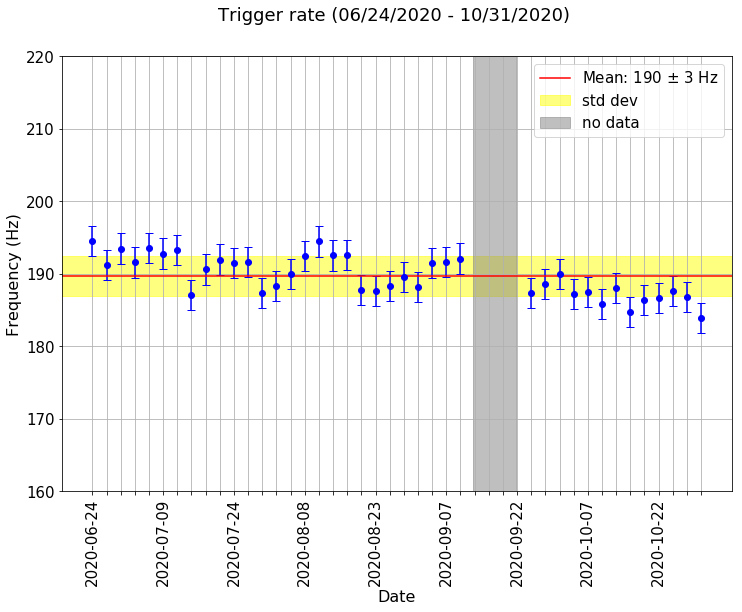

In [61]:
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

plt.rcParams.update({'font.size': 15})

list_dtd = []
list_rate = []

for i in range(len(list_trigger)):
    list_dtd.append(list_trigger[i][0])
    list_rate.append(list_trigger[i][1])

#print(list_dtd)
#print(list_rate)
list_dtd_lab = []
for i in range(len(list_dtd)):
    if (i % 5 == 0):
        list_dtd_lab.append(list_dtd[i])
    else:
        list_dtd_lab.append('')
    
#plt.plot(list_dtd, list_rate, 'bo', linewidth=3) 

errbar_sigma_day = []
for inf in range(len(list_rate)):
    errbar_sigma_day.append((list_rate[inf]/len(list_rate))**0.5)
   # errbar_sigma_day.append((len(list_rate)**0.5))

plt.errorbar(list_dtd, list_rate, yerr=errbar_sigma_day, #[1:] , 
                marker='o', color='blue', 
                linestyle='None', capsize=4) #, label='dado')


list_mean = []

for j in range(len(list_rate)):
    if (list_rate[j]>100):
        list_mean.append(list_rate[j])

##plt.axhline(np.mean(list_mean)+np.std(list_mean),color='yellow')
plt.axhspan(np.mean(list_mean)+np.std(list_mean)*1, np.mean(list_mean)+np.std(list_mean)*-1, color='yellow', alpha=0.5, label=r'std dev')
plt.axhline(np.mean(list_mean),color='red',label='Mean: {:.0f} $\pm$ {:.0f} Hz'.format(np.mean(list_mean),np.std(list_mean)))
plt.axvspan(26.9, 29.9, color='gray', alpha=0.5, label=r'no data')
##plt.axhline(np.mean(list_mean)-np.std(list_mean),color='yellow')

plt.ylim(160,220)
plt.legend(loc='upper right')

plt.ylabel('Frequency (Hz)', size=16)
plt.xlabel('Date', size=16)
plt.xticks(list_dtd, list_dtd_lab, rotation=90)

plt.grid()
#plt.tight_layout()

plt.title('Trigger rate (06/24/2020 - 10/31/2020) \n', size=18,y=1.02)

plt.savefig('histogramas/Trigger_Rate_2020_Art_v2.png')
plt.show()

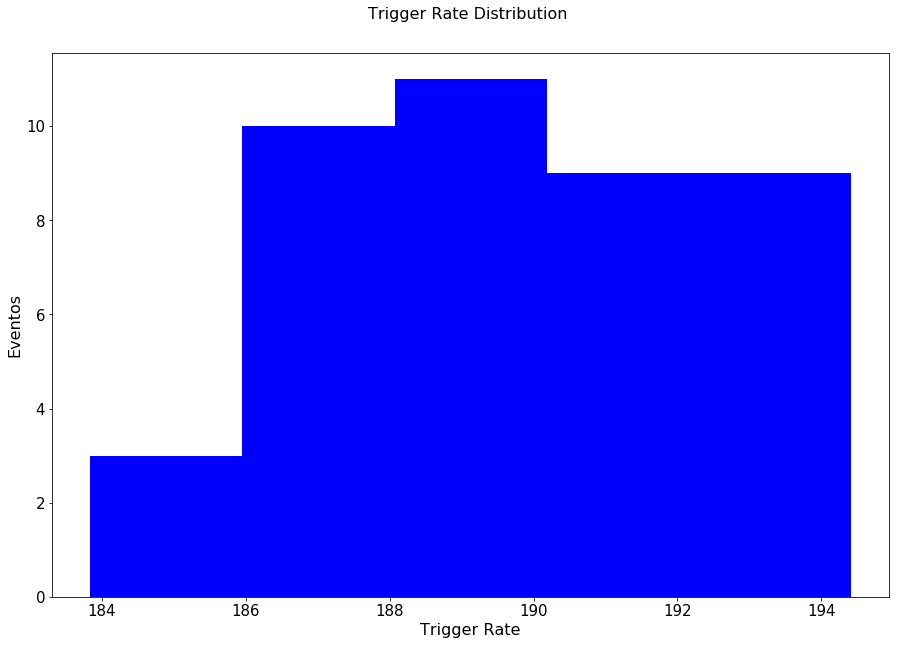

In [38]:
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

list_rate_hist=list_rate

plt.rcParams.update({'font.size': 15})
#print(np.array(list_rate))
#print(list_mean)

plt.hist(list_mean , color='blue', bins=5)
plt.ylabel('Events', size=16)
plt.xlabel('Trigger Rate', size=16)
#plt.legend(loc="upper right")

plt.title('Trigger Rate Distribution \n', size=16,y=1.02)
plt.savefig('histogramas/Trigger_Rate_2020_Distribution.png')
plt.show()

In [84]:
print(list_dtd)

['2020-06-23', '2020-06-26', '2020-06-29', '2020-07-02', '2020-07-05', '2020-07-08', '2020-07-11', '2020-07-14', '2020-07-17', '2020-07-20', '2020-07-23', '2020-07-26', '2020-07-29', '2020-08-01', '2020-08-04', '2020-08-07', '2020-08-10', '2020-08-13', '2020-08-16', '2020-08-19', '2020-08-22', '2020-08-25', '2020-08-28', '2020-08-31', '2020-09-03', '2020-09-06', '2020-09-09', '2020-09-12', '2020-09-15', '2020-09-18', '2020-09-21', '2020-09-24', '2020-09-27', '2020-09-30', '2020-10-03', '2020-10-06', '2020-10-09', '2020-10-12', '2020-10-15', '2020-10-18', '2020-10-21', '2020-10-24', '2020-10-27', '2020-10-30']


In [63]:
print(list_rate[27])
print(list_rate[28])
print(list_rate[29])
print(list_rate[30])

191.85446428571427
nan
nan
184.76363636363635


In [70]:
print(30 % 5)

0
